In [73]:
pip install rasterstats geopandas rasterio

  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
Using cached rasterstats-0.20.0-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.5 MB 7.2 MB/s eta 0:00:04
   ----- ---------------------------------- 3.1/24.5 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/24.5 MB 6.1 MB/s eta 0:00:04
   -------- ------------------------------- 5.5/24.5 MB 6.7 MB/s eta 0:00:03
   ---------- ----------------------------- 6.3/24.5 MB 7.4 MB/s eta 0:00:03
   ---------- ----------------------------- 6.6/24.5 MB 5.2 MB/s eta 0:00:04
   ------------- -------------------------- 8.4/24.5 MB 5.9 MB/s eta 0:00:03
   ----------------- ---------------------- 11.0/24.5 MB 6.5 MB/s eta 0:00:03
   -------------------- ------------------- 12.8/24.5 MB 6.7 MB/s eta 0:00:02
   ------------------------ --------------- 15.2/24.5 MB 7.1 MB/s eta 0:00:02
   ----------------------------

['DE11' 'DE12' 'DE13' 'DE14' 'DE21' 'DE22' 'DE23' 'DE24' 'DE25' 'DE26'
 'DE27' 'DE30' 'DE40' 'DE50' 'DE60' 'DE71' 'DE72' 'DE73' 'DE80' 'DE91'
 'DE92' 'DE93' 'DE94' 'DEA1' 'DEA2' 'DEA3' 'DEA4' 'DEA5' 'DEB1' 'DEB2'
 'DEB3' 'DEC0' 'DED2' 'DED4' 'DED5' 'DEE0' 'DEF0' 'DEG0']


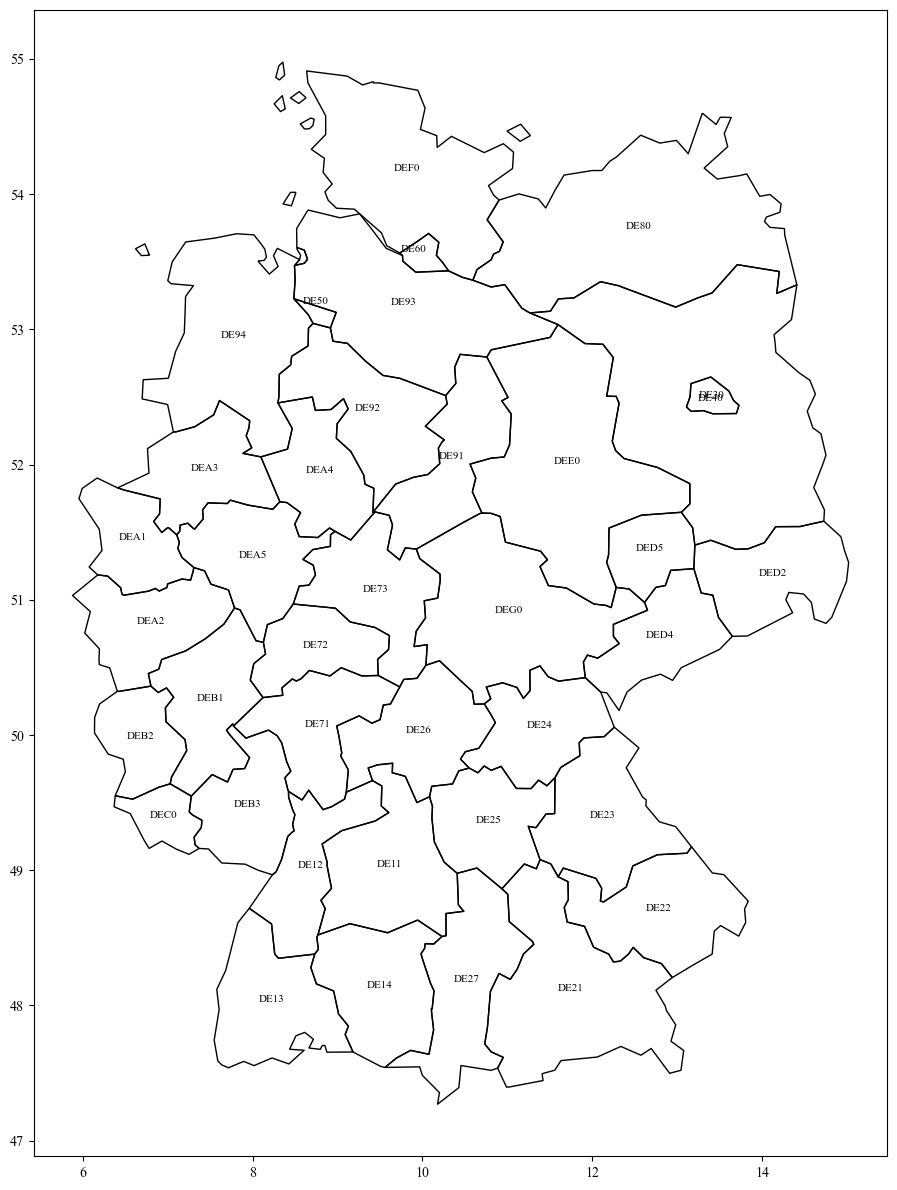

In [27]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
#print(DE_shape_file.LEVL_CODE.unique())
#print(DE_shape_file.crs)

DE = DE_shape_file[(DE_shape_file['NUTS_ID'].str.contains('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]
print(DE.NUTS_ID.unique())


import matplotlib.pyplot as plt

# Create the figure FIRST
plt.figure(figsize=(12, 12))  # Must be called before any plotting commands

# Plot your data
DE.plot(color='none', edgecolor='black', ax=plt.gca())  # Explicitly use current axis

# Add annotations
for i, row in DE.iterrows():
    plt.annotate(
        text=row['NUTS_ID'],
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=8,
        xytext=(0, 0),  # Optional: Offset for text
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()  # Force display (critical in Jupyter)

## Yearly data per nuts2

In [104]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\PECD_WS_Yearly\Copy.nc"
#r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\PECD_WS_Yearly_gridded\23_mean_wind_speed-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

ds = xr.open_dataset(file_path, engine='netcdf4')  # Lowercase!
#ds

# #data = nc.Dataset(file_path, 'r')
# # data
# #print(ds.variables.keys())
df = ds.to_dataframe().round(6)
df.reset_index(inplace=True)
df

de_df = df[df.nuts.str.contains('DE')]
de_df['Year'] = de_df['time'].dt.year
de_df['sfcWindAdjust_100m'] = de_df['sfcWindAdjust']*(100/10)**.14 #Open (grass, farmland)	0.12–0.16	0.14
de_df['PD'] = 0.5*(1.225)*de_df['sfcWindAdjust_100m']**3
de_df





C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\2815500978.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['Year'] = de_df['time'].dt.year
C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\2815500978.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['sfcWindAdjust_100m'] = de_df['sfcWindAdjust']*(100/10)**.14 #Open (grass, farmland)	0.12–0.16	0.14
C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\2815500978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

time  nuts  height  sfcWindAdjust  Year  sfcWindAdjust_100m  \
0     1950-01-01  DE50    10.0       3.788243  1950            5.229231   
1     1950-01-01  DE60    10.0       4.288060  1950            5.919171   
2     1950-01-01  DE71    10.0       3.023425  1950            4.173488   
3     1950-01-01  DE72    10.0       3.202365  1950            4.420494   
4     1950-01-01  DE73    10.0       3.309559  1950            4.568463   
...          ...   ...     ...            ...   ...                 ...   
50219 2100-01-01  DED4    10.0       3.300454  2100            4.555895   
50220 2100-01-01  DED5    10.0       3.370502  2100            4.652588   
50221 2100-01-01  DEE0    10.0       3.445234  2100            4.755747   
50222 2100-01-01  DEF0    10.0       4.816862  2100            6.649121   
50223 2100-01-01  DEG0    10.0       3.282591  2100            4.531237   

               PD  
0       87.582952  
1      127.024839  
2       44.524976  
3       52.907664  
4       58.400488  
...           ...  
50219   57.919812  
50220   61.686462  
50221   65.881316  
50222  180.052313  
50223   56.984457  

[5738 rows x 7 columns]

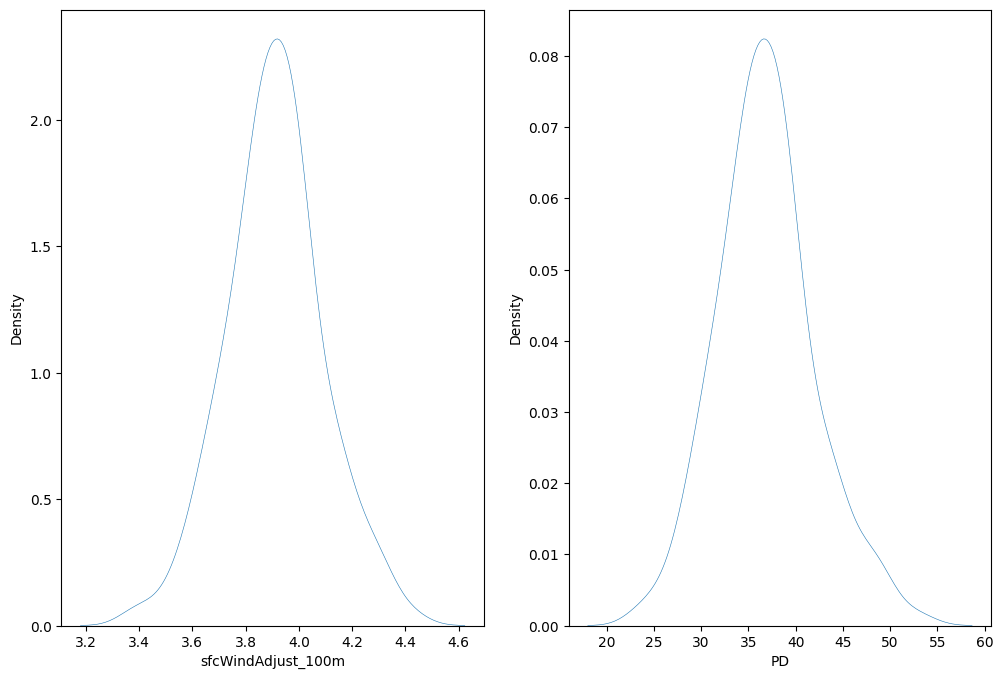

In [147]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()

# # Apply normalization per region
# de_df['zscore_per_region'] = de_df[de_df.Year == 2021].groupby(['Year'])['PD'].transform(
#     lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
# )

# # Apply normalization per region
# de_df['PD_zscore'] = de_df.groupby(['nuts'])['PD'].transform(
#     lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
# )

a = de_df[de_df.nuts.str.contains('DE12')]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=a, x='sfcWindAdjust_100m', linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=a, x='PD', linewidth=.4, ax=ax[1], legend=False)

#[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

In [140]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\PD_yearly_1949_1957.nc"
#r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\PECD_WS_Yearly_gridded\23_mean_wind_speed-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

ds = xr.open_dataset(file_path, engine='netcdf4')  # Lowercase!
#ds

# #data = nc.Dataset(file_path, 'r')
# # data
# #print(ds.variables.keys())
df = ds.to_dataframe().round(6)
df.reset_index(inplace=True)
df
# # de_df = df[df.nuts.str.contains('DE')]
# # de_df['Year'] = de_df['time'].dt.year
# # de_df['sfcWindAdjust_100m'] = de_df['sfcWindAdjust']*(100/10)**.14 #Open (grass, farmland)	0.12–0.16	0.14
# # de_df['PD'] = 0.5*(1.225)*de_df['sfcWindAdjust_100m']**3
# # # #print[de_df.nuts.unique()]

# # ws = ds['sfcWindAdjust']
# # print(ws)
# # ws.sel(time="2050-01-01T00:00:00").plot()
# #print(ds.data_vars)
# #ds.close()




Year  latitude  longitude  sfcWindAdjust_100m          PD  number
0        1949     55.05       5.87            5.104050  149.105881       0
1        1949     55.05       5.88            5.105302  149.138580       0
2        1949     55.05       5.89            5.106554  149.169922       0
3        1949     55.05       5.90            5.107794  149.202148       0
4        1949     55.05       5.91            5.109024  149.232986       0
...       ...       ...        ...                 ...         ...     ...
6436093  1957     47.27      15.00            1.081893    1.231372       0
6436094  1957     47.27      15.01            1.093182    1.266159       0
6436095  1957     47.27      15.02            1.104322    1.301185       0
6436096  1957     47.27      15.03            1.100338    1.292978       0
6436097  1957     47.27      15.04            1.096373    1.284942       0

[6436098 rows x 6 columns]

## process and save as NC

In [138]:
import xarray as xr
import numpy as np

# Load the dataset
file_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\era5_hws_1km_40_48"
ds = xr.open_dataset(file_path, engine='netcdf4')

# Calculate wind speed at 100m
ds['sfcWindAdjust_100m'] = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Calculate power density
ds['PD'] = 0.5 * 1.225 * ds['sfcWindAdjust_100m']**3

# Add a 'Year' coordinate
ds = ds.assign_coords(Year=ds['valid_time'].dt.year)

# Compute the yearly mean grouped by year, lat, lon
yearly_mean = ds[['sfcWindAdjust_100m', 'PD']].groupby('Year').mean(dim='valid_time')

# Save to NetCDF (this will include all years in one file)
output_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\PD_yearly_1940_1948.nc"
yearly_mean.to_netcdf(output_path)


In [141]:
import xarray as xr
import os

# Define the directory path
dir_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km"

# List all .nc files in the directory
nc_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith('.nc')]

# Open and concatenate the NetCDF files
ds_list = [xr.open_dataset(f) for f in nc_files]
ds_combined = xr.concat(ds_list, dim='Year')  # You can adjust the dimension depending on the structure of your data

# Save the combined dataset to a new NetCDF file
output_file = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\combined_PPD_yearly_1940_2025.nc"
ds_combined.to_netcdf(output_file)

# Optionally print the result
ds_combined


<xarray.Dataset> Size: 492MB
Dimensions:             (Year: 86, latitude: 779, longitude: 918)
Coordinates:
    number              int64 8B 0
  * latitude            (latitude) float64 6kB 55.05 55.04 55.03 ... 47.28 47.27
  * longitude           (longitude) float64 7kB 5.87 5.88 5.89 ... 15.03 15.04
  * Year                (Year) int64 688B 1940 1941 1942 1943 ... 2023 2024 2025
Data variables:
    sfcWindAdjust_100m  (Year, latitude, longitude) float32 246MB 4.174 ... 0...
    PD                  (Year, latitude, longitude) float32 246MB 83.0 ... 0....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [142]:
ds_combined
com_df = ds_combined.to_dataframe().round(6)
com_df.reset_index(inplace=True)
com_df

Year  latitude  longitude  sfcWindAdjust_100m         PD  number
0         1940     55.05       5.87            4.174438  82.997208       0
1         1940     55.05       5.88            4.175978  83.084190       0
2         1940     55.05       5.89            4.177501  83.171761       0
3         1940     55.05       5.90            4.179038  83.258324       0
4         1940     55.05       5.91            4.180578  83.346741       0
...        ...       ...        ...                 ...        ...     ...
61500487  2025     47.27      15.00            0.815861   0.725446       0
61500488  2025     47.27      15.01            0.819901   0.740697       0
61500489  2025     47.27      15.02            0.823905   0.755944       0
61500490  2025     47.27      15.03            0.820825   0.743658       0
61500491  2025     47.27      15.04            0.817907   0.731603       0

[61500492 rows x 6 columns]

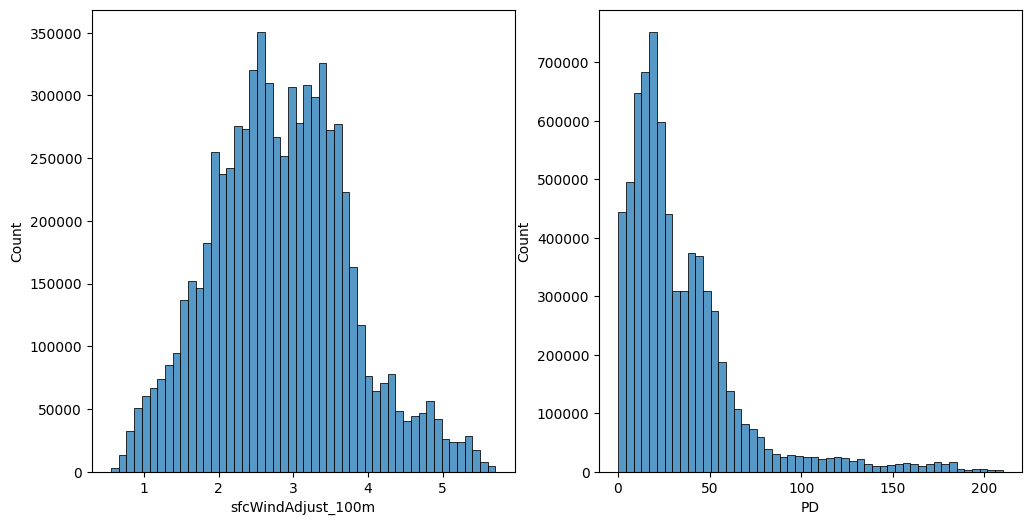

In [160]:
# com_df.latitude.unique().size
# print(com_df["Year"].unique())
point  = com_df[#(com_df['latitude'] == 55.05) & (com_df['longitude'] == 5.87) &
                 (com_df['Year'] > 2014) & (com_df['Year'] < 2025)]
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=point, x="sfcWindAdjust_100m", bins=50, ax=ax[0])
sns.histplot(data=point, x="PD", bins=50, ax=ax[1])

plt.show()

## save to Parquet

In [121]:
import numpy as np

de_df = df.copy()
#df[(df['lat'] >= 47.27) & (df['lat'] <= 55.05) & (df['lon'] >= 5.87) & (df['lon'] <= 15.04)]

de_df

de_df['Year'] = de_df['valid_time'].dt.year
de_df['Month'] = de_df['valid_time'].dt.month
de_df['sfcWindAdjust_100m'] = np.sqrt(de_df['u100']**2 + de_df['v100']**2) 
#de_df['sfcWindAdjust_100m'] = de_df['sfcWindAdjust']*(100/10)**.14 #Open (grass, farmland)	0.12–0.16	0.14
de_df['PD'] = 0.5*(1.225)*de_df['sfcWindAdjust_100m']**3
de_df_yearly = de_df[['Year', 'longitude', 'latitude', 'sfcWindAdjust_100m', 'PD' ]].groupby(['longitude', 'latitude', 'Year']).agg({'sfcWindAdjust_100m': 'mean',
                                                                                                                                     'PD': 'mean'}).reset_index()

#de_df_yearly.sfcWindAdjust_100m.plot()
#print(de_df.shape, de_df_yearly.shape)
#de_df_yearly.to_csv(r'C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\1949_1957.csv', index=False)
de_df_yearly.to_parquet(r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\1985_1993.parquet", engine="pyarrow", compression="snappy")




In [7]:
pip install dask[complete]

  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----------------------- ---------------- 4.2/7.0 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 18.0 MB/s eta 0:00:00
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Note: you may need to restart the kernel to use updated packages.


## process & save NC - monthly _ WS_ Grid250 m

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\era5_hws_250m_2024_2025.nc"
#r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\PECD_WS_Yearly_gridded\23_mean_wind_speed-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

ds = xr.open_dataset(file_path, engine='netcdf4')  # Lowercase!
#ds

# Calculate wind speed at 100m
ds['sfcWindAdjust_100m'] = np.sqrt(ds['u100']**2 + ds['v100']**2)

# Calculate power density
ds['PD'] = 0.5 * 1.225 * ds['sfcWindAdjust_100m']**3

# Add a 'Year' coordinate
ds = ds.assign_coords(Year=ds['valid_time'].dt.year)
ds = ds.assign_coords(Month=ds['valid_time'].dt.month)

# Compute the yearly mean grouped by year, lat, lon
yearly_mean = ds[['sfcWindAdjust_100m', 'PD']].groupby('Year').mean(dim='valid_time')
df = yearly_mean.to_dataframe().reset_index()
df
# Save to NetCDF (this will include all years in one file)
#output_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_1km\PD_yearly_1940_1948_test.nc"
#yearly_mean.to_netcdf(output_path)

Year  latitude  longitude  sfcWindAdjust_100m         PD  number
0         2024     55.05     5.8700            4.338511  62.287262       0
1         2024     55.05     5.8725            4.338441  62.281986       0
2         2024     55.05     5.8750            4.338377  62.277340       0
3         2024     55.05     5.8775            4.338293  62.272213       0
4         2024     55.05     5.8800            4.338226  62.267395       0
...        ...       ...        ...                 ...        ...     ...
22843189  2025     47.27    15.0300            0.820825   0.743658       0
22843190  2025     47.27    15.0325            0.820086   0.740509       0
22843191  2025     47.27    15.0350            0.819312   0.737509       0
22843192  2025     47.27    15.0375            0.818623   0.734556       0
22843193  2025     47.27    15.0400            0.817907   0.731603       0

[22843194 rows x 6 columns]

In [11]:
import os
import xarray as xr
import numpy as np

# Define input and output directories
input_dir = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m"
output_dir = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean"

# Loop over each NetCDF file in the input directory
for file in os.listdir(input_dir):
    if file.endswith(".nc"):
        file_path = os.path.join(input_dir, file)

        # Open dataset
        ds = xr.open_dataset(file_path, engine='netcdf4')

        # Compute wind speed and power density
        ds['sfcWindAdjust_100m'] = np.sqrt(ds['u100']**2 + ds['v100']**2)
        ds['PD'] = 0.5 * 1.225 * ds['sfcWindAdjust_100m']**3

        # Add 'Year' coordinate from valid_time
        ds = ds.assign_coords(Year=ds['valid_time'].dt.year)
        ds = ds.assign_coords(Month=ds['valid_time'].dt.month)

        # Group by year and take mean
        yearly_mean = ds[['sfcWindAdjust_100m', 'PD']].groupby('Year').mean(dim='valid_time')

        # Create output filename
        base_name = os.path.splitext(file)[0]
        output_path = os.path.join(output_dir, f"{base_name}_PD.nc")

        # Save the new dataset
        yearly_mean.to_netcdf(output_path)

        print(f"Saved: {output_path}")


Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1940_1941_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1942_1943_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1944_1945_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1946_1947_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1948_1949_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1950_1951_PD.nc
Saved: C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\era5_hws_250m_1952_1953_PD.nc
Saved: C:\Users\mun9

In [12]:
import xarray as xr
import os

# Define the directory path
dir_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean"

# List all .nc files in the directory
nc_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith('.nc')]

# Open and concatenate the NetCDF files
ds_list = [xr.open_dataset(f) for f in nc_files]
ds_combined = xr.concat(ds_list, dim='Year')  # You can adjust the dimension depending on the structure of your data

# Save the combined dataset to a new NetCDF file
output_file = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\combined_PD_yearly_1940_2025.nc"
ds_combined.to_netcdf(output_file)

# Optionally print the result
ds_combined


<xarray.Dataset> Size: 8GB
Dimensions:             (Year: 86, latitude: 3113, longitude: 3669)
Coordinates:
    number              int64 8B 0
  * latitude            (latitude) float64 25kB 55.05 55.05 ... 47.27 47.27
  * longitude           (longitude) float64 29kB 5.87 5.873 ... 15.04 15.04
  * Year                (Year) int64 688B 1940 1941 1942 1943 ... 2023 2024 2025
Data variables:
    sfcWindAdjust_100m  (Year, latitude, longitude) float32 4GB 4.174 ... 0.8179
    PD                  (Year, latitude, longitude) float32 4GB 83.0 ... 0.7316
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [ ]:
ds_combined
#com_df = ds_combined.to_dataframe().round(6).reset_index()


com_df

In [149]:
import xarray as xr
import pandas as pd

# Load NetCDF file
ds = xr.open_dataset(r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\combined_PD_yearly_1940_2025.nc", engine="netcdf4")
print(ds.data_vars)




Data variables:
    sfcWindAdjust_100m  (Year, latitude, longitude) float32 4GB ...
    PD                  (Year, latitude, longitude) float32 4GB ...


In [150]:
import numpy as np
pd_2021 = ds['PD'].sel(Year=1940)
pd_values = pd_2021.values.flatten()  # Removes spatial structure
pd_values = pd_values[~np.isnan(pd_values)]  # Drop NaN values

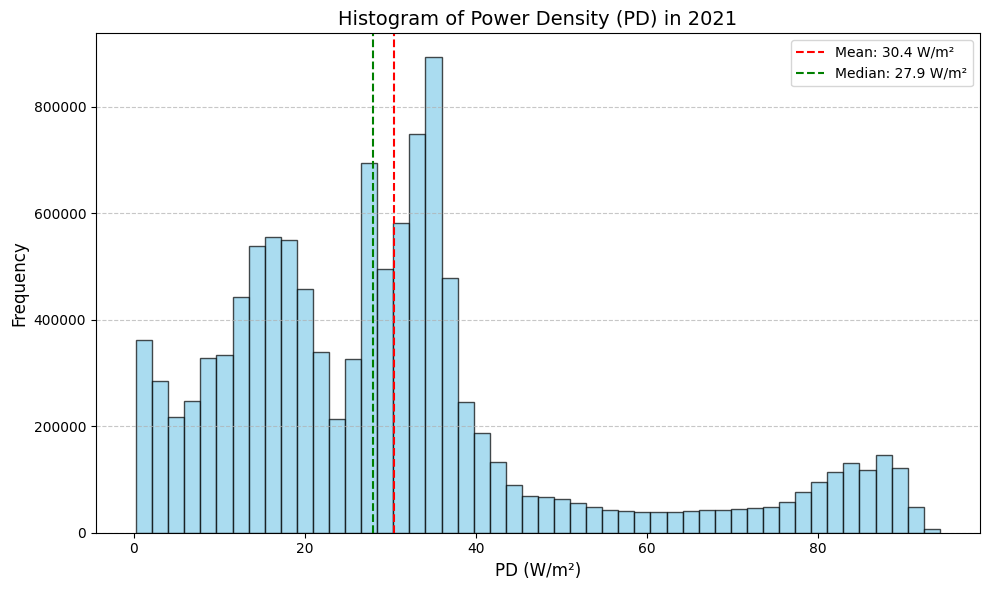

In [151]:
plt.figure(figsize=(10, 6))

# Customize bins (adjust based on your PD range)
bins = np.linspace(0, 1000, 30)  # Example: 30 bins from 0 to 1000 W/m²

plt.hist(pd_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title("Histogram of Power Density (PD) in 2021", fontsize=14)
plt.xlabel("PD (W/m²)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean/median lines
mean_pd = np.mean(pd_values)
median_pd = np.median(pd_values)
plt.axvline(mean_pd, color='red', linestyle='--', label=f'Mean: {mean_pd:.1f} W/m²')
plt.axvline(median_pd, color='green', linestyle='--', label=f'Median: {median_pd:.1f} W/m²')
plt.legend()

plt.tight_layout()
plt.show()

### getting the nuts regions

In [39]:
pip install tqdm


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [154]:
import geopandas as gpd
from shapely.geometry import Point
import rtree  # For spatial indexing

# Load NUTS-2 regions and ensure CRS matches your NetCDF (e.g., EPSG:4326)
nuts2 = DE.copy().to_crs("EPSG:4326")

# Build an R-tree index for faster spatial queries
spatial_index = nuts2.sindex

In [230]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from tqdm import tqdm

# Convert NUTS2 geometry to EPSG:4326
gdf = DE.copy()
gdf = gdf.to_crs("EPSG:4326")

# Initialize result list
results = []

# Loop over years
for year in tqdm(range(1940, 2026)):
    # Select PD for year
    pd_year = ds['PD'].sel(Year=year)

    # Get lat/lon grid
    lon, lat = np.meshgrid(pd_year.longitude.values, pd_year.latitude.values)
    
    # Flatten into a DataFrame
    pd_flat = pd.DataFrame({
        'longitude': lon.ravel(),
        'latitude': lat.ravel(),
        'PD': pd_year.values.ravel()
    }).dropna(subset=['PD'])

    # Create GeoDataFrame of points
    pd_gdf = gpd.GeoDataFrame(
        pd_flat,
        geometry=gpd.points_from_xy(pd_flat.longitude, pd_flat.latitude),
        crs="EPSG:4326"
    )

    # Spatial join with NUTS2 polygons
    joined = gpd.sjoin(pd_gdf, gdf[['NUTS_ID', 'geometry']], how='inner', predicate='within')

    # Aggregate: mean PD per region
    aggregated = joined.groupby('NUTS_ID')['PD'].mean().reset_index()
    aggregated['Year'] = year

    # Append to results
    results.append(aggregated)

# Combine all years into one DataFrame
final_df = pd.concat(results, ignore_index=True)

# Optional: reorder columns
final_df = final_df[['Year', 'NUTS_ID', 'PD']]
final_df.to_csv(r'C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\Processed_ws_250m\Yearly_mean\PD_NUTS2_1940_2025_final_DF.csv', index=False)
# Check the result
final_df.head()


100%|██████████| 86/86 [13:38:47<00:00, 571.25s/it]     


Year NUTS_ID         PD
0  1940    DE11  15.384125
1  1940    DE12  15.403223
2  1940    DE13   6.991154
3  1940    DE14   9.901158
4  1940    DE21   7.875985

In [244]:
final_df
mue_std1 = final_df.groupby("NUTS_ID")["PD"].agg(["mean", "std"]).reset_index()
mue_std1

NUTS_ID       mean        std
0     DE11  16.015944   7.837065
1     DE12  16.060921   7.983986
2     DE13   8.747126   5.020531
3     DE14  11.998775   6.759639
4     DE21   8.535164   4.444998
5     DE22   8.348774   4.533782
6     DE23  12.420349   6.185626
7     DE24  17.081516   7.701484
8     DE25  16.577217   7.783773
9     DE26  15.962720   7.516074
10    DE27  12.887460   6.865675
11    DE30  26.437103  11.225573
12    DE40  27.921661  11.564637
13    DE50  33.904179  14.420659
14    DE60  37.604500  15.969661
15    DE71  15.215545   7.028438
16    DE72  19.082134   8.431643
17    DE73  25.935017  10.690114
18    DE80  38.650784  16.252607
19    DE91  32.674797  13.104789
20    DE92  35.298347  14.365586
21    DE93  33.960552  14.275035
22    DE94  39.344666  17.108164
23    DEA1  32.890152  13.841462
24    DEA2  35.722149  14.040783
25    DEA3  36.878368  15.609107
26    DEA4  37.923203  14.997349
27    DEA5  37.508396  14.579843
28    DEB1  20.831806   9.003541
29    DEB2  24.360340  11.495795
30    DEB3  17.791773   8.936826
31    DEC0  18.143143   9.367826
32    DED2  29.359585  10.614490
33    DED4  30.943314  11.638411
34    DED5  31.466204  12.515918
35    DEE0  29.716948  12.073133
36    DEF0  42.433300  18.520121
37    DEG0  28.438150  11.626069

C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\427778791.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability


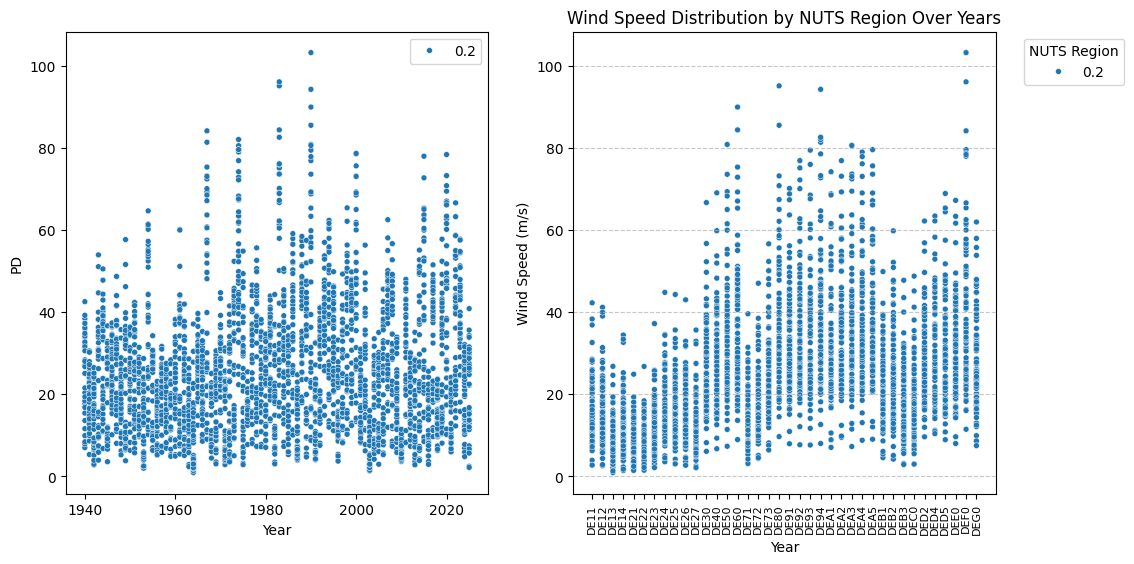

In [234]:
import seaborn as sns


fig, ax = plt.subplots(1,2, figsize=(12, 6), sharey=False)

sns.scatterplot(data=final_df, x='Year', y = 'PD', size=.2, ax=ax[0])
sns.scatterplot(data=final_df, x='NUTS_ID', y = 'PD', size=.2, ax=ax[1])


ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Distribution by NUTS Region Over Years")
plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

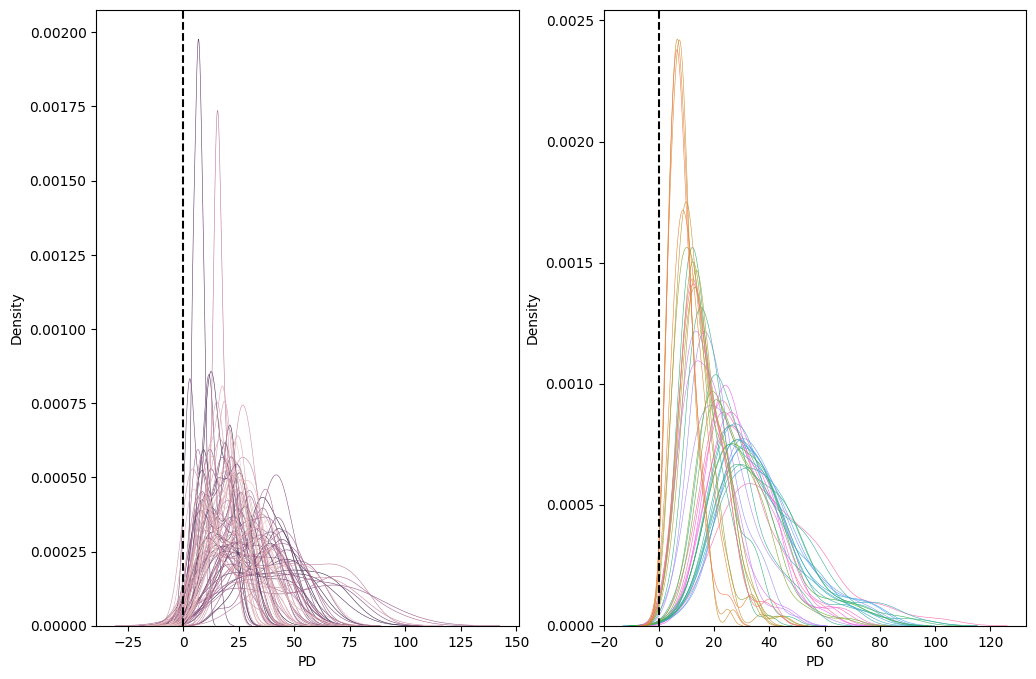

In [235]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=final_df, x='PD', hue='Year', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=final_df, x='PD', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

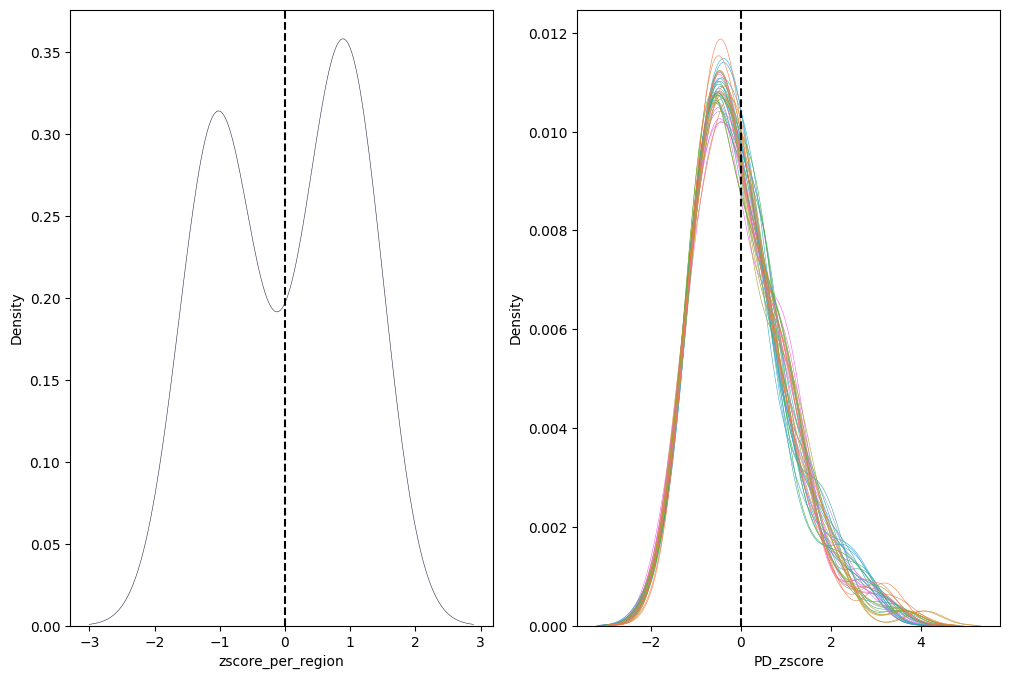

In [68]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()

# Apply normalization per region
final_df['zscore_per_region'] = final_df[final_df.Year == 2021].groupby(['Year'])['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Apply normalization per region
final_df['PD_zscore'] = final_df.groupby(['NUTS_ID'])['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

final_df

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=final_df, x='zscore_per_region', hue='Year', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=final_df, x='PD_zscore', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

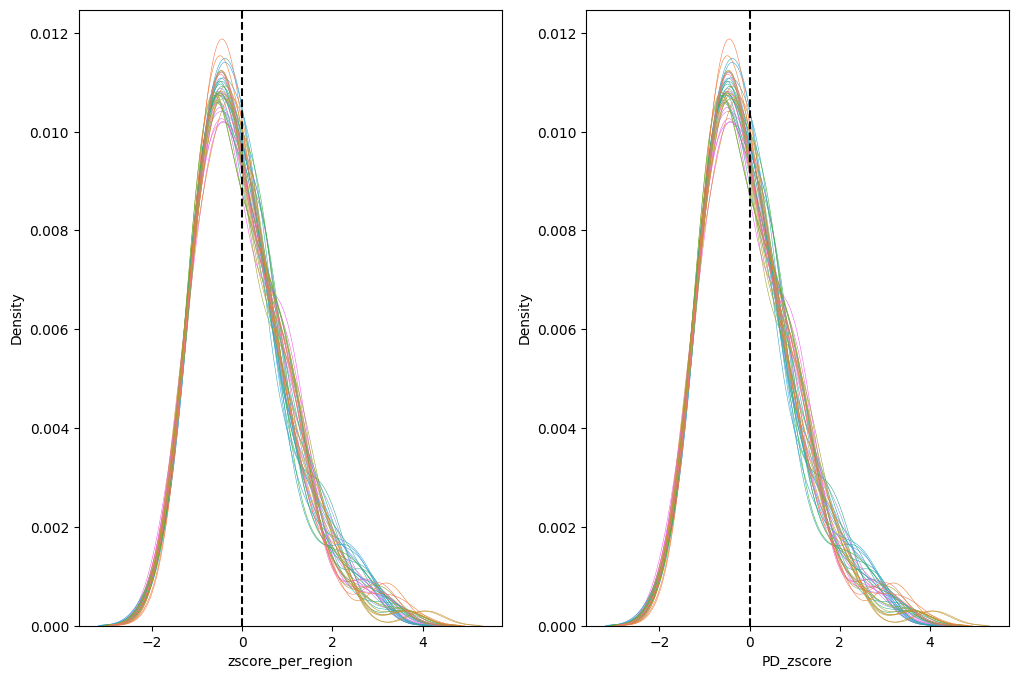

In [44]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()

# Apply normalization per region
final_df['zscore_per_region'] = final_df.groupby('NUTS_ID')['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Apply normalization per region
final_df['PD_zscore'] = final_df.groupby('NUTS_ID')['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

final_df

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=final_df, x='zscore_per_region', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=final_df, x='PD_zscore', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\427778791.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability


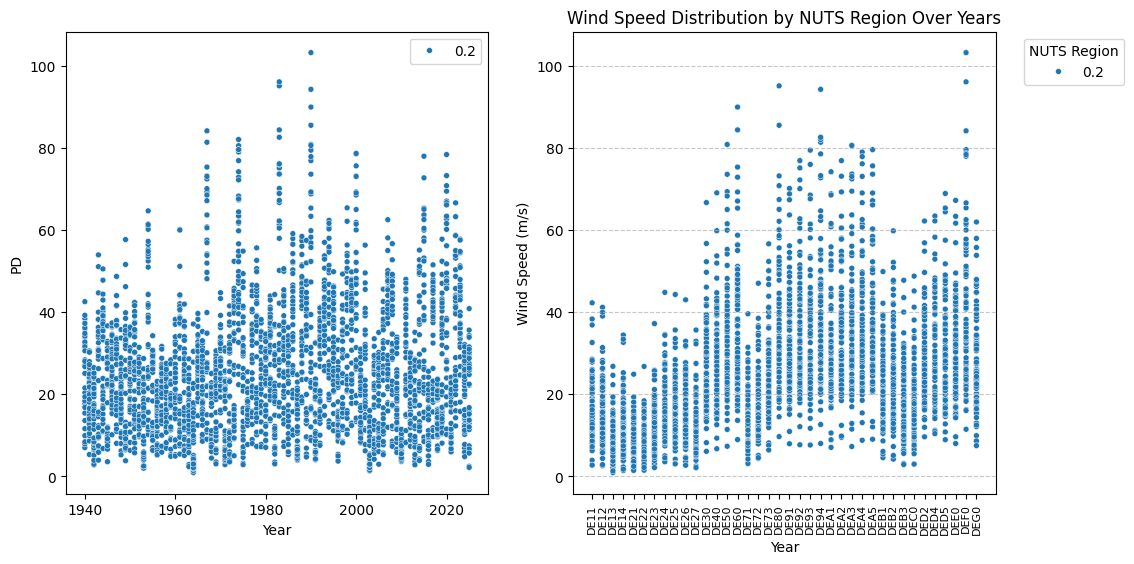

In [236]:
import seaborn as sns


fig, ax = plt.subplots(1,2, figsize=(12, 6), sharey=False)

sns.scatterplot(data=final_df, x='Year', y = 'PD', size=.2, ax=ax[0])
sns.scatterplot(data=final_df, x='NUTS_ID', y = 'PD', size=.2, ax=ax[1])


ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Distribution by NUTS Region Over Years")
plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

Gamma params: shape=2.64, scale=9.59


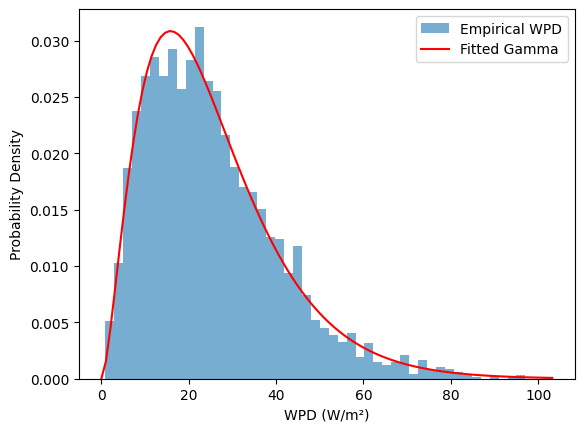

In [237]:
from scipy.stats import gamma, lognorm
import matplotlib.pyplot as plt

# Example: Historical annual WPD (W/m²) for one region
annual_wpd = final_df.PD  # Mock data

# Fit Gamma distribution to WPD
shape, loc, scale = gamma.fit(annual_wpd)
print(f"Gamma params: shape={shape:.2f}, scale={scale:.2f}")

# Plot histogram vs fitted PDF
plt.hist(annual_wpd, bins=50, density=True, alpha=0.6, label="Empirical WPD")
x = np.linspace(0, np.max(annual_wpd), 100)
plt.plot(x, gamma.pdf(x, shape, loc, scale), 'r-', label="Fitted Gamma")
plt.legend()
plt.xlabel('WPD (W/m²)')
plt.ylabel('Probability Density')
plt.show()

(77233176, 11) (6436098, 5)


In [94]:
de_df_yearly.shape

(14094808, 4)

In [238]:
import geopandas as gpd
from shapely.geometry import Point
gdf = DE.copy()
# Assuming your DataFrame has columns 'latitude' and 'longitude'
geometry = [Point(lon, lat) for lon, lat in zip(de_df['longitude'], de_df['latitude'])]
gdf_points = gpd.GeoDataFrame(de_df, geometry=geometry, crs=gdf.crs)  # WGS84

#gdf_points = gdf_points.to_crs(gdf.crs)

# Perform spatial join
gdf_joined = gpd.sjoin(gdf_points, gdf, how='left', predicate='within')

# Resulting DataFrame now includes NUTS_ID and other region attributes
print(gdf_joined.head())

# Check unmatched points
unmatched = gdf_joined[gdf_joined['NUTS_ID'].isna()]
print(f"Unmatched points: {len(unmatched)}")

# Option 1: Drop unmatched points
gdf_joined = gdf_joined.dropna(subset=['NUTS_ID'])

# Option 2: Assign a default value (e.g., 'Unknown')
gdf_joined['NUTS_ID'] = gdf_joined['NUTS_ID'].fillna('Unknown')

# Save to CSV (without geometry)
gdf_joined.drop(columns='geometry').to_csv("points_with_nuts.csv", index=False)

# Save to GeoJSON (with geometry)
#gdf_joined.to_file("points_with_nuts.geojson", driver='GeoJSON')


# If the JSON is nested, normalize it:
# df = pd.json_normalize(df['nested_column'])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_joined.plot(ax=ax, color='red', markersize=5)
plt.title("Points Mapped to NUTS Regions")
plt.show()

KeyError: 'longitude'

In [33]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load your NUTS regions GeoDataFrame (ensure correct CRS)
gdf = DE.copy()

# Convert df into a GeoDataFrame
de_df["geometry"] = [Point(lon, lat) for lon, lat in zip(de_df["lon"], de_df["lat"])]
df_geo = gpd.GeoDataFrame(de_df, geometry="geometry", crs=gdf.crs)  # Match CRS

# Spatial join: Assign NUTS region to each point
df_merged = gpd.sjoin(df_geo, gdf, how="left", predicate="within")

# Aggregate Data (e.g., mean wind speed per NUTS region)
df_aggregated = df_merged.groupby(["NUTS_ID",'Year']).agg({
    "sfcWindAdjust": "mean",  # Example: Mean wind speed per region
    "sfcWindAdjust_100m": "mean", 
    "PD": "mean"               # Example: Sum power density
}).reset_index()

df_aggregated.rename(columns={"NUTS_ID": "nuts"}, inplace=True)

C:\Users\mun93\AppData\Local\Temp\ipykernel_4604\3680005178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df["geometry"] = [Point(lon, lat) for lon, lat in zip(de_df["lon"], de_df["lat"])]


In [35]:
df_aggregated

nuts  Year  sfcWindAdjust  sfcWindAdjust_100m         PD
0     DE11  1950       2.937386            4.054721  41.230003
1     DE11  1951       2.859939            3.947814  38.000893
2     DE11  1952       2.975213            4.106936  42.826511
3     DE11  1953       2.976531            4.108757  42.898361
4     DE11  1954       2.799302            3.864112  35.673149
...    ...   ...            ...                 ...        ...
5582  DEG0  2096       3.294302            4.547402  57.732250
5583  DEG0  2097       2.892434            3.992670  39.175404
5584  DEG0  2098       3.148231            4.345768  50.434803
5585  DEG0  2099       3.386209            4.674269  62.796238
5586  DEG0  2100       3.290949            4.542774  57.610130

[5587 rows x 5 columns]

C:\Users\mun93\AppData\Local\Temp\ipykernel_4604\354627957.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
C:\Users\mun93\AppData\Local\Temp\ipykernel_4604\354627957.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability


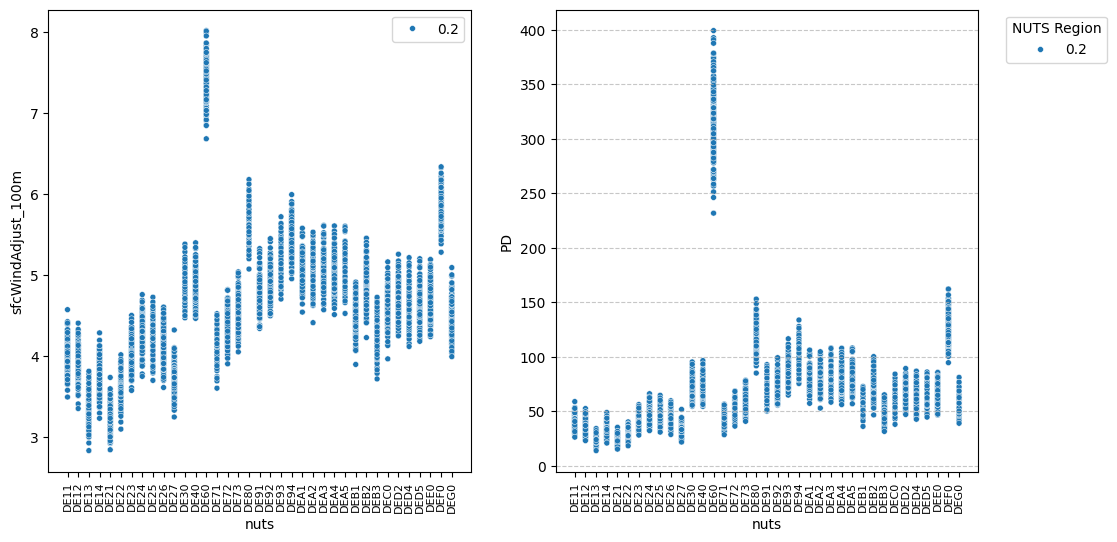

In [37]:
import seaborn as sns

#a = de_df[de_df['nuts'].str.contains('DE50')]

fig, ax = plt.subplots(1,2, figsize=(12, 6), sharey=False)

sns.scatterplot(data=df_aggregated, x='nuts', y = 'sfcWindAdjust_100m', size=.2, ax=ax[0])
sns.scatterplot(data=df_aggregated, x='nuts', y = 'PD', size=.2, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability

plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In [162]:
import numpy as np
import pandas as pd

# Mock data: Monthly avg wind speeds (m/s) for 2 NUTS regions over 5 years
data = {
    'NUTS1': np.random.weibull(2, (5, 12)) * 8,  # 5 years × 12 months
    'NUTS2': np.random.weibull(2.2, (5, 12)) * 7,
}
rho = 1.225  # kg/m³

# Compute WPD variability per NUTS region
results = {}
for region, winds in data.items():
    wpd = 0.5 * rho * (winds ** 3)  # Monthly WPD
    mean_wpd = np.mean(wpd)
    std_wpd = np.std(wpd)
    cv_wpd = std_wpd / mean_wpd
    p10, p90 = np.percentile(wpd, [10, 90])
    
    results[region] = {
        'Mean WPD (W/m²)': mean_wpd,
        'Std Dev (W/m²)': std_wpd,
        'CV (%)': cv_wpd * 100,
        'P10-P90 (W/m²)': (p10, p90),
    }

# Convert to DataFrame
df_results = pd.DataFrame(results).T
print(df_results)

      Mean WPD (W/m²) Std Dev (W/m²)      CV (%)  \
NUTS1        432.7409     596.214799  137.776392   
NUTS2      241.063992     295.758775  122.688906   

                                 P10-P90 (W/m²)  
NUTS1  (15.516437126312411, 1088.1141804991753)  
NUTS2   (14.503177705138338, 597.6026901428849)  


## New attempt _ hourly data per NUTS2



In [9]:
import xarray as xr
import numpy as np

# Load the dataset
file_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\hourly_data3\H_ERA5_ECMW_T639_WS-_0100m_Euro_025d_S197901010000_E197912312300_INS_MAP_01h_NA-_noc_org_NA_NA---_NA---_NA---.area-subset.55.05.15.04.47.27.5.87.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")
print(ds.data_vars)



Data variables:
    var_100_metre_wind_speed  (time, latitude, longitude) float64 80MB ...


In [2]:
ds

<xarray.Dataset> Size: 80MB
Dimensions:                   (time: 8760, latitude: 31, longitude: 37)
Coordinates:
  * time                      (time) datetime64[ns] 70kB 1979-01-01 ... 1979-...
  * latitude                  (latitude) float32 124B 55.0 54.75 ... 47.75 47.5
  * longitude                 (longitude) float32 148B 6.0 6.25 ... 14.75 15.0
Data variables:
    var_100_metre_wind_speed  (time, latitude, longitude) float64 80MB ...
Attributes:
    history:      2019-03-23 17:46:06 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...
    Conventions:  CF-1.5

In [333]:
df = ds.to_dataframe().round(6)
df.reset_index(inplace=True)
df

time  latitude  longitude  var_100_metre_wind_speed
0        1979-01-01 00:00:00      55.0       6.00                 16.143256
1        1979-01-01 00:00:00      55.0       6.25                 16.380732
2        1979-01-01 00:00:00      55.0       6.50                 16.604969
3        1979-01-01 00:00:00      55.0       6.75                 16.841457
4        1979-01-01 00:00:00      55.0       7.00                 17.104906
...                      ...       ...        ...                       ...
10047715 1979-12-31 23:00:00      47.5      14.00                  4.181443
10047716 1979-12-31 23:00:00      47.5      14.25                  4.310855
10047717 1979-12-31 23:00:00      47.5      14.50                  4.987104
10047718 1979-12-31 23:00:00      47.5      14.75                  5.526796
10047719 1979-12-31 23:00:00      47.5      15.00                  6.335762

[10047720 rows x 4 columns]

In [334]:
print(df.latitude.unique().size)
print(df.longitude.unique().size)

31
37


In [2]:
import pandas as pd
import zipfile
zip_path = r"C:\Users\mun93\PycharmProjects\JupyterProject\models\Resource_Assessment\hourly_data3.zip"
# Read CSV directly from the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List files in the zip
    print("Files in zip:", z.namelist())

    # Assuming there is one CSV file — or find it specifically
    csv_filename = [name for name in z.namelist() if name.endswith('.csv')][0]

    with z.open(csv_filename) as f:
        df = pd.read_csv(f, comment='#')

# Now `df` contains your data
a = pd.DataFrame(df)
a.head(5)

Files in zip: ['H_ERA5_ECMW_T639_WS-_0100m_Euro_NUT2_S197901010000_E202503312300_INS_TIM_01h_NA-_noc_org_NA_NA---_NA---_NA---.csv']


Date      AL01      AL02      AL03      AT11      AT12  \
0  1979-01-01 00:00:00  7.772373  6.672618  5.454233  5.164603  5.202211   
1  1979-01-01 01:00:00  7.432220  6.300089  5.171101  5.417057  5.168954   
2  1979-01-01 02:00:00  6.906139  6.024628  4.893156  5.804094  5.298949   
3  1979-01-01 03:00:00  6.313559  5.809914  4.659769  5.753984  6.078272   
4  1979-01-01 04:00:00  5.401194  5.925399  4.480835  4.465773  7.323274   

       AT13      AT21      AT22      AT31  ...      UKK3      UKK4      UKL1  \
0  4.909172  2.688801  3.716716  4.461359  ...  7.971570  8.111188  7.057331   
1  5.472977  2.699611  3.833968  4.827032  ...  7.544292  7.859914  6.783741   
2  5.793530  2.407861  3.731827  5.178454  ...  7.356775  7.788783  6.446888   
3  5.613207  2.361902  3.579651  7.007757  ...  7.437146  7.876880  6.526186   
4  6.494917  2.455766  3.468159  9.195400  ...  7.126097  7.589443  6.611962   

       UKL2      UKM5      UKM6      UKM7      UKM8      UKM9      UKN0  
0  7.309735  2.787610  5.614151  2.871535  2.383215  5.743454  3.506364  
1  7.054538  3.356556  6.294391  2.948044  2.272266  5.208310  3.003641  
2  6.694837  4.158256  6.574001  3.432486  2.418997  4.685642  2.759011  
3  6.807807  5.076037  6.583197  3.965686  2.679350  4.449539  2.811764  
4  7.018999  6.126894  6.508929  4.488028  3.247680  4.486164  3.178005  

[5 rows x 351 columns]

In [3]:
#print(a.columns)
de_filter_df = a.loc[:, a.columns.str.contains('DE|Date')]
de_filter_df
#print(de_filter_df.columns.size)

de_filter_df

de_melted = de_filter_df.melt(id_vars=['Date'], var_name='NUTS_ID', value_name='Wind_Speed')
de_melted['Year'] = pd.to_datetime(de_melted['Date']).dt.year
de_melted['PD'] = 0.5 * 1.225 * de_melted['Wind_Speed']**3

de_grouped = de_melted.groupby(['Year', 'NUTS_ID']).agg({'Wind_Speed': 'mean', 'PD': 'mean'}).reset_index()
de_grouped


Year NUTS_ID  Wind_Speed          PD
0     1979    DE11    5.024517  139.943939
1     1979    DE12    4.856583  133.630372
2     1979    DE13    4.091072   93.815452
3     1979    DE14    4.557628  117.714711
4     1979    DE21    3.955205   71.034508
...    ...     ...         ...         ...
1781  2025    DED4    5.438745  186.631926
1782  2025    DED5    5.528848  189.118357
1783  2025    DEE0    5.525501  180.288664
1784  2025    DEF0    6.654412  301.064160
1785  2025    DEG0    5.231397  168.965972

[1786 rows x 4 columns]

## estimating the regional CF%

In [4]:
power_curve = pd.read_csv(#r"C:\Users\mun93\Downloads\Vestas_V150_6.csv"
                          r"C:\Users\mun93\Downloads\Vestas_V136_4.csv"
                          )
power_curve.head()

Wind_Speed   PC     Ct
0         3.0   57  0.878
1         3.5  132  0.852
2         4.0  224  0.852
3         4.5  337  0.855
4         5.0  478  0.851

In [6]:
import numpy as np
def calculate_turbine_power(u_effective, power_curve, power_curve_sigma = 0.02, apply_noise=True):
    power = np.interp(u_effective, power_curve['Wind_Speed'], power_curve['PC'].div(1000))

    return power

cf = de_melted.copy()
cf['Power_Output'] = calculate_turbine_power(
    u_effective=cf['Wind_Speed'],
    power_curve=power_curve,
    power_curve_sigma=0.02,   # e.g., 2% noise
    apply_noise=False          # Toggle noise as needed
)

cf

Date NUTS_ID  Wind_Speed  Year          PD  \
0         1979-01-01 00:00:00    DE11    8.591607  1979  388.444792   
1         1979-01-01 01:00:00    DE11    8.784944  1979  415.262855   
2         1979-01-01 02:00:00    DE11    8.287710  1979  348.666106   
3         1979-01-01 03:00:00    DE11    8.410440  1979  364.386471   
4         1979-01-01 04:00:00    DE11    7.591091  1979  267.928328   
...                       ...     ...         ...   ...         ...   
15405423  2025-03-31 19:00:00    DEG0    5.400107  2025   96.452433   
15405424  2025-03-31 20:00:00    DEG0    5.365321  2025   94.600439   
15405425  2025-03-31 21:00:00    DEG0    5.402069  2025   96.557603   
15405426  2025-03-31 22:00:00    DEG0    5.206977  2025   86.469544   
15405427  2025-03-31 23:00:00    DEG0    4.836892  2025   69.311495   

          Power_Output  
0             2.545652  
1             2.701095  
2             2.301319  
3             2.399994  
4             1.770678  
...                ...  
15405423      0.614036  
15405424      0.602209  
15405425      0.614703  
15405426      0.548372  
15405427      0.432004  

[15405428 rows x 6 columns]

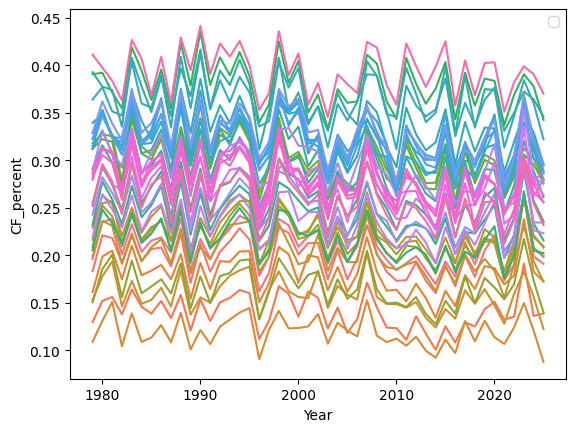

In [8]:
import seaborn as sns   
import matplotlib.pyplot as plt
# Group by Year and NUTS_ID
cf_grouped = (
    cf
    .groupby(['Year', 'NUTS_ID'])
    .agg(
        total_power=('Power_Output', 'sum'),
        max_power=('Power_Output', 'max'),
        hours=('Power_Output', 'count')  # count of non-NaN Power_Output
    )
    .reset_index()
)

# Compute Capacity Factor (%)
cf_grouped['CF_percent'] = (
    cf_grouped['total_power'] /
    (cf_grouped['max_power'] * cf_grouped['hours'])
)
cf_grouped
sns.lineplot(data=cf_grouped, x='Year', y='CF_percent', hue = 'NUTS_ID')
plt.legend('')

0.2674450076985601


C:\Users\mun93\AppData\Local\Temp\ipykernel_30260\2700036525.py:1: FutureWarning: The provided callable <function mean at 0x000001DB69F4EDE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  final_cf = cf_grouped.groupby('NUTS_ID').agg({'CF_percent': np.mean}).reset_index()


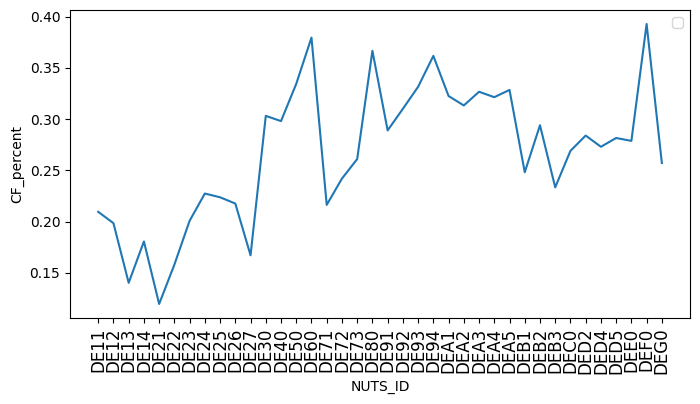

In [9]:
final_cf = cf_grouped.groupby('NUTS_ID').agg({'CF_percent': np.mean}).reset_index()
# Select the relevant regions
mean_k = final_cf.loc[final_cf['NUTS_ID'].isin(['DE92', 'DE93', 'DE94']), 'CF_percent'].mean()


# Assign to DE50 in joined_df
final_cf.loc[final_cf['NUTS_ID'] == 'DE50', 'CF_percent'] = mean_k
print(final_cf.CF_percent.mean())
fig, ax = plt.subplots(figsize=(8, 4), sharey=False)
sns.lineplot(data=final_cf, x='NUTS_ID', y='CF_percent')
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability;
plt.legend('')

1979 2025 38
Year           0
NUTS_ID        0
Wind_Speed    47
PD            47
dtype: int64


(-100.0, 400.0)

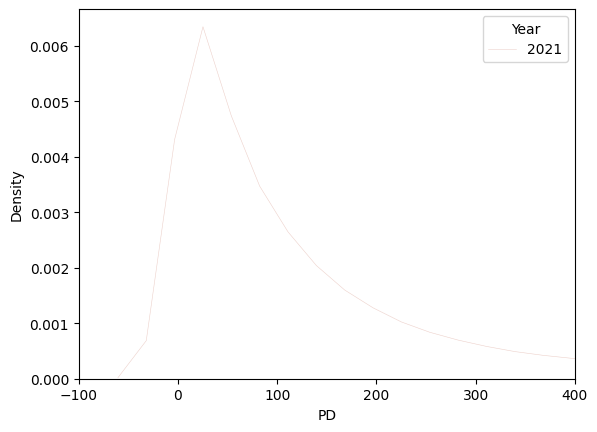

In [10]:
print(de_grouped.Year.min(), de_grouped.Year.max(), de_grouped.NUTS_ID.unique().size)
print(de_grouped.isna().sum())
sns.kdeplot(data=de_melted[de_melted.Year == 2021], x='PD', hue='Year', fill=False, linewidth=.4)
plt.xlim(-100, 400)

## historical stat

In [11]:
# Group by NUTS_ID and calculate statistics on PD across years
pd_stats = de_grouped.groupby('NUTS_ID')['PD'].agg([
    'mean', 
    'std', 
    'min', 
    'max',
    'median',
    lambda x: np.percentile(x, 25),  # 25th percentile
    lambda x: np.percentile(x, 75),  # 75th percentile
])

# Rename columns
pd_stats.columns = ['mean_PD', 'std_PD', 'min_PD', 'max_PD', 'median_PD', 'p25_PD', 'p75_PD']

# Add Coefficient of Variation (CV)
pd_stats['cv_PD'] = pd_stats['std_PD'] / pd_stats['mean_PD']

# Display
pd_stats = pd_stats.reset_index()
pd_stats.head()


NUTS_ID     mean_PD     std_PD      min_PD      max_PD   median_PD  \
0    DE11  150.798210  20.507801  112.182565  192.539771  148.745457   
1    DE12  143.857651  20.413721  105.847389  190.283318  143.413127   
2    DE13   97.968533  15.964320   64.096423  130.767733   93.815452   
3    DE14  129.611816  19.668367   86.816501  171.848566  126.270679   
4    DE21   80.421027  12.775125   55.166468  108.600152   79.823489   

       p25_PD      p75_PD     cv_PD  
0  134.578646  168.158722  0.135995  
1  128.407692  161.180685  0.141902  
2   87.491788  111.575115  0.162954  
3  115.002152  146.300121  0.151748  
4   70.348311   89.415856  0.158853

In [100]:
pd_stats.cv_PD.to_clipboard()


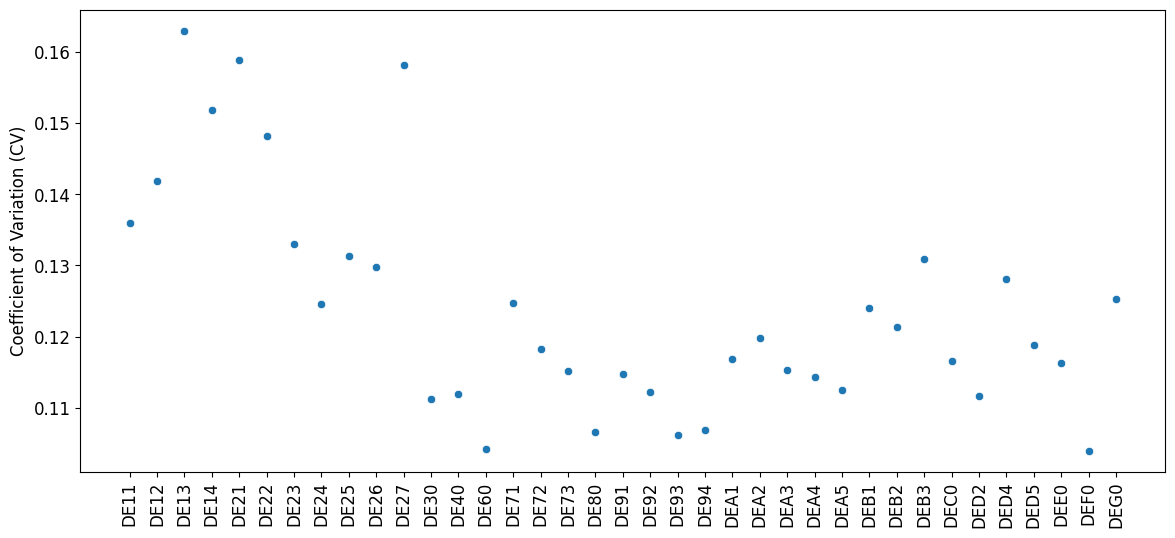

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14, 6), sharey=False)
sns.scatterplot(data=pd_stats.dropna(), x='NUTS_ID', y='cv_PD', ax=ax)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability;
plt.yticks(fontsize=12)
plt.ylabel("Coefficient of Variation (CV)", fontsize=12)
plt.xlabel("")
plt.grid(False)  # Add grid lines for better readability

## Fitting weibul on historical per NUTS2

151.320533042616


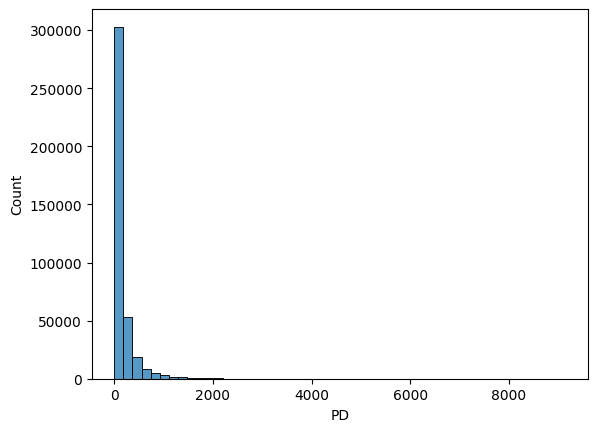

In [13]:
test = de_melted[(de_melted['NUTS_ID'].str.contains('DE11')) & (de_melted['Year'] > 1979)]
sns.histplot(data=test, x="PD", bins=50)
print(test.PD.mean())

Fitted gamma parameters: alpha=0.9986, loc=0, beta=180.7569


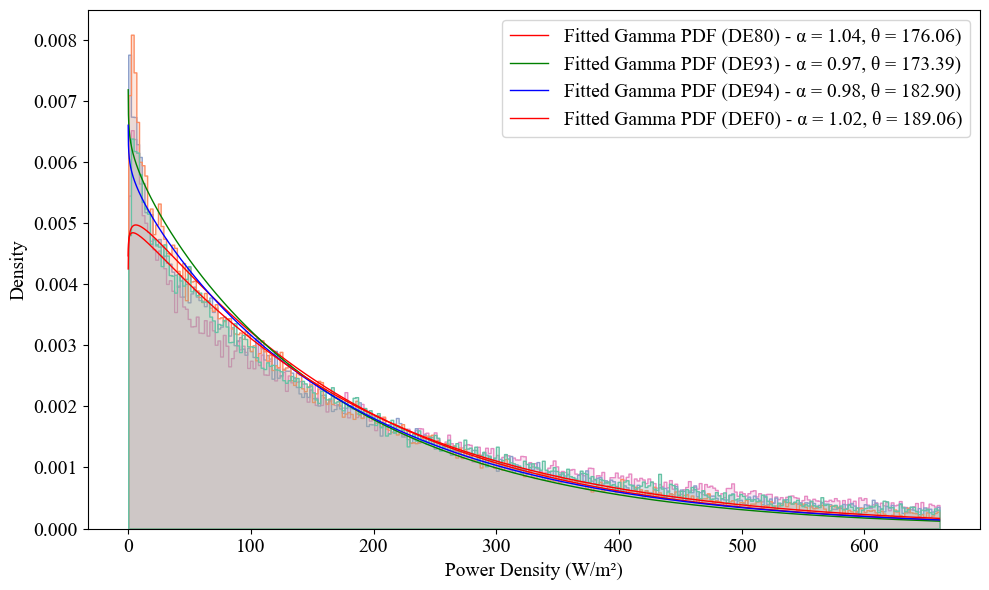

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

plt.rcParams['font.family'] = 'Times New Roman'

# Filter and preprocess data
data = de_melted[
    ((de_melted.Year >= 2014) & (de_melted.Year <= 2024)) &
    (de_melted.NUTS_ID.str.contains('DEF0|DE94|DE93|DE80'))
][['PD', 'NUTS_ID']].dropna()

# Apply 95th percentile threshold globally
threshold = data['PD'].quantile(0.90)
data_filtered = data[data['PD'] <= threshold]

# Fit gamma distribution to all filtered PD values (pooled)
alpha, loc, beta = gamma.fit(data_filtered['PD'], floc=0)
print(f"Fitted gamma parameters: alpha={alpha:.4f}, loc={loc}, beta={beta:.4f}")

# PDF range
x = np.linspace(data_filtered['PD'].min(), data_filtered['PD'].max(), 10000)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data_filtered,
    x='PD',
    hue='NUTS_ID',
    bins=300,
    stat='density',
    element='step',
    common_norm=False,
    palette='Set2',
    alpha=0.2,
    linewidth=1
)

# Fit and overlay gamma PDFs for each region
nuts_ids = data_filtered['NUTS_ID'].unique()
colors = ['r', 'g', 'b']

for i, nuts_id in enumerate(nuts_ids):
    region_data = data_filtered[data_filtered['NUTS_ID'] == nuts_id]
    alpha, loc, beta = gamma.fit(region_data['PD'], floc=0)
    plt.plot(x, gamma.pdf(x, alpha, loc, beta), color=colors[i % len(colors)], lw=1, label=f'Fitted Gamma PDF ({nuts_id}) - α = {alpha:.2f}, θ = {beta:.2f})')


# Labels and formatting
plt.xlabel('Power Density (W/m²)', fontsize=14)
plt.ylabel('Density', fontsize=14)
#plt.title('Seaborn Histogram with Fitted Gamma Distribution (2014–2024)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()



## calculating sigma for 90% coverage

In [16]:

import pandas as pd
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Step 1: Group by NUTS_ID
PD_scale_data = []
df = de_melted[(de_melted.Year >= 2004) & (de_melted.Year <= 2024)].dropna()
threshold = df['PD'].quantile(1)
data_filtered = df[df['PD'] <= threshold]

#print(df.isna().sum())
for (Year, region), group in data_filtered.groupby([ 'Year', 'NUTS_ID']):
    p_density = group['PD'].values
    if len(p_density) >= 2:  # minimum data threshold
        #k, loc, scale = weibull_min.fit(p_density, floc=0)
        alpha, loc, beta = gamma.fit(p_density, floc=0)
        n_sample = len(p_density)
        PD_scale_data.append({'Year': Year, 'NUTS_ID': region, 'scale': beta, 'n_sample': n_sample})

PD_scale_df = pd.DataFrame(PD_scale_data)
print(PD_scale_df.head())
    
regional_PD_scale_data = []
df = de_melted[(de_melted.Year >= 2004) & (de_melted.Year <= 2024)].dropna()
threshold = df['PD'].quantile(1)
data_filtered = df[df['PD'] <= threshold]

#print(df.isna().sum())
for (region), group in data_filtered.groupby([ 'NUTS_ID']):
    p_density = group['PD'].values
    if len(p_density) >= 2:  # minimum data threshold
        #k, loc, scale = weibull_min.fit(p_density, floc=0)
        alpha, loc, beta = gamma.fit(p_density, floc=0)
        n_sample = len(p_density)
        regional_PD_scale_data.append({'Year': Year, 'NUTS_ID': region, 'scale': beta, 'shape': alpha, 'n_sample': n_sample})

regional_PD_scale_df = pd.DataFrame(regional_PD_scale_data)
regional_PD_scale_df['NUTS_ID'] = regional_PD_scale_df['NUTS_ID'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

print(regional_PD_scale_df.head())

# Compute σₛ: std of scale per sector
sigma_s = PD_scale_df.groupby('NUTS_ID')['scale'].std().rename('sigma_s')

sigma_s
sigma_df = pd.DataFrame({'NUTS_ID': sigma_s.index, 'sigma_s': sigma_s.values})
sigma_df['90%_var'] = sigma_df['sigma_s'] * 1.645
print(sigma_df.head())


   Year NUTS_ID       scale  n_sample
0  2004    DE11  271.166564      8784
1  2004    DE12  268.282272      8784
2  2004    DE13  212.811885      8784
3  2004    DE14  268.851876      8784
4  2004    DE21  155.981920      8784
   Year NUTS_ID       scale     shape  n_sample
0  2024    DE11  241.675486  0.598638    184102
1  2024    DE12  240.024413  0.575167    184102
2  2024    DE13  180.254490  0.509567    184102
3  2024    DE14  228.909234  0.541688    184102
4  2024    DE21  137.369779  0.577324    184102
  NUTS_ID    sigma_s    90%_var
0    DE11  43.257722  71.158953
1    DE12  43.846190  72.126982
2    DE13  37.927763  62.391170
3    DE14  46.897198  77.145890
4    DE21  28.761200  47.312174


<Axes: xlabel='scale', ylabel='Density'>

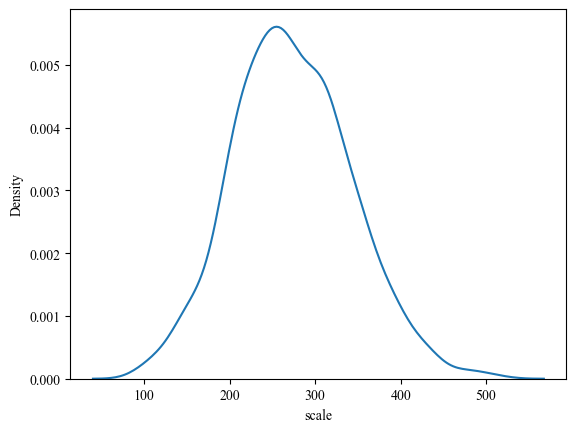

In [312]:
sns.kdeplot(data=PD_scale_df, x='scale')

In [17]:
sectoral_joind = sigma_df.merge(regional_PD_scale_df, on='NUTS_ID', how='left')
sectoral_joind['percentage_var'] = sectoral_joind['90%_var'] / sectoral_joind['scale']
sectoral_joind['perturbation_factor'] = sectoral_joind['90%_var'] / (sectoral_joind['scale'] * 1.645)

sectoral_joind.head()

NUTS_ID    sigma_s    90%_var  Year       scale     shape  n_sample  \
0    DE11  43.257722  71.158953  2024  241.675486  0.598638    184102   
1    DE12  43.846190  72.126982  2024  240.024413  0.575167    184102   
2    DE13  37.927763  62.391170  2024  180.254490  0.509567    184102   
3    DE14  46.897198  77.145890  2024  228.909234  0.541688    184102   
4    DE21  28.761200  47.312174  2024  137.369779  0.577324    184102   

   percentage_var  perturbation_factor  
0        0.294440             0.178991  
1        0.300499             0.182674  
2        0.346128             0.210412  
3        0.337015             0.204872  
4        0.344415             0.209371

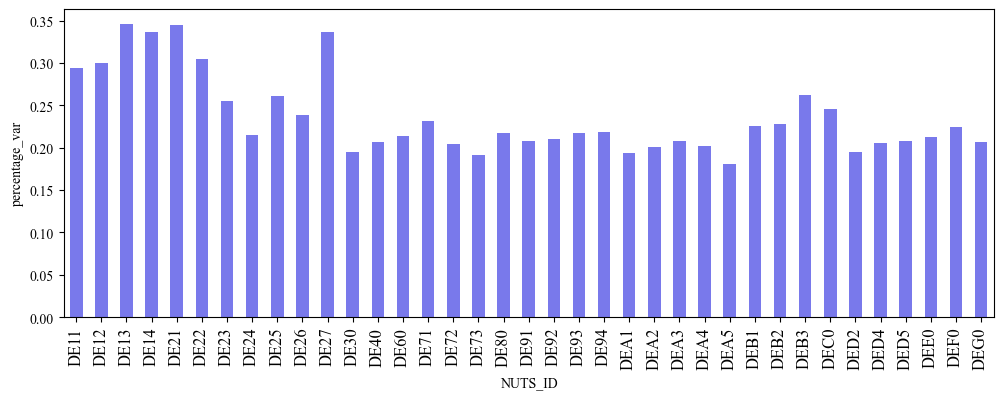

In [18]:
plt.figure(figsize=(12, 4))
sns.barplot(data=sectoral_joind, x='NUTS_ID', y='percentage_var', width=0.5, color='blue', alpha=0.6)
plt.xticks(rotation=90, fontsize=12);  # Rotate x-axis labels for better readability

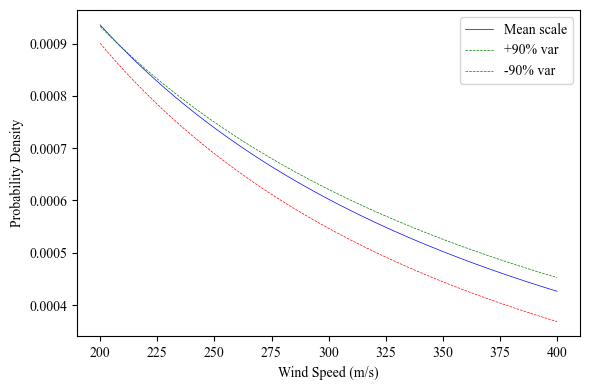

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Sector 0 parameters
sec = 2
shape = sectoral_joind['shape'][sec]  # shape parameter (k)
scale_mean = sectoral_joind['scale'][sec]
delta = sectoral_joind['90%_var'][sec]  # 90% variation (±)

# Weibull distributions
x = np.linspace(200, 400, 1000)
pdf_mean = weibull_min.pdf(x, c=shape, scale=scale_mean)
pdf_high = weibull_min.pdf(x, c=shape, scale=scale_mean + delta)
pdf_low  = weibull_min.pdf(x, c=shape, scale=max(scale_mean - delta, 0.1))  # avoid negative scale

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, pdf_mean, label='Mean scale', color='blue', linewidth=.5)
plt.plot(x, pdf_high, label='+90% var', color='green', linestyle='--',linewidth=.5)
plt.plot(x, pdf_low, label='-90% var', color='red', linestyle='--', linewidth=.5)
#plt.title('Weibull Distribution – Sector 0 (Interannual Variability)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\scipy\stats\_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


<Axes: ylabel='Density'>

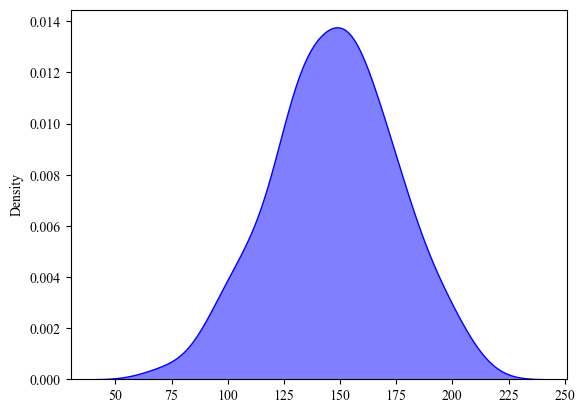

In [20]:
from scipy.stats import gamma, qmc
# Step 3: Generate outer MC perturbations (using QMC Sobol)
alpha = 0.598638         # shape parameter (example)
beta = 241.675486        # scale parameter (example)
sigma = 0.178991         # standard deviation (e.g. derived from 90% CI as σ = delta / 1.645)

n_outer = 100  # number of outer MC samples
sobol_outer = qmc.Sobol(d=1, scramble=True)
qmc_eps = sobol_outer.random(n_outer).flatten()
# Transform to normal-like noise centered at 1
perturbations = np.clip(np.random.normal(loc=1.0, scale=sigma, size=n_outer), 0.5, 1.5)

# Store results
mean_PD_samples = []

# Step 4: Loop over each perturbed scale and draw samples from Gamma
n_inner = 1000  # number of QMC samples per distribution
sobol_inner = qmc.Sobol(d=1, scramble=True)
qmc_uniforms = sobol_inner.random(n_inner).flatten()

for perturb in perturbations:
    scale_perturbed = beta * perturb
    PD_samples = gamma.ppf(qmc_uniforms, a=alpha, loc=0, scale=scale_perturbed)
    mean_PD_samples.append(np.mean(PD_samples))

# Step 5: Analyze results
mean_PD_samples = np.array(mean_PD_samples)
sns.kdeplot(mean_PD_samples, fill=True, color='blue', alpha=0.5)

C:\Users\mun93\AppData\Local\Temp\ipykernel_29788\1203879173.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
C:\Users\mun93\AppData\Local\Temp\ipykernel_29788\1203879173.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
C:\Users\mun93\AppData\Local\Temp\ipykernel_29788\1203879173.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot


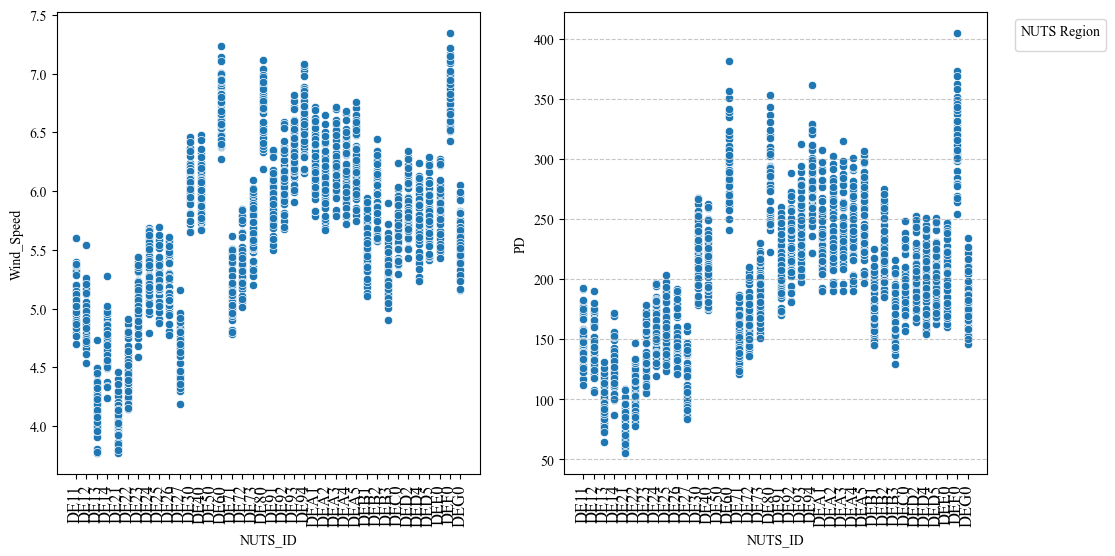

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
#a = de_df[de_df['nuts'].str.contains('DE50')]

fig, ax = plt.subplots(1,2, figsize=(12, 6), sharey=False)

sns.scatterplot(data=de_grouped, x='NUTS_ID', y = 'Wind_Speed', ax=ax[0])
sns.scatterplot(data=de_grouped, x='NUTS_ID', y = 'PD', ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=12)  # Rotate x-axis labels for better readability

plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

C:\Users\mun93\AppData\Local\Temp\ipykernel_30260\3074173542.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=14)


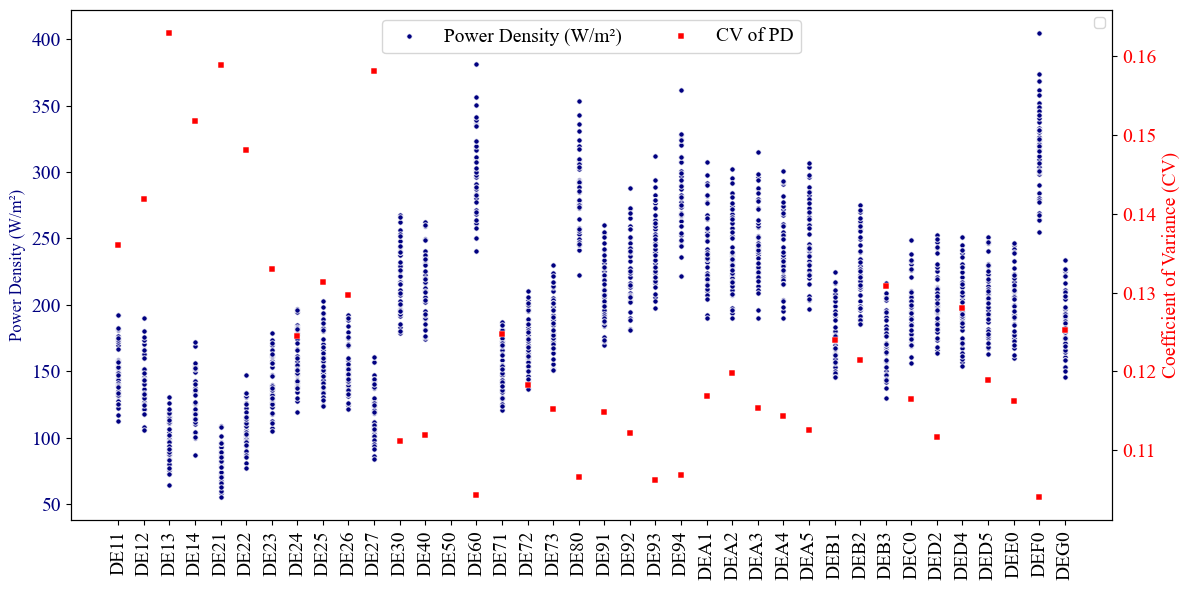

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis: Power Density
sns.scatterplot(data=de_grouped, x='NUTS_ID', y='PD', ax=ax1, marker='.',  color='navy', label='Power Density (W/m²)', s=60)
ax1.set_ylabel("Power Density (W/m²)", fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(False)

# Create secondary y-axis for Coefficient of Variation
ax2 = ax1.twinx()
sns.scatterplot(data=pd_stats.dropna(), x='NUTS_ID', y='cv_PD', ax=ax2, marker='s', color='red', label='CV of PD', s=20)
ax2.set_ylabel("Coefficient of Variance (CV)", fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelsize=14)
ax2.legend('')

# X-axis formatting
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel("", fontsize=12)

# Grid and layout
ax1.grid(False)
fig.tight_layout()

# Add legends manually
lines_labels_1 = ax1.get_legend_handles_labels()
lines_labels_2 = ax2.get_legend_handles_labels()
lines = lines_labels_1[0] + lines_labels_2[0]
labels = lines_labels_1[1] + lines_labels_2[1]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=14)


plt.grid(False)
plt.show()


C:\Users\mun93\AppData\Local\Temp\ipykernel_16084\1808446142.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability


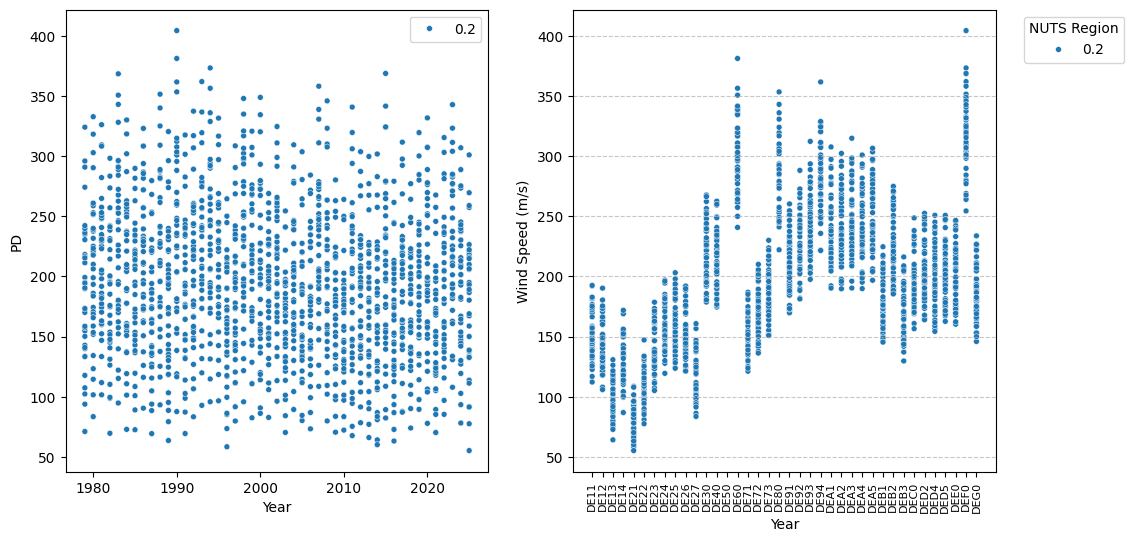

In [46]:
import seaborn as sns


fig, ax = plt.subplots(1,2, figsize=(12, 6), sharey=False)

sns.scatterplot(data=de_grouped, x='Year', y = 'PD', size=.2, ax=ax[0])
sns.scatterplot(data=de_grouped, x='NUTS_ID', y = 'PD', size=.2, ax=ax[1])


ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")

plt.legend(title="NUTS Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

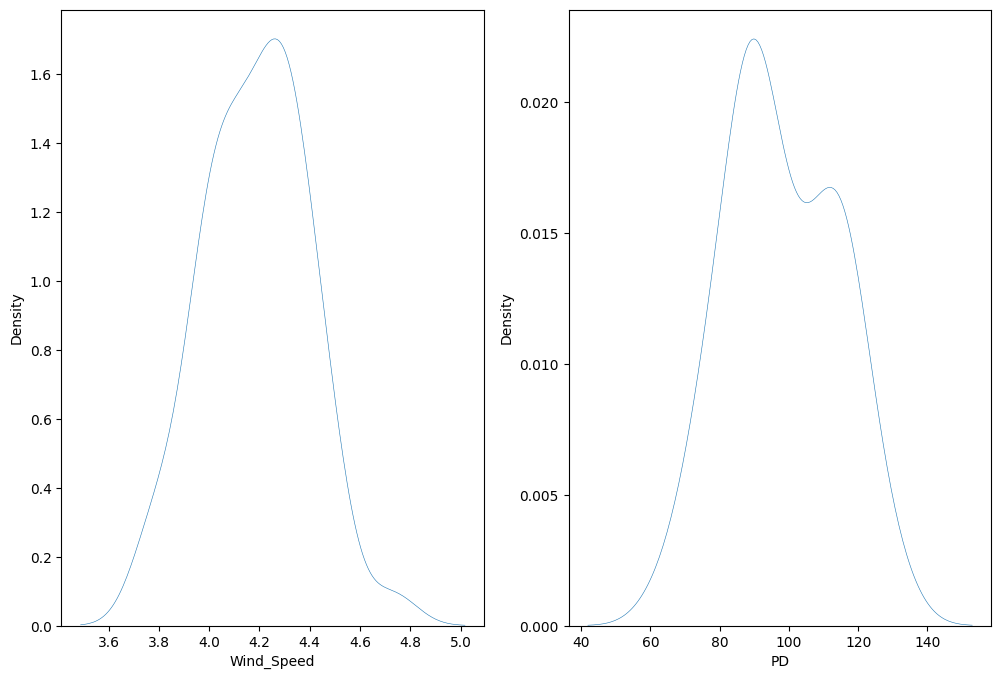

In [161]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()


de_grouped

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=de_grouped[de_grouped.NUTS_ID == 'DE13'], x='Wind_Speed', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=de_grouped[de_grouped.NUTS_ID == 'DE13'], x='PD', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

#[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

c:\Users\mun93\anaconda3\envs\climate-env\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mun93\anaconda3\envs\climate-env\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mun93\anaconda3\envs\climate-env\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


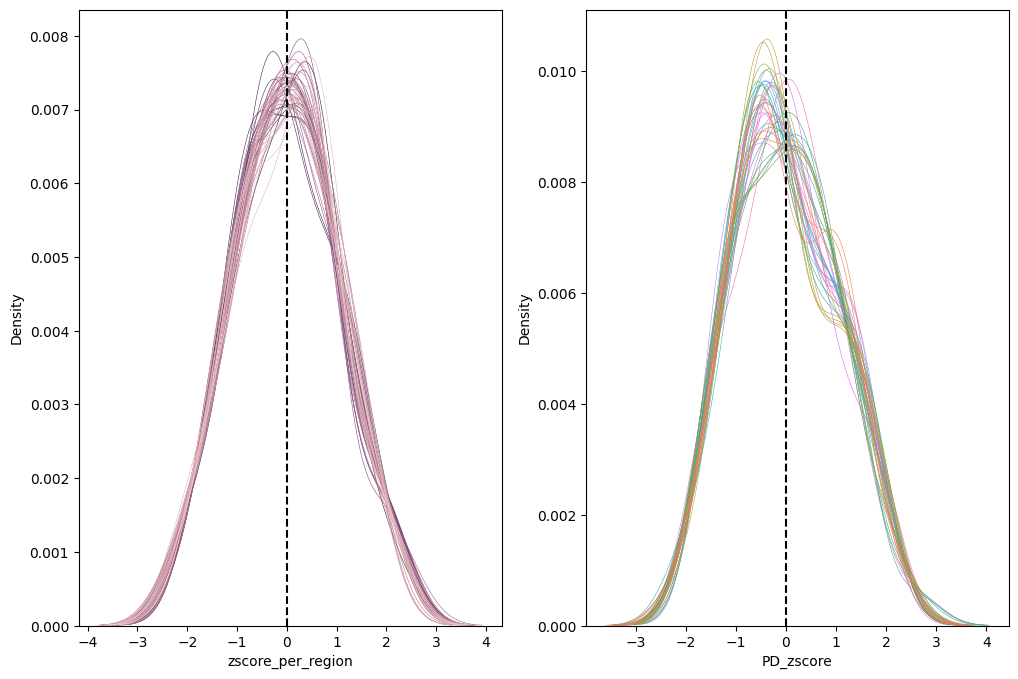

In [63]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()

# Apply normalization per region
de_grouped['zscore_per_region'] = de_grouped.groupby(['Year'])['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Apply normalization per region
de_grouped['PD_zscore'] = de_grouped.groupby(['NUTS_ID'])['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

de_grouped

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=de_grouped, x='zscore_per_region', hue='Year', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=de_grouped, x='PD_zscore', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

In [24]:
de_grouped[de_grouped.NUTS_ID == 'DE50'].head(4)

Year NUTS_ID  Wind_Speed  PD
13   1979    DE50         NaN NaN
51   1980    DE50         NaN NaN
89   1981    DE50         NaN NaN
127  1982    DE50         NaN NaN

In [25]:
import pandas as pd

# Group by NUTS_ID and calculate mean & standard deviation of PD
stats_df = de_grouped.copy()
process_na = stats_df.fillna(0)
mue_std = process_na.groupby("NUTS_ID")["PD"].agg(["mean", "std"]).reset_index()

mue_std

NUTS_ID        mean        std
0     DE11  150.798210  20.507801
1     DE12  143.857651  20.413721
2     DE13   97.968533  15.964320
3     DE14  129.611816  19.668367
4     DE21   80.421027  12.775125
5     DE22  108.778680  16.115016
6     DE23  138.851711  18.471101
7     DE24  158.347987  19.719949
8     DE25  159.784006  20.985822
9     DE26  153.205707  19.878665
10    DE27  119.099747  18.832790
11    DE30  219.733694  24.437467
12    DE40  214.520347  24.018417
13    DE50    0.000000   0.000000
14    DE60  300.274214  31.308789
15    DE71  151.464366  18.892228
16    DE72  170.110397  20.121756
17    DE73  185.946334  21.427202
18    DE80  284.089499  30.285661
19    DE91  211.487602  24.277225
20    DE92  228.951060  25.694161
21    DE93  246.383145  26.172418
22    DE94  282.708216  30.216271
23    DEA1  244.152251  28.544228
24    DEA2  240.302415  28.792938
25    DEA3  249.075831  28.732298
26    DEA4  243.091581  27.787954
27    DEA5  249.569689  28.077813
28    DEB1  178.342089  22.119315
29    DEB2  224.078522  27.199361
30    DEB3  170.465389  22.309169
31    DEC0  200.188213  23.328929
32    DED2  205.082094  22.893661
33    DED4  199.559931  25.563882
34    DED5  205.373144  24.414332
35    DEE0  201.782073  23.453080
36    DEF0  317.561402  33.030158
37    DEG0  186.963798  23.422285

In [69]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.1 MB 25.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 24.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mun93\ana

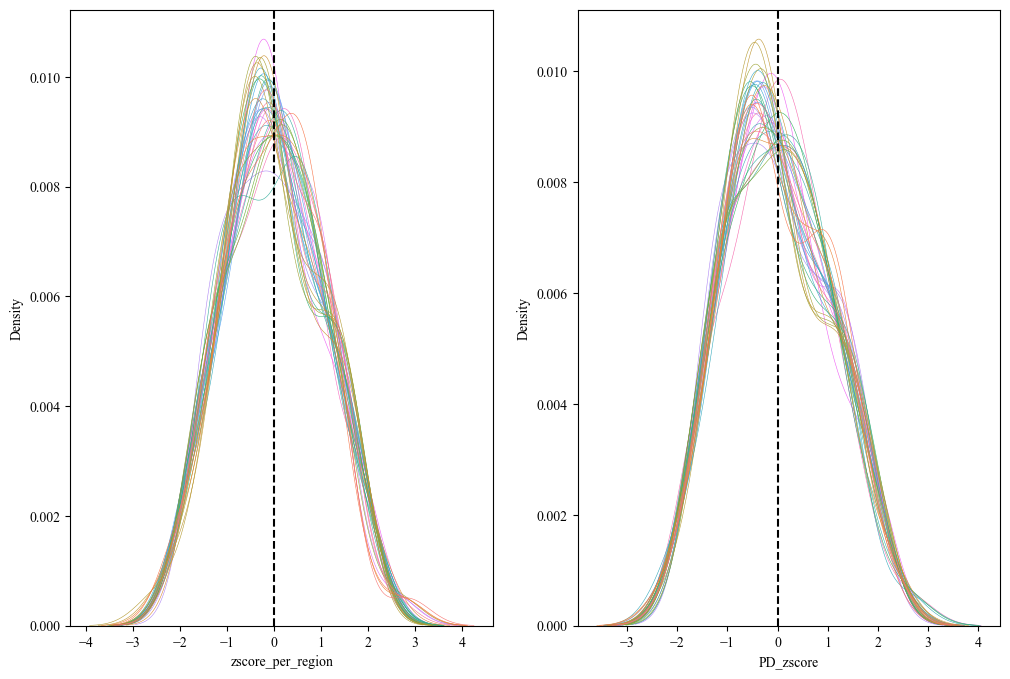

In [70]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(1,2, figsize=(12, 8), sharey=False)
# Initialize the scaler
scaler = StandardScaler()

# Apply normalization per region
de_grouped['zscore_per_region'] = de_grouped.groupby(['NUTS_ID'])['Wind_Speed'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Apply normalization per region
de_grouped['PD_zscore'] = de_grouped.groupby(['NUTS_ID'])['PD'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

de_grouped

import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE of Z-scores
sns.kdeplot(data=de_grouped, x='zscore_per_region', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[0], legend=False)
sns.kdeplot(data=de_grouped, x='PD_zscore', hue='NUTS_ID', fill=False, linewidth=.4, ax=ax[1], legend=False)

[ax[i].axvline(0, color='black', linestyle='--', label='Mean (Z=0)') for i in range(2)]

plt.show()

0
Gamma params: shape=278.11, scale=0.95


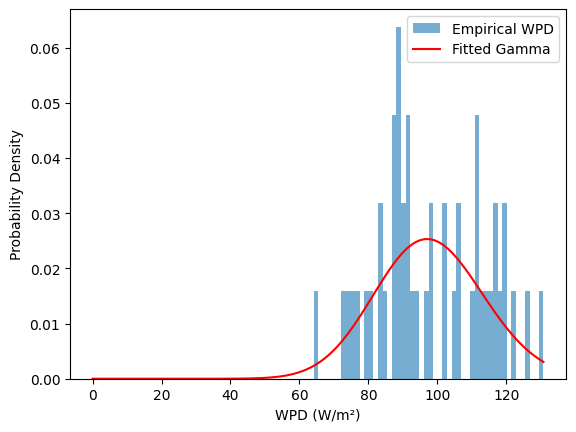

In [86]:
from scipy.stats import gamma, lognorm
import matplotlib.pyplot as plt

# Example: Historical annual WPD (W/m²) for one region
#annual_wpd = de_melted[(de_melted.NUTS_ID == 'DE12') & (de_melted.Year ==2023)].PD  # Mock data
annual_wpd = de_grouped[(de_grouped.NUTS_ID == 'DE13')].PD 
print(annual_wpd.isna().sum())
annual_wpd = annual_wpd.dropna()

# Fit Gamma distribution to WPD
shape, loc, scale = gamma.fit(annual_wpd)
print(f"Gamma params: shape={shape:.2f}, scale={scale:.2f}")

# Plot histogram vs fitted PDF
plt.hist(annual_wpd, bins=50, density=True, alpha=0.6, label="Empirical WPD")
x = np.linspace(0, np.max(annual_wpd), 100)
plt.plot(x, gamma.pdf(x, shape, loc, scale), 'r-', label="Fitted Gamma")
plt.legend()
plt.xlabel('WPD (W/m²)')
plt.ylabel('Probability Density')
plt.show()

Normal params: mean=97.97, std=15.79


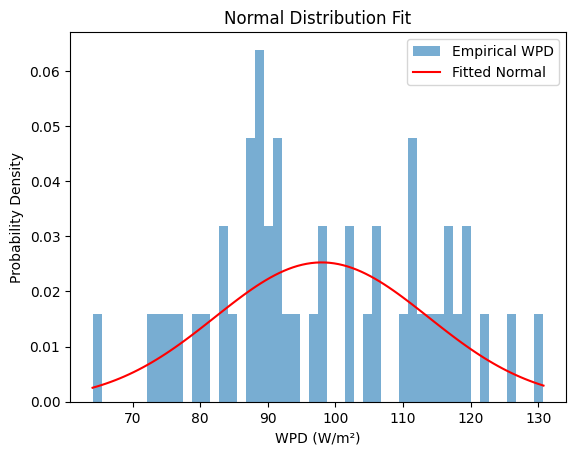

In [99]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Example: Clean annual WPD data
annual_wpd = de_grouped[(de_grouped.NUTS_ID == 'DE13')].PD
annual_wpd = annual_wpd.dropna()

# Fit Normal distribution to WPD
mu, sigma = norm.fit(annual_wpd)  # Mean and standard deviation
print(f"Normal params: mean={mu:.2f}, std={sigma:.2f}")

# Plot histogram vs fitted Normal PDF
plt.hist(annual_wpd, bins=50, density=True, alpha=0.6, label="Empirical WPD")
x = np.linspace(np.min(annual_wpd), np.max(annual_wpd), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.legend()
plt.xlabel('WPD (W/m²)')
plt.ylabel('Probability Density')
plt.title("Normal Distribution Fit")
plt.show()

0


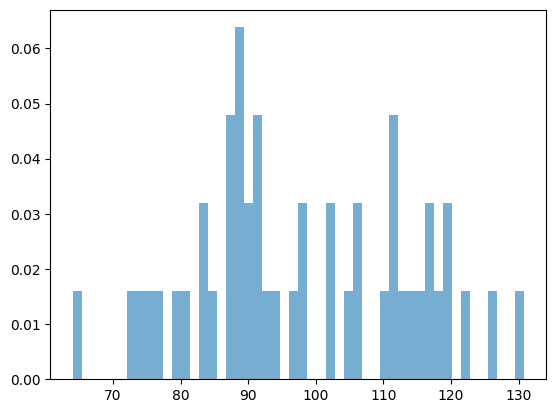

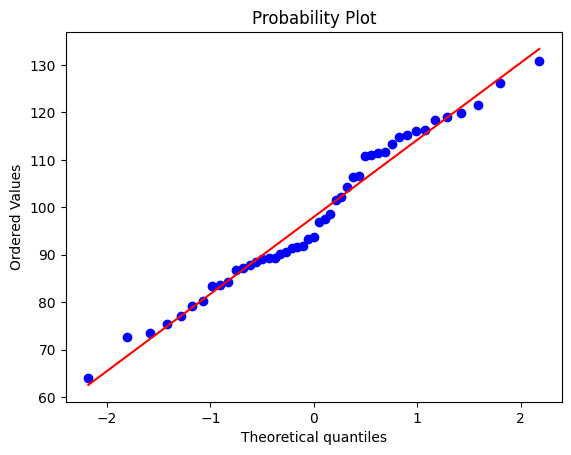

In [96]:
import matplotlib.pyplot as plt
annual_wpd = de_grouped[(de_grouped.NUTS_ID == 'DE13')].PD 
print(annual_wpd.isna().sum())
annual_wpd = annual_wpd.dropna()

plt.hist(annual_wpd, bins=50, density=True, alpha=0.6)
plt.show()

import scipy.stats as stats
stats.probplot(annual_wpd, dist="norm", plot=plt)
plt.show()



In [98]:
from scipy.stats import kstest
kstest(annual_wpd, "norm")  # Test for normal distribution
#kstest(annual_wpd, "gamma")  # Test for gamma distribution

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(64.09642302943982), statistic_sign=np.int8(-1))

## GWA data

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 3659, 'height': 3081, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 5.876572682193888,
       0.0, -0.002500000000000124, 54.97826874773588), 'blockxsize': 3659, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


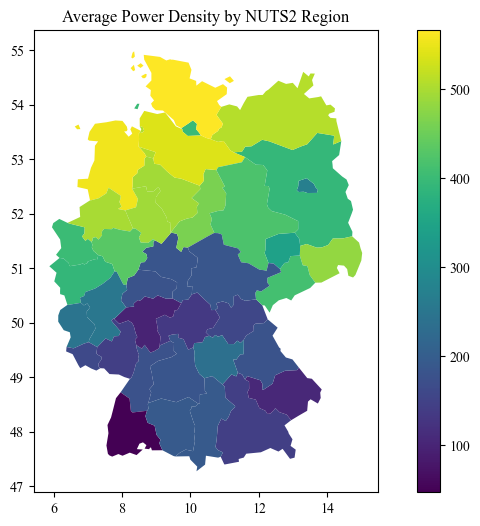

In [28]:
import rasterio
from rasterstats import zonal_stats
import geopandas as gpd
import pandas as pd

# Load the NUTS2 shapefile (replace with your path)
gdf = DE.copy()
# Load the power density raster
raster_path = r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif" #r"C:\Users\mun93\Downloads\DEU_power-density_100m.tif"
with rasterio.open(raster_path) as src:
    # Check the CRS of the raster
    print(src.profile)
    
gdf = gdf.to_crs(src.crs)  # Reproject to match raster CRS

# Compute mean power density per NUTS2 region
stats = zonal_stats(
    vectors=gdf,           # GeoDataFrame with NUTS2 polygons
    raster=raster_path,    # Power density raster
    stats=['mean'],        # Calculate mean (add 'std' for standard deviation)
    geojson_out=True       # Return results as GeoJSON for easy conversion
)

# Convert results to a DataFrame
result_gdf = gpd.GeoDataFrame.from_features(stats)
gwa_df = pd.DataFrame({
    'NUTS_ID': result_gdf['NUTS_ID'],  # Replace 'NUTS_ID' with your region ID column
    'mean_power_density': result_gdf['mean']
})

gwa_df = gwa_df.dropna()  # Remove regions with no data
# Or fill with a default value (e.g., 0)
# df['mean_power_density'] = df['mean_power_density'].fillna(0)
# Save to CSV
#gwa_df.to_csv("nuts2_power_density.csv", index=False)

# Optional: Merge back with the original GeoDataFrame
gdf = gdf.merge(gwa_df, on='NUTS_ID', how='left')
import matplotlib.pyplot as plt

gdf.plot(column='mean_power_density', legend=True, figsize=(10, 6))
plt.title("Average Power Density by NUTS2 Region")
plt.show()

In [29]:
import rasterio
import geopandas as gpd
import numpy as np
from rasterio.mask import mask
from geopy.distance import geodesic

# Load NUTS2 regions for Germany
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
gdf = gpd.read_file(shpfile)
gdf = gdf[(gdf['NUTS_ID'].str.contains('DE')) & (gdf['LEVL_CODE'] == 2)]

# Load raster
raster_path = r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif"
with rasterio.open(raster_path) as src:
    # Ensure CRS match
    gdf = gdf.to_crs(src.crs)
    
    # Calculate pixel area
    if src.crs.is_projected:
        pixel_area_m2 = abs(src.transform.a * src.transform.e)
    else:
        left, top = src.transform * (0, 0)
        right, bottom = src.transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m

    results = []
    for idx, row in gdf.iterrows():
        # Clip raster to region
        out_image, _ = mask(src, [row.geometry], crop=True, nodata=np.nan)
        valid_data = out_image[0]  # Get first band
        
        # Count valid pixels (>0 and not NaN)
        valid_pixels = np.sum((~np.isnan(valid_data)) & (valid_data > 0)
                              )
        valid_area_km2 = (valid_pixels * pixel_area_m2) / 1e6  # Convert to km²
        
        results.append({
            "NUTS_ID": row['NUTS_ID'],
            "Valid_Area_km2": round(valid_area_km2, 2),
            "Valid_Pixel_Count": valid_pixels
        })

# Create DataFrame
area_df = pd.DataFrame(results)
area_df.head()


NUTS_ID  Valid_Area_km2  Valid_Pixel_Count
0    DE11           53.73               1206
1    DE12           43.66                980
2    DE13           55.11               1237
3    DE14          108.79               2442
4    DE21          257.27               5775

In [30]:

print(area_df.Valid_Area_km2.sum())

25402.83


In [31]:
import pandas as pd
import numpy as np

hist_df = mue_std.copy()
gwa_dict = gwa_df.copy()  # GWA values per region
hist_gwa_df = pd.merge(gwa_dict, hist_df, on='NUTS_ID', how='inner')
hist_gwa_df

# Filter only the rows with NUTS_ID in DE92, DE93, and DE94
selected_regions = hist_df[hist_df['NUTS_ID'].isin(['DE92', 'DE93', 'DE94'])]
# Calculate the average of the 'mean' and 'std' for those regions
mean_of_means = selected_regions['mean'].mean()
mean_of_stds = selected_regions['std'].mean()

# Handle DE50 by assigning the calculated means
hist_gwa_df.loc[hist_gwa_df['NUTS_ID'] == 'DE50', 'mean'] = mean_of_means
hist_gwa_df.loc[hist_gwa_df['NUTS_ID'] == 'DE50', 'std'] = mean_of_stds

hist_gwa_df.head()


NUTS_ID  mean_power_density        mean        std
0    DE11          184.852396  150.798210  20.507801
1    DE12          178.561360  143.857651  20.413721
2    DE13           47.319875   97.968533  15.964320
3    DE14          192.052086  129.611816  19.668367
4    DE21          143.235038   80.421027  12.775125

In [32]:
hist_original_merged = pd.merge(hist_gwa_df[['NUTS_ID', 'mean_power_density']], sectoral_joind, on='NUTS_ID', how='left')
hist_original_merged['perturbation_factor_scalled'] = (hist_original_merged['perturbation_factor'] * hist_original_merged['mean_power_density'] 
                                                                            / (hist_original_merged['scale']))
hist_original_merged

# Select the relevant regions
mean_k = hist_original_merged.loc[hist_original_merged['NUTS_ID'].isin(['DE92', 'DE93', 'DE94']), 'shape'].mean()
mean_lambda = hist_original_merged.loc[hist_original_merged['NUTS_ID'].isin(['DE92', 'DE93', 'DE94']), 'scale'].mean()
factor_scalled = hist_original_merged.loc[hist_original_merged['NUTS_ID'].isin(['DE92', 'DE93', 'DE94']), 'perturbation_factor_scalled'].mean()

# Assign to DE50 in joined_df
hist_original_merged.loc[hist_original_merged['NUTS_ID'] == 'DE50', 'shape'] = mean_k
hist_original_merged.loc[hist_original_merged['NUTS_ID'] == 'DE50', 'scale'] = mean_lambda
hist_original_merged.loc[hist_original_merged['NUTS_ID'] == 'DE50', 'perturbation_factor_scalled'] = factor_scalled

hist_original_merged = hist_original_merged.merge(area_df, on = 'NUTS_ID').reset_index()
hist_original_merged

index NUTS_ID  mean_power_density    sigma_s    90%_var    Year  \
0       0    DE11          184.852396  43.257722  71.158953  2024.0   
1       1    DE12          178.561360  43.846190  72.126982  2024.0   
2       2    DE13           47.319875  37.927763  62.391170  2024.0   
3       3    DE14          192.052086  46.897198  77.145890  2024.0   
4       4    DE21          143.235038  28.761200  47.312174  2024.0   
5       5    DE22          105.939052  34.436943  56.648772  2024.0   
6       6    DE23          180.223076  31.204798  51.331893  2024.0   
7       7    DE24          156.834029  29.453013  48.450207  2024.0   
8       8    DE25          235.931807  37.845284  62.255492  2024.0   
9       9    DE26          133.703283  33.279934  54.745492  2024.0   
10     10    DE27          192.870512  41.757135  68.690486  2024.0   
11     11    DE30          270.057971  34.490922  56.737566  2024.0   
12     12    DE40          393.562449  32.387802  53.277934  2024.0   
13     13    DE50          504.836586        NaN        NaN     NaN   
14     14    DE60          399.453785  50.355416  82.834659  2024.0   
15     15    DE71           96.631115  32.565683  53.570548  2024.0   
16     16    DE72          179.083558  30.542168  50.241867  2024.0   
17     17    DE73          183.505662  30.005464  49.358989  2024.0   
18     18    DE80          508.580302  45.388125  74.663466  2024.0   
19     19    DE91          460.750399  35.680855  58.695006  2024.0   
20     20    DE92          495.042436  38.215863  62.865094  2024.0   
21     21    DE93          539.072127  39.659976  65.240661  2024.0   
22     22    DE94          554.479768  46.955128  77.241186  2024.0   
23     23    DEA1          400.214885  38.487878  63.312559  2024.0   
24     24    DEA2          390.410478  41.037101  67.506030  2024.0   
25     25    DEA3          497.547939  42.919913  70.603257  2024.0   
26     26    DEA4          492.153008  40.689248  66.933812  2024.0   
27     27    DEA5          431.370392  38.121972  62.710645  2024.0   
28     28    DEB1          253.970167  34.872536  57.365321  2024.0   
29     29    DEB2          246.606094  45.179777  74.320734  2024.0   
30     30    DEB3          143.704645  42.479933  69.879490  2024.0   
31     31    DEC0          160.831187  44.700335  73.532051  2024.0   
32     32    DED2          481.841382  33.002834  54.289661  2024.0   
33     33    DED4          410.329695  35.364556  58.174695  2024.0   
34     34    DED5          341.820323  37.058800  60.961725  2024.0   
35     35    DEE0          419.040892  33.964547  55.871680  2024.0   
36     36    DEF0          566.108596  53.887539  88.645002  2024.0   
37     37    DEG0          186.252773  33.672864  55.391861  2024.0   

         scale     shape  n_sample  percentage_var  perturbation_factor  \
0   241.675486  0.598638  184102.0        0.294440             0.178991   
1   240.024413  0.575167  184102.0        0.300499             0.182674   
2   180.254490  0.509567  184102.0        0.346128             0.210412   
3   228.909234  0.541688  184102.0        0.337015             0.204872   
4   137.369779  0.577324  184102.0        0.344415             0.209371   
5   185.972114  0.566994  184102.0        0.304609             0.185173   
6   200.825094  0.656989  184102.0        0.255605             0.155383   
7   225.353606  0.663422  184102.0        0.214996             0.130697   
8   238.051087  0.642408  184102.0        0.261522             0.158980   
9   229.111041  0.634593  184102.0        0.238947             0.145257   
10  204.008496  0.565229  184102.0        0.336704             0.204683   
11  291.384459  0.722157  184102.0        0.194717             0.118369   
12  257.061946  0.798745  184102.0        0.207257             0.125992   
13  317.448870  0.771414       NaN             NaN                  NaN   
14  386.809042  0.754831  184102.0        0.214149             0.130182   
15  231.309784  0.622336  184102.0

In [33]:
print(hist_original_merged.Valid_Area_km2.sum())

25402.83


## calculate the perturbation factor 

In [34]:
print(hist_original_merged.perturbation_factor_scalled.describe())

count    38.000000
mean      0.148955
std       0.051525
min       0.055237
25%       0.105173
50%       0.143098
75%       0.195358
max       0.237466
Name: perturbation_factor_scalled, dtype: float64


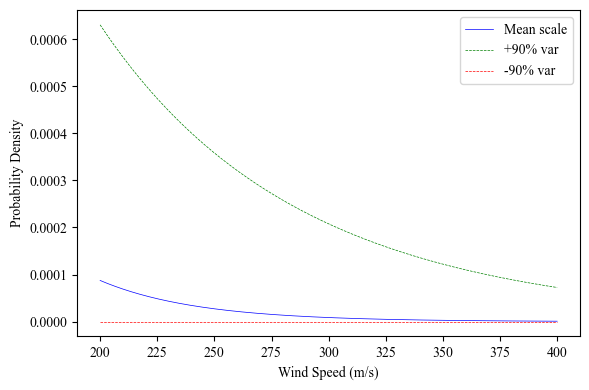

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Sector 0 parameters
sec = 2
shape = hist_original_merged['shape'][sec]  # shape parameter (k)
scale_mean = hist_original_merged['mean_power_density'][sec]
delta = hist_original_merged['90%_var'][sec]  # 90% variation (±)

# Gamma distributions
x = np.linspace(200, 400, 1000)
pdf_mean = gamma.pdf(x, a=shape, scale=scale_mean)
pdf_high = gamma.pdf(x, a=shape, scale=scale_mean + delta)
pdf_low  = gamma.pdf(x, a=shape, scale=max(scale_mean - delta, 0.1))  # avoid negative scale

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, pdf_mean, label='Mean scale', color='blue', linewidth=.5)
plt.plot(x, pdf_high, label='+90% var', color='green', linestyle='--', linewidth=.5)
plt.plot(x, pdf_low, label='-90% var', color='red', linestyle='--', linewidth=.5)
#plt.title('Gamma Distribution – Sector 0 (Interannual Variability)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\scipy\stats\_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


<Axes: ylabel='Density'>

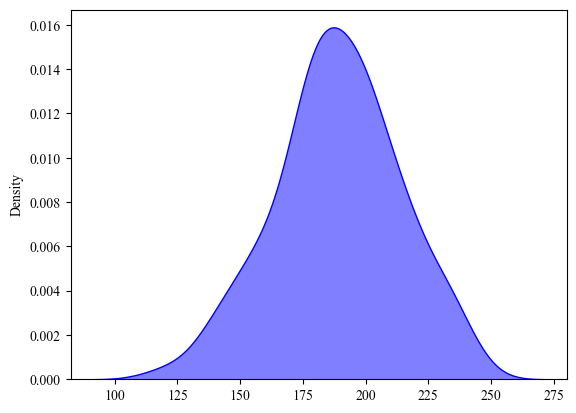

In [36]:
from scipy.stats import gamma, qmc
# Step 3: Generate outer MC perturbations (using QMC Sobol)
alpha = 0.598638	       # shape parameter (example)
beta = 190.695427        # scale parameter (example)
sigma = 0.141234         # standard deviation (e.g. derived from 90% CI as σ = delta / 1.645)
fitting_mean = 241.675486

seed = 42
np.random.seed(seed)

n_outer = 100  # number of outer MC samples
sobol_outer = qmc.Sobol(d=1, scramble=True, seed=seed)
qmc_eps = sobol_outer.random(n_outer).flatten()
# Transform to normal-like noise centered at 1
perturbations = np.clip(np.random.normal(loc=1.0, scale=sigma, size=n_outer), 0.5, 1.5)
#sns.kdeplot(perturbations, fill=True, color='blue', alpha=0.5)
# Store results
mean_PD_samples = []

# Step 4: Loop over each perturbed scale and draw samples from Gamma
n_inner = 1000  # number of QMC samples per distribution
sobol_inner = qmc.Sobol(d=1, scramble=True)
qmc_uniforms = sobol_inner.random(n_inner).flatten()
#sns.scatterplot(x=np.arange(len(qmc_uniforms)), y=qmc_uniforms, alpha=0.5)

for perturb in perturbations:
    scale_perturbed = fitting_mean * perturb #* beta/fitting_mean
    PD_samples = gamma.ppf(qmc_uniforms, a=alpha, loc=0, scale=scale_perturbed)
    mean_PD_samples.append(np.mean(PD_samples * beta/(fitting_mean*alpha)))

# Step 5: Analyze results
mean_PD_samples = np.array(mean_PD_samples)
sns.kdeplot(mean_PD_samples, fill=True, color='blue', alpha=0.5)

In [38]:
# Generate MC samples
n_samples = 1000000
mc_results = {}

for _, row in hist_gwa_df.iterrows():
    region = row['NUTS_ID']
    gwa = row['mean_power_density']
    std = row['std']
    mean = row['mean']
    
    if pd.notna(gwa) and pd.notna(std):
        samples = np.random.normal(loc=gwa, scale=std*gwa/mean, size=n_samples)
        mc_results[region] = samples

mc_results

{'DE11': array([149.27139161, 174.27779336, 176.23689585, ..., 137.24744519,
        227.72764131, 135.76403564]),
 'DE12': array([204.39639424, 161.49578959, 144.56540541, ..., 205.61342037,
        167.77351995, 194.13511723]),
 'DE13': array([30.05710602, 54.46951933, 38.30159626, ..., 44.49917547,
        47.41149118, 47.33124643]),
 'DE14': array([224.97974345, 136.45499549, 170.78944021, ..., 153.22756241,
        154.59588728, 223.99935942]),
 'DE21': array([135.96200075, 175.76813575, 168.5002274 , ..., 121.59629021,
        151.33794809, 131.22179105]),
 'DE22': array([ 96.26303795, 100.31590887, 135.33988818, ...,  86.84332741,
         95.8509492 ,  94.05234081]),
 'DE23': array([157.67021427, 190.39470928, 150.62638284, ..., 167.66471953,
        176.01959957, 178.95785614]),
 'DE24': array([133.41763606, 137.62192948, 162.08878786, ..., 180.08269012,
        195.65522644, 124.69174082]),
 'DE25': array([225.02131295, 180.72465098, 253.07826327, ..., 214.90819405,
        2

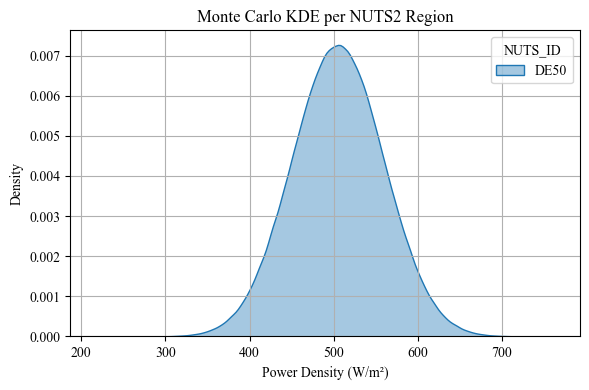

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten mc_results into a DataFrame
mc_df = pd.DataFrame([
    {'NUTS_ID': region, 'PowerDensity': sample}
    for region, samples in mc_results.items()
    for sample in samples
])

# 📊 Plot KDEs with Seaborn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=mc_df[mc_df.NUTS_ID == 'DE50'], x="PowerDensity", hue="NUTS_ID", fill=True, common_norm=False, alpha=0.4)
plt.title('Monte Carlo KDE per NUTS2 Region')
plt.xlabel('Power Density (W/m²)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

## all the MC samples

In [40]:
mc_df

NUTS_ID  PowerDensity
0           DE11    149.271392
1           DE11    174.277793
2           DE11    176.236896
3           DE11    164.683948
4           DE11    180.797834
...          ...           ...
37999995    DEG0    154.564143
37999996    DEG0    179.223003
37999997    DEG0    207.336295
37999998    DEG0    176.636479
37999999    DEG0    208.764044

[38000000 rows x 2 columns]

In [ ]:
test1 = mc_df.merge(area_df, on='NUTS_ID', how='inner')
test1['TWh2'] = test1['PowerDensity'] * test1['Valid_Area_km2'] / 1000
test1
sns.kdeplot(data=test1[test1.NUTS_ID == 'DE50'], x="TWh2", fill='false')

In [184]:
power_density_mc = mc_df.copy()
power_density_mc.shape

import numpy as np
import pandas as pd
from scipy.stats import beta, triang

# Get unique regions & samples per region
unique_regions = power_density_mc['NUTS_ID'].unique()
n_regions = len(unique_regions)
n_samples = int(len(power_density_mc) / n_regions)

# 1. Generate global MC samples
efficiency_samples = np.random.uniform(0.3, 0.45, n_samples)
availability_samples = beta.rvs(a=.75, b=1, size=n_samples)
spacing_samples = triang.rvs(c=(7 - 4)/6, loc=5, scale=5, size=n_samples)
rotor_diameter_samples = np.random.normal(loc=150, scale=10, size=n_samples)

rotor_area_samples = np.pi * (rotor_diameter_samples / 2) ** 2  # m²

# 2. Repeat each array for each region
eff_all = np.tile(efficiency_samples, n_regions)
avail_all = np.tile(availability_samples, n_regions)
spacing_all = np.tile(spacing_samples, n_regions)
rotor_area_all = np.tile(rotor_area_samples, n_regions)

# 3. Add to your DataFrame
power_density_mc['efficiency'] = eff_all
power_density_mc['availability'] = avail_all
power_density_mc['spacing'] = spacing_all
power_density_mc['rotor_area'] = rotor_area_all  # same for all
power_density_mc['rotor_diameter'] = rotor_diameter_samples

# 4. Compute Potential
power_density_mc['potential'] = (
    power_density_mc['PowerDensity'] *
    power_density_mc['efficiency'] *
    power_density_mc['availability'] *
    power_density_mc['rotor_area'] /
     ((power_density_mc['spacing'] * power_density_mc['rotor_diameter']) ** 2)
)
potential = power_density_mc.merge(area_df, on='NUTS_ID', how='left')
potential['TWh'] = potential['potential'] * potential['Valid_Area_km2'] / 1e6 *8760 # Convert to TWh
potential.head(4)

ValueError: Length of values (1000000) does not match length of index (38000000)

<Axes: xlabel='potential', ylabel='Density'>

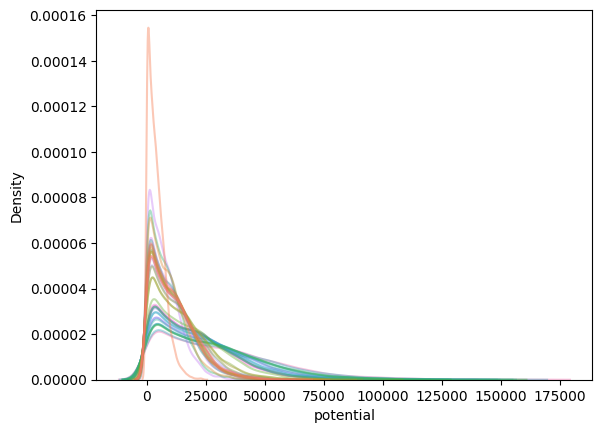

In [ ]:
sns.kdeplot(data=potential, x='potential', hue='NUTS_ID', fill=False, common_norm=False, alpha=0.4, legend=False)


<Axes: ylabel='Count'>

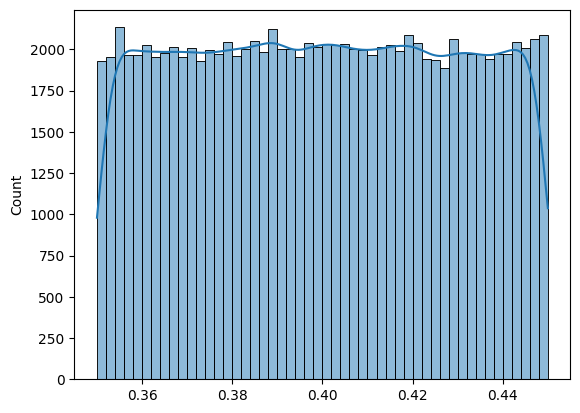

In [334]:
efficiency_samples = np.random.uniform(0.35, 0.45, 100000)
sns.histplot(data=efficiency_samples, bins=50, kde=True)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import beta, triang, truncnorm

# Parameters

power_density_mc = mc_df.copy()


# Step 2: Generate matching random samples for other parameters (one per row)
n_total = len(power_density_mc)

# Random samples
efficiency_samples = beta.rvs(a=8, b=5, loc=0.35, scale=0.45 - 0.35, size=n_total)
availability_samples = beta.rvs(a=2, b=5, loc=0.88, scale=0.95-0.88, size=n_total)
spacing_samples = triang.rvs(c=(7 - 5)/5, loc=5, scale=5, size=n_total)
rotor_diameter_samples = truncnorm.rvs(a =(100-150)/10, b=(165-150)/10, loc=150, scale=10, size=n_total)
rotor_area_samples = np.pi * (rotor_diameter_samples / 2) ** 2

# Step 3: Assign to DataFrame
power_density_mc['efficiency'] = efficiency_samples
power_density_mc['availability'] = availability_samples
power_density_mc['spacing'] = spacing_samples
power_density_mc['rotor_area'] = rotor_area_samples
power_density_mc['rotor_diameter'] = rotor_diameter_samples

power_density_mc['sample_id'] = np.arange(n_total)

# Step 4: Compute potential
power_density_mc['potential'] = (
    power_density_mc['PowerDensity'] *
    power_density_mc['efficiency'] *
    power_density_mc['availability'] *
    power_density_mc['rotor_area'] /
    ((power_density_mc['spacing'] * power_density_mc['rotor_diameter']) ** 2)
)

potential = power_density_mc.merge(area_df, on='NUTS_ID', how='left')
potential['TWh'] = potential['potential'] * potential['Valid_Area_km2'] / 1e6 *8760 # Convert to TWh
potential.head(4)

NUTS_ID  PowerDensity  efficiency  availability   spacing    rotor_area  \
0    DE11    222.146829    0.415385      0.890184  5.953675  13235.346943   
1    DE11    261.066964    0.415175      0.896439  6.325845  14823.227486   
2    DE11    217.592934    0.415080      0.917654  6.947982  16907.454687   
3    DE11    187.935888    0.412806      0.893160  7.244854  20977.213892   

   sample_id     potential  Valid_Area_km2  Valid_Pixel_Count        TWh  
0          0  30671.535408          982.31              22050  30.128956  
1          1  35992.318729          982.31              22050  35.355615  
2          2  29027.971865          982.31              22050  28.514467  
3          3  27693.222713          982.31              22050  27.203330

count    1000000.000000
mean          27.499950
std            9.479207
min            5.547068
25%           20.501328
50%           25.968191
75%           32.855380
max           90.062700
Name: TWh, dtype: float64


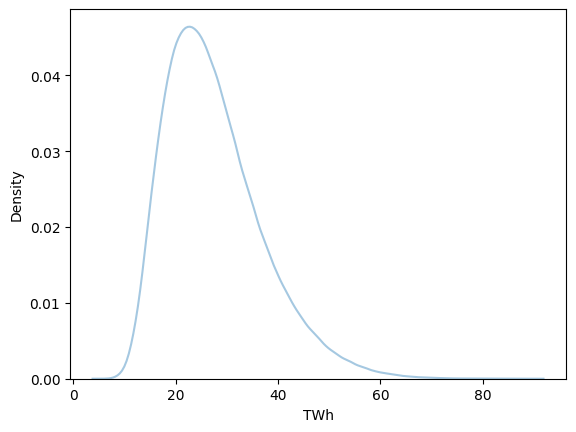

In [ ]:
sam = potential[potential.NUTS_ID=='DE11']
sns.kdeplot(data=sam, x='TWh', hue='NUTS_ID', fill=False, common_norm=True, alpha=0.4, legend=False)
print(sam.TWh.describe())

In [342]:
sam2 = potential[potential.sample_id==1]
sam2

NUTS_ID  PowerDensity  efficiency  availability   spacing    rotor_area  \
1    DE11    261.066964    0.415175      0.896439  6.325845  14823.227486   

   sample_id     potential  Valid_Area_km2  Valid_Pixel_Count        TWh  
1          1  35992.318729          982.31              22050  35.355615

## MC runs

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import beta, triang, truncnorm
from tqdm import tqdm

# ----------------------
# SETUP
# ----------------------
n_samples = 1_000_000

# Step 1: Generate region-specific power density MC samples
mc_results = {}  # key: NUTS_ID, value: array of power density samples

for _, row in hist_gwa_df.iterrows():
    region = row['NUTS_ID']
    gwa = row['mean_power_density']
    std = row['std']
    mean = row['mean']
    
    if pd.notna(gwa) and pd.notna(std):
        samples = np.random.normal(loc=gwa, scale=std * gwa / mean, size=n_samples)
        mc_results[region] = samples

# Step 2: Generate shared parameter samples across all regions
efficiency_samples = beta.rvs(a=8, b=5, loc=0.35, scale=0.10, size=n_samples)
availability_samples = beta.rvs(a=2, b=5, loc=0.88, scale=0.07, size=n_samples)
spacing_samples = triang.rvs(c=(7 - 5) / 5, loc=5, scale=5, size=n_samples)
#rotor_diameter_samples = truncnorm.rvs(a=(100 - 150) / 10, b=(165 - 150) / 10, loc=150, scale=10, size=n_samples)
#rotor_area_samples = np.pi * (rotor_diameter_samples / 2) ** 2

# Step 3: Calculate TWh for all regions and samples
rows = []

for region, power_density_samples in tqdm(mc_results.items(), desc="Processing regions"):
    # Get the valid area for this region
    valid_area_row = area_df.loc[area_df['NUTS_ID'] == region, 'Valid_Area_km2']
    if valid_area_row.empty:
        continue  # skip if no area data
    valid_area = valid_area_row.values[0]

    # Vectorized potential and TWh calculation
    potential = (
        power_density_samples *
        efficiency_samples *
        availability_samples *
        np.pi /
        (4 * spacing_samples**2)
    )

    twh = potential * valid_area / 1e6 *8760 # Convert from MW/km2 to TWh

    df_region = pd.DataFrame({
        'NUTS_ID': region,
        'sample': np.arange(n_samples),
        'TWh': twh
    })

    rows.append(df_region)

# Step 4: Combine all results
mc_df = pd.concat(rows, ignore_index=True)


Processing regions: 100%|██████████| 38/38 [00:01<00:00, 21.84it/s]


               sample             TWh
count  1000000.000000  1000000.000000
mean    499999.500000     1002.779599
std     288675.278932      293.027829
min          0.000000      439.867495
25%     249999.750000      778.687055
50%     499999.500000      961.564130
75%     749999.250000     1175.439821
max     999999.000000     2328.802239


<Axes: xlabel='TWh', ylabel='Density'>

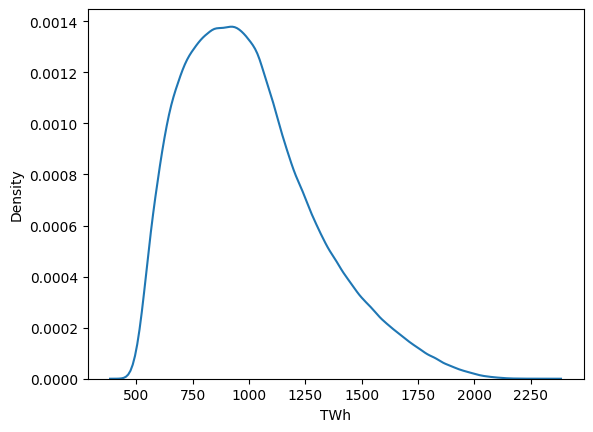

In [33]:
import seaborn as sns
#mc_df[mc_df.NUTS_ID=='DE11'].TWh.describe()
group_per_sdample = mc_df.groupby(['sample']).agg({'TWh': 'sum'}).reset_index()
print(group_per_sdample.describe())

sns.kdeplot(data = group_per_sdample, x='TWh')

In [25]:
# Find the sample ID with the highest total TWh
max_sample_id = group_per_sdample.loc[group_per_sdample['TWh'].idxmax(), 'sample']
print(max_sample_id)

# Build a DataFrame of power density per region for that sample
pd_for_max_sample = pd.DataFrame({
    'NUTS_ID': list(mc_results.keys()),
    'PowerDensity': [mc_results[region][max_sample_id] for region in mc_results]
})
pd_for_max_sample

# params_for_max_sample = {
#     'sample': max_sample_id,
#     'efficiency': efficiency_samples[max_sample_id],
#     'availability': availability_samples[max_sample_id],
#     'spacing': spacing_samples[max_sample_id],
#     'rotor_diameter': rotor_diameter_samples[max_sample_id],
#     'rotor_area': rotor_area_samples[max_sample_id],
# }

# params_for_max_sample


839562


NUTS_ID  PowerDensity
0     DE11    176.033456
1     DE12    213.842901
2     DE13     67.035927
3     DE14    204.159503
4     DE21    165.938487
5     DE22    220.264304
6     DE23    183.477845
7     DE24    213.184095
8     DE25    287.070013
9     DE26    233.590309
10    DE27    263.089238
11    DE30    273.179159
12    DE40    409.000232
13    DE50    478.494370
14    DE60    355.107966
15    DE71    175.322985
16    DE72    225.055309
17    DE73    209.517199
18    DE80    551.860452
19    DE91    427.958028
20    DE92    436.701591
21    DE93    498.760291
22    DE94    611.705509
23    DEA1    337.189834
24    DEA2    516.928007
25    DEA3    525.661543
26    DEA4    547.619907
27    DEA5    407.362082
28    DEB1    253.670353
29    DEB2    213.690121
30    DEB3    115.892117
31    DEC0    194.524043
32    DED2    386.201301
33    DED4    408.129403
34    DED5    364.462937
35    DEE0    323.629409
36    DEF0    662.457120
37    DEG0    214.731506

In [317]:
%pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


## New QMC runs

In [51]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, beta, triang, qmc
from tqdm import tqdm

# ----------------------
# PARAMETERS
# ----------------------
n_outer = 10000       # outer loop (perturbation samples)
n_inner = 1000      # inner samples per perturbation
seed = 42
np.random.seed(seed)

# ----------------------
# QMC Setup
# ----------------------
sobol_inner = qmc.Sobol(d=1, scramble=True, seed=seed)
qmc_uniforms = sobol_inner.random(n_inner).flatten()


rows = []

for _, row in hist_original_merged.iterrows():
    region = row['NUTS_ID']
    mean_pd = row['mean_power_density']
    shape = row['shape']  # gamma shape (k)
    scale = row['scale']  # gamma scale (θ)
    cv_pd = row['perturbation_factor_scalled']  # ~ std / mean
    valid_area = row['Valid_Area_km2']
    sigma = cv_pd

    for i in range(n_outer):
        epsilon = np.clip(np.random.normal(loc=1.0, scale=sigma), 0.3, 1.7)
        scale_perturbed = scale * epsilon

        # Draw parameter samples
        efficiency_samples = beta.rvs(a=8, b=8, loc=0.32, scale=0.10)
        availability_samples = beta.rvs(a=2, b=5, loc=0.88, scale=0.07)
        spacing_samples = triang.rvs(c=(7 - 5) / (10-5), loc=5, scale=5)

        # Generate inner QMC samples from Gamma distribution
        pd_samples = gamma.ppf(qmc_uniforms, a=shape, scale=scale_perturbed)
        pd_scaled = np.mean(pd_samples * (mean_pd / (shape * scale)))



        # Calculate potential and TWh
        potential = (
            pd_scaled *
            efficiency_samples *
            availability_samples *
            np.pi / (4 * spacing_samples**2)
        )

        twh = potential * valid_area / 1e6 * 8760  # Convert to TWh/year

        rows.append(
            {
            'NUTS_ID': region,
            'outer_sample': i,
            'TWh': twh,
            'pd_scaled': pd_scaled,
            'efficiency': efficiency_samples,
            'availability': availability_samples,
            'spacing': spacing_samples,
            'scale_perturbed': scale_perturbed,
            'epsilon': epsilon
            } ) 
        
    
mc_df = pd.DataFrame(rows)
# Combine results
#mc_df = pd.concat(rows, ignore_index=True)
mc_df.head()


NUTS_ID  outer_sample       TWh   pd_scaled  efficiency  availability  \
0    DE11             0  0.836540  197.119237    0.379405      0.899965   
1    DE11             1  0.661370  210.102236    0.369461      0.880567   
2    DE11             2  0.579864  161.623570    0.362003      0.903929   
3    DE11             3  0.257722  171.543701    0.356609      0.889328   
4    DE11             4  0.666456  205.352501    0.340710      0.909393   

    spacing  scale_perturbed   epsilon  
0  5.453701       258.110219  1.068003  
1  6.181075       275.110308  1.138346  
2  5.806546       211.631780  0.875686  
3  8.833726       224.621315  0.929434  
4  5.940705       268.890950  1.112612

<Axes: xlabel='scale_perturbed', ylabel='Density'>

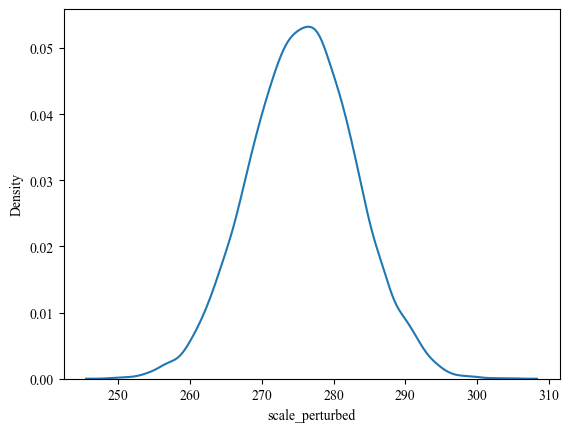

In [151]:
mc_df.TWh.describe()
mean_twh = mc_df[['outer_sample', 'TWh']].groupby('outer_sample').sum().reset_index()
#print(mean_twh.describe())
mean_twh
#sns.kdeplot(data=mean_twh, x='TWh')
mean_scale_perturbed = mc_df[['outer_sample', 'scale_perturbed']].groupby('outer_sample').mean().reset_index()
sns.kdeplot(data=mean_scale_perturbed, x='scale_perturbed')

In [171]:
mc_df[mc_df.outer_sample==0]

NUTS_ID  outer_sample         TWh   pd_scaled  efficiency  \
0         DE11             0    0.836540  197.119237    0.379405   
10000     DE12             0    0.374727  179.254411    0.349929   
20000     DE13             0    0.112196   48.723180    0.374828   
30000     DE14             0    1.205091  213.972293    0.380282   
40000     DE21             0    1.215928  122.219742    0.358721   
50000     DE22             0    0.101907   90.443799    0.365535   
60000     DE23             0    0.222041  181.434543    0.359901   
70000     DE24             0    0.468916  159.672826    0.375551   
80000     DE25             0    0.497055  303.018815    0.395676   
90000     DE26             0    0.165989  136.696922    0.370594   
100000    DE27             0    2.718312  152.697664    0.394161   
110000    DE30             0    0.195952  271.671808    0.358197   
120000    DE40             0   29.257122  614.295645    0.388901   
130000    DE50             0    0.462862  561.081680    0.354049   
140000    DE60             0    0.232531  403.997142    0.349126   
150000    DE71             0    0.335483   98.646873    0.360613   
160000    DE72             0    0.781011  189.648381    0.355218   
170000    DE73             0    1.597155  167.097722    0.358246   
180000    DE80             0   66.287689  459.178142    0.360511   
190000    DE91             0    3.615867  284.308569    0.370227   
200000    DE92             0   33.259692  754.887592    0.379832   
210000    DE93             0  191.501072  771.118460    0.358675   
220000    DE94             0   98.314672  586.492992    0.371928   
230000    DEA1             0    0.757300  387.282842    0.376195   
240000    DEA2             0    2.173750  432.147637    0.342417   
250000    DEA3             0    9.454469  549.839877    0.353183   
260000    DEA4             0    7.204112  410.897992    0.385000   
270000    DEA5             0    2.763358  456.731504    0.367674   
280000    DEB1             0    2.102051  273.524859    0.393747   
290000    DEB2             0    2.447784  273.269473    0.365928   
300000    DEB3             0    0.517075  153.606787    0.389071   
310000    DEC0             0    0.235372  153.858897    0.370391   
320000    DED2             0   21.397401  552.973543    0.370508   
330000    DED4             0    6.978325  433.794006    0.359246   
340000    DED5             0    0.485287  330.671529    0.368928   
350000    DEE0             0    7.041592  412.072860    0.344622   
360000    DEF0             0  190.614779  412.160295    0.367508   
370000    DEG0             0    2.859879  196.990229    0.383612   

        availability   spacing  scale_perturbed   epsilon  
0           0.899965  5.453701       258.110219  1.068003  
10000       0.903564  6.740396       241.338793  1.005476  
20000       0.896567  7.438725       185.923240  1.031449  
30000       0.922571  6.828308       255.460211  1.115989  
40000       0.900942  7.582899       117.400701  0.854633  
50000       0.888658  7.965681       159.025744  0.855105  
60000       0.892193  8.610411       202.465148  1.008167  
70000       0.925677  6.680661       229.759405  1.019551  
80000       0.899526  7.483078       306.187045  1.286224  
90000       0.901530  7.247811       234.586059  1.023897  
100000      0.882869  6.554757       161.775726  0.792985  
110000      0.892828  7.034205       293.516730  1.007318  
120000      0.889034  6.111247       401.732355  1.562784  
130000      0.897721  8.037377       353.263714  1.112821  
140000      0.904604  7.715815       391.712769  1.012677  
150000      0.924245  7.248401       236.488197  1.022387  
160000      0.910232  7.016892       261.220791  1.060513  
170000      0.913452  5.367951       234.882761  0.911841  
180000      0.895467  7.556785       309.737679  0.903967  
190000      0.909604  6.915027       174.069000  0.617878  
200000      0.901852  7.934967       455.534390  1.526887  
210000      0.898661  5.432777    

In [144]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Group by NUTS_ID
grouped = mc_df.groupby('NUTS_ID')['TWh']

# Create summary DataFrame
summary_stats = grouped.agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    q25=lambda x: np.percentile(x, 25),
    median='median',
    q75=lambda x: np.percentile(x, 75),
    p10=lambda x: np.percentile(x, 10),
    p90=lambda x: np.percentile(x, 90),
    max='max'
)

# Coefficient of variation
summary_stats['cv'] = summary_stats['std'] / summary_stats['mean']

# 95% confidence interval assuming normality
summary_stats['ci_lower'] = summary_stats['mean'] - 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))
summary_stats['ci_upper'] = summary_stats['mean'] + 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))

# Round for readability
summary_stats = summary_stats.round(3)

# Display
summary_stats.sort_values(by='mean', ascending=False).reset_index(drop=False)


NUTS_ID  count     mean     std     min      q25   median      q75  \
0     DEF0  10000  174.820  62.509  45.218  129.366  164.268  210.518   
1     DE94  10000  119.024  42.526  28.437   88.302  111.941  142.855   
2     DE80  10000   84.706  30.057  16.693   62.253   80.040  102.303   
3     DE93  10000   80.406  30.185  15.439   58.531   75.478   97.876   
4     DE92  10000   26.264   9.603   5.342   19.252   24.680   31.708   
5     DED2  10000   17.547   6.241   4.330   12.963   16.528   21.199   
6     DE40  10000   13.329   4.720   3.119    9.844   12.561   16.025   
7     DEE0  10000    7.787   2.796   1.546    5.752    7.362    9.351   
8     DEA3  10000    7.656   2.672   1.669    5.667    7.260    9.192   
9     DED4  10000    7.629   2.635   1.440    5.712    7.223    9.100   
10    DE91  10000    5.459   1.987   1.022    3.998    5.146    6.575   
11    DEA4  10000    5.065   1.744   1.107    3.772    4.808    6.046   
12    DE27  10000    2.787   0.978   0.636    2.065    2.630    3.349   
13    DEG0  10000    2.303   0.699   1.013    1.769    2.202    2.705   
14    DEA2  10000    1.994   0.638   0.655    1.522    1.900    2.356   
15    DEA5  10000    1.907   0.614   0.611    1.451    1.819    2.251   
16    DEB1  10000    1.864   0.603   0.618    1.416    1.770    2.221   
17    DE21  10000    1.660   0.615   0.266    1.208    1.570    2.005   
18    DEB2  10000    1.285   0.399   0.529    0.986    1.225    1.516   
19    DEA1  10000    1.244   0.406   0.346    0.942    1.183    1.478   
20    DE73  10000    1.012   0.306   0.427    0.778    0.966    1.196   
21    DE14  10000    0.944   0.324   0.193    0.706    0.893    1.125   
22    DED5  10000    0.916   0.305   0.287    0.687    0.867    1.093   
23    DE72  10000    0.741   0.224   0.269    0.573    0.706    0.871   
24    DE50  10000    0.556   0.206   0.088    0.407    0.523    0.673   
25    DE11  10000    0.449   0.144   0.162    0.343    0.426    0.530   
26    DE25  10000    0.401   0.134   0.124    0.301    0.380    0.479   
27    DE24  10000    0.387   0.118   0.159    0.298    0.367    0.455   
28    DE12  10000    0.349   0.112   0.111    0.264    0.333    0.415   
29    DE71  10000    0.339   0.100   0.142    0.262    0.324    0.398   
30    DE23  10000    0.335   0.107   0.090    0.254    0.318    0.395   
31    DEC0  10000    0.298   0.090   0.124    0.229    0.285    0.349   
32    DEB3  10000    0.285   0.087   0.117    0.220    0.273    0.335   
33    DE60  10000    0.283   0.090   0.096    0.216    0.270    0.336   
34    DE30  10000    0.197   0.061   0.069    0.151    0.187    0.233   
35    DE26  10000    0.168   0.051   0.069    0.129    0.160    0.197   
36    DE22  10000    0.154   0.048   0.059    0.118    0.147    0.182   
37    DE13  10000    0.118   0.035   0.048    0.091    0.113    0.138   

        p10      p90      max     cv  ci_lower  ci_upper  
0   104.831  258.406  473.400  0.358   173.595   176.045  
1    71.008  177.474  347.637  0.357   118.190   119.857  
2    50.579  125.559  234.711  0.355    84.117    85.295  
3    46.112  121.536  219.212  0.375    79.815    80.998  
4    15.470   39.498   73.700  0.366    26.076    26.453  
5    10.481   25.965   49.535  0.356    17.424    17.669  
6     7.999   19.755   35.430  0.354    13.237    13.422  
7     4.593   11.564   22.069  0.359     7.732     7.842  
8     4.617   11.290   21.756  0.349     7.604     7.709  
9     4.642   11.204   21.533  0.345     7.577     7.680  
10    3.223    8.133   16.173  0.364     5.420     5.498  
11    3.081    7.432   14.711  0.344     5.031     5.099  
12    1.674    4.119    8.289  0.351     2.768     2.806  
13    1.489    3.276    5.340  0.303     2.289     2.317  
14    1.256    2.871    5.077  0.320     1.982     2.007  
15    1.199    2.756    5.193  0.322     1.895     1.919  
16    1.172    2.690    5.010  0.324     1.852     1.876  
17    0.959    2.481    4.901  0.370     1.648     1.672  
18    0.821    1.839    3.162  0.3

count    10000.000000
mean       572.667959
std         88.488505
min        328.839761
25%        509.272927
50%        565.108755
75%        629.801203
max        965.639346
Name: TWh, dtype: float64


<Axes: xlabel='TWh', ylabel='Density'>

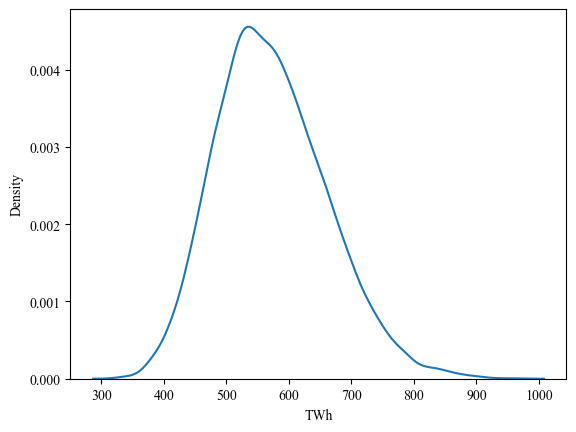

In [145]:
mc_with_cf_df = mc_df.merge(final_cf[['NUTS_ID', 'CF_percent']])
mc_with_cf_df['Installed_capcity_GW'] = mc_with_cf_df['TWh']/(mc_with_cf_df['CF_percent']*8760)*1000

mc_data = mc_with_cf_df.groupby(mc_with_cf_df.outer_sample).agg({'TWh': 'sum', 'Installed_capcity_GW': 'mean'}).reset_index()
print(mc_data.TWh.describe())
sns.kdeplot(data= mc_data, x='TWh')

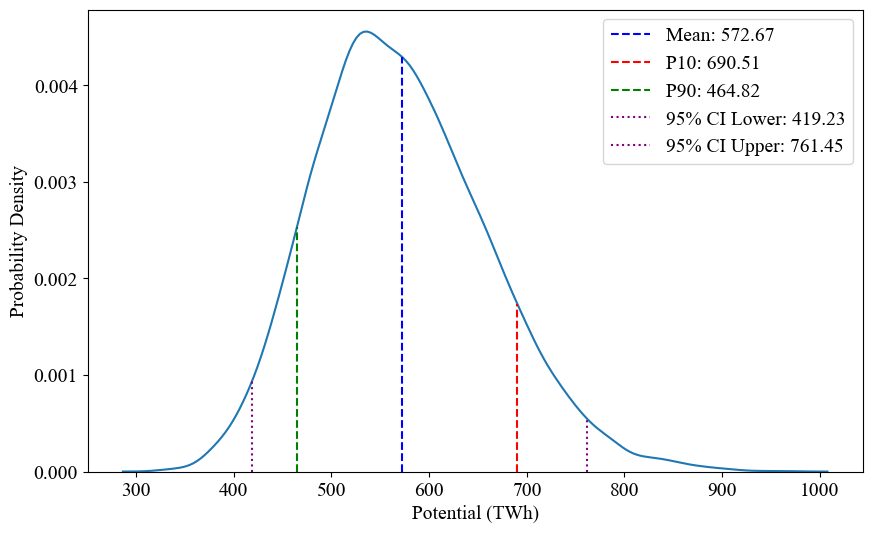

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Generate KDE and extract data
fig, ax = plt.subplots(figsize=(10, 6))
kde_plot = sns.kdeplot(data=mc_data, x='TWh')
line = kde_plot.get_lines()[0]
x_data, y_data = line.get_data()

# Interpolation function
kde_interp = interp1d(x_data, y_data, bounds_error=False, fill_value=0)

# Key stats
mean_val = mc_data['TWh'].mean()
p10_val = np.percentile(mc_data['TWh'], 90)
p90_val = np.percentile(mc_data['TWh'], 10)
ci_lower, ci_upper = np.percentile(mc_data['TWh'], [2.5, 97.5])

# Helper function to draw a vertical line from y=0 to the KDE value
def draw_cut_line(x_val, color, linestyle, label):
    y_val = kde_interp(x_val)
    ax.vlines(x_val, ymin=0, ymax=y_val, color=color, linestyle=linestyle, label=label)

# Draw lines
draw_cut_line(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
draw_cut_line(p10_val, color='red', linestyle='--', label=f'P10: {p10_val:.2f}')
draw_cut_line(p90_val, color='green', linestyle='--', label=f'P90: {p90_val:.2f}')
draw_cut_line(ci_lower, color='purple', linestyle=':', label=f'95% CI Lower: {ci_lower:.2f}')
draw_cut_line(ci_upper, color='purple', linestyle=':', label=f'95% CI Upper: {ci_upper:.2f}')

# Final touches
plt.legend(fontsize=14, loc='upper right')
plt.xlabel("Potential (TWh)", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title("KDE Plot with Vertical Lines Cut at KDE Curve")
plt.grid(False)
plt.show()





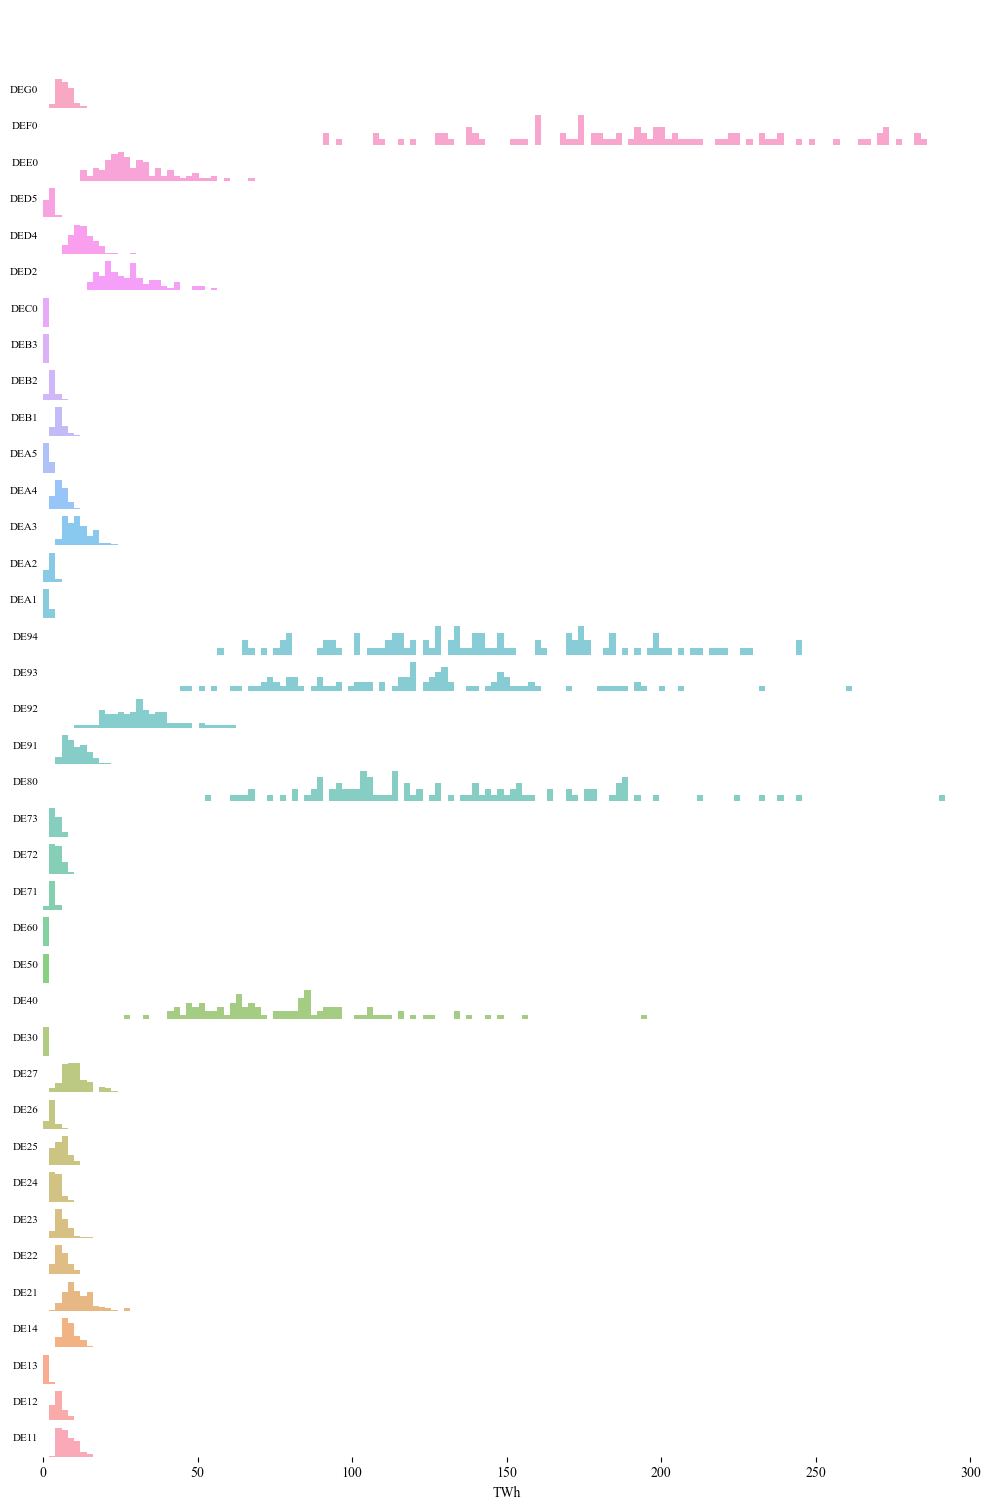

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sort NUTS_IDs (optional: based on median TWh)
nuts_ids = sorted(mc_df['NUTS_ID'].unique())

# Vertical spacing between curves
offset = 5  
fig, ax = plt.subplots(figsize=(10, len(nuts_ids) * 0.4))
colors = sns.color_palette('husl', len(nuts_ids))

bins = np.linspace(0, 300, 150)  # Define bins for histogram

for i, (nuts_id, color) in enumerate(zip(nuts_ids, colors)):
    subset = mc_df[mc_df['NUTS_ID'] == nuts_id]['TWh'].dropna()
    subset = subset[subset <= 300]  # Clip extreme values

    if len(subset) < 2:
        continue  # Skip if not enough data

    counts, bin_edges = np.histogram(subset, bins=bins, density=True)  # density=True to normalize histogram
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Normalize counts for consistent height (optional)
    counts = counts / counts.max() * (offset * 0.8)

    # Offset histogram vertically
    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], bottom=i * offset, color=color, alpha=0.6, align='center', edgecolor='none')

    # Add label on the left
    ax.text(-1.5, i * offset + offset / 2, nuts_id, va='center', ha='right', fontsize=8)

ax.set_xlabel('TWh')
ax.set_yticks([])
ax.set_xlim(0, 300)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()


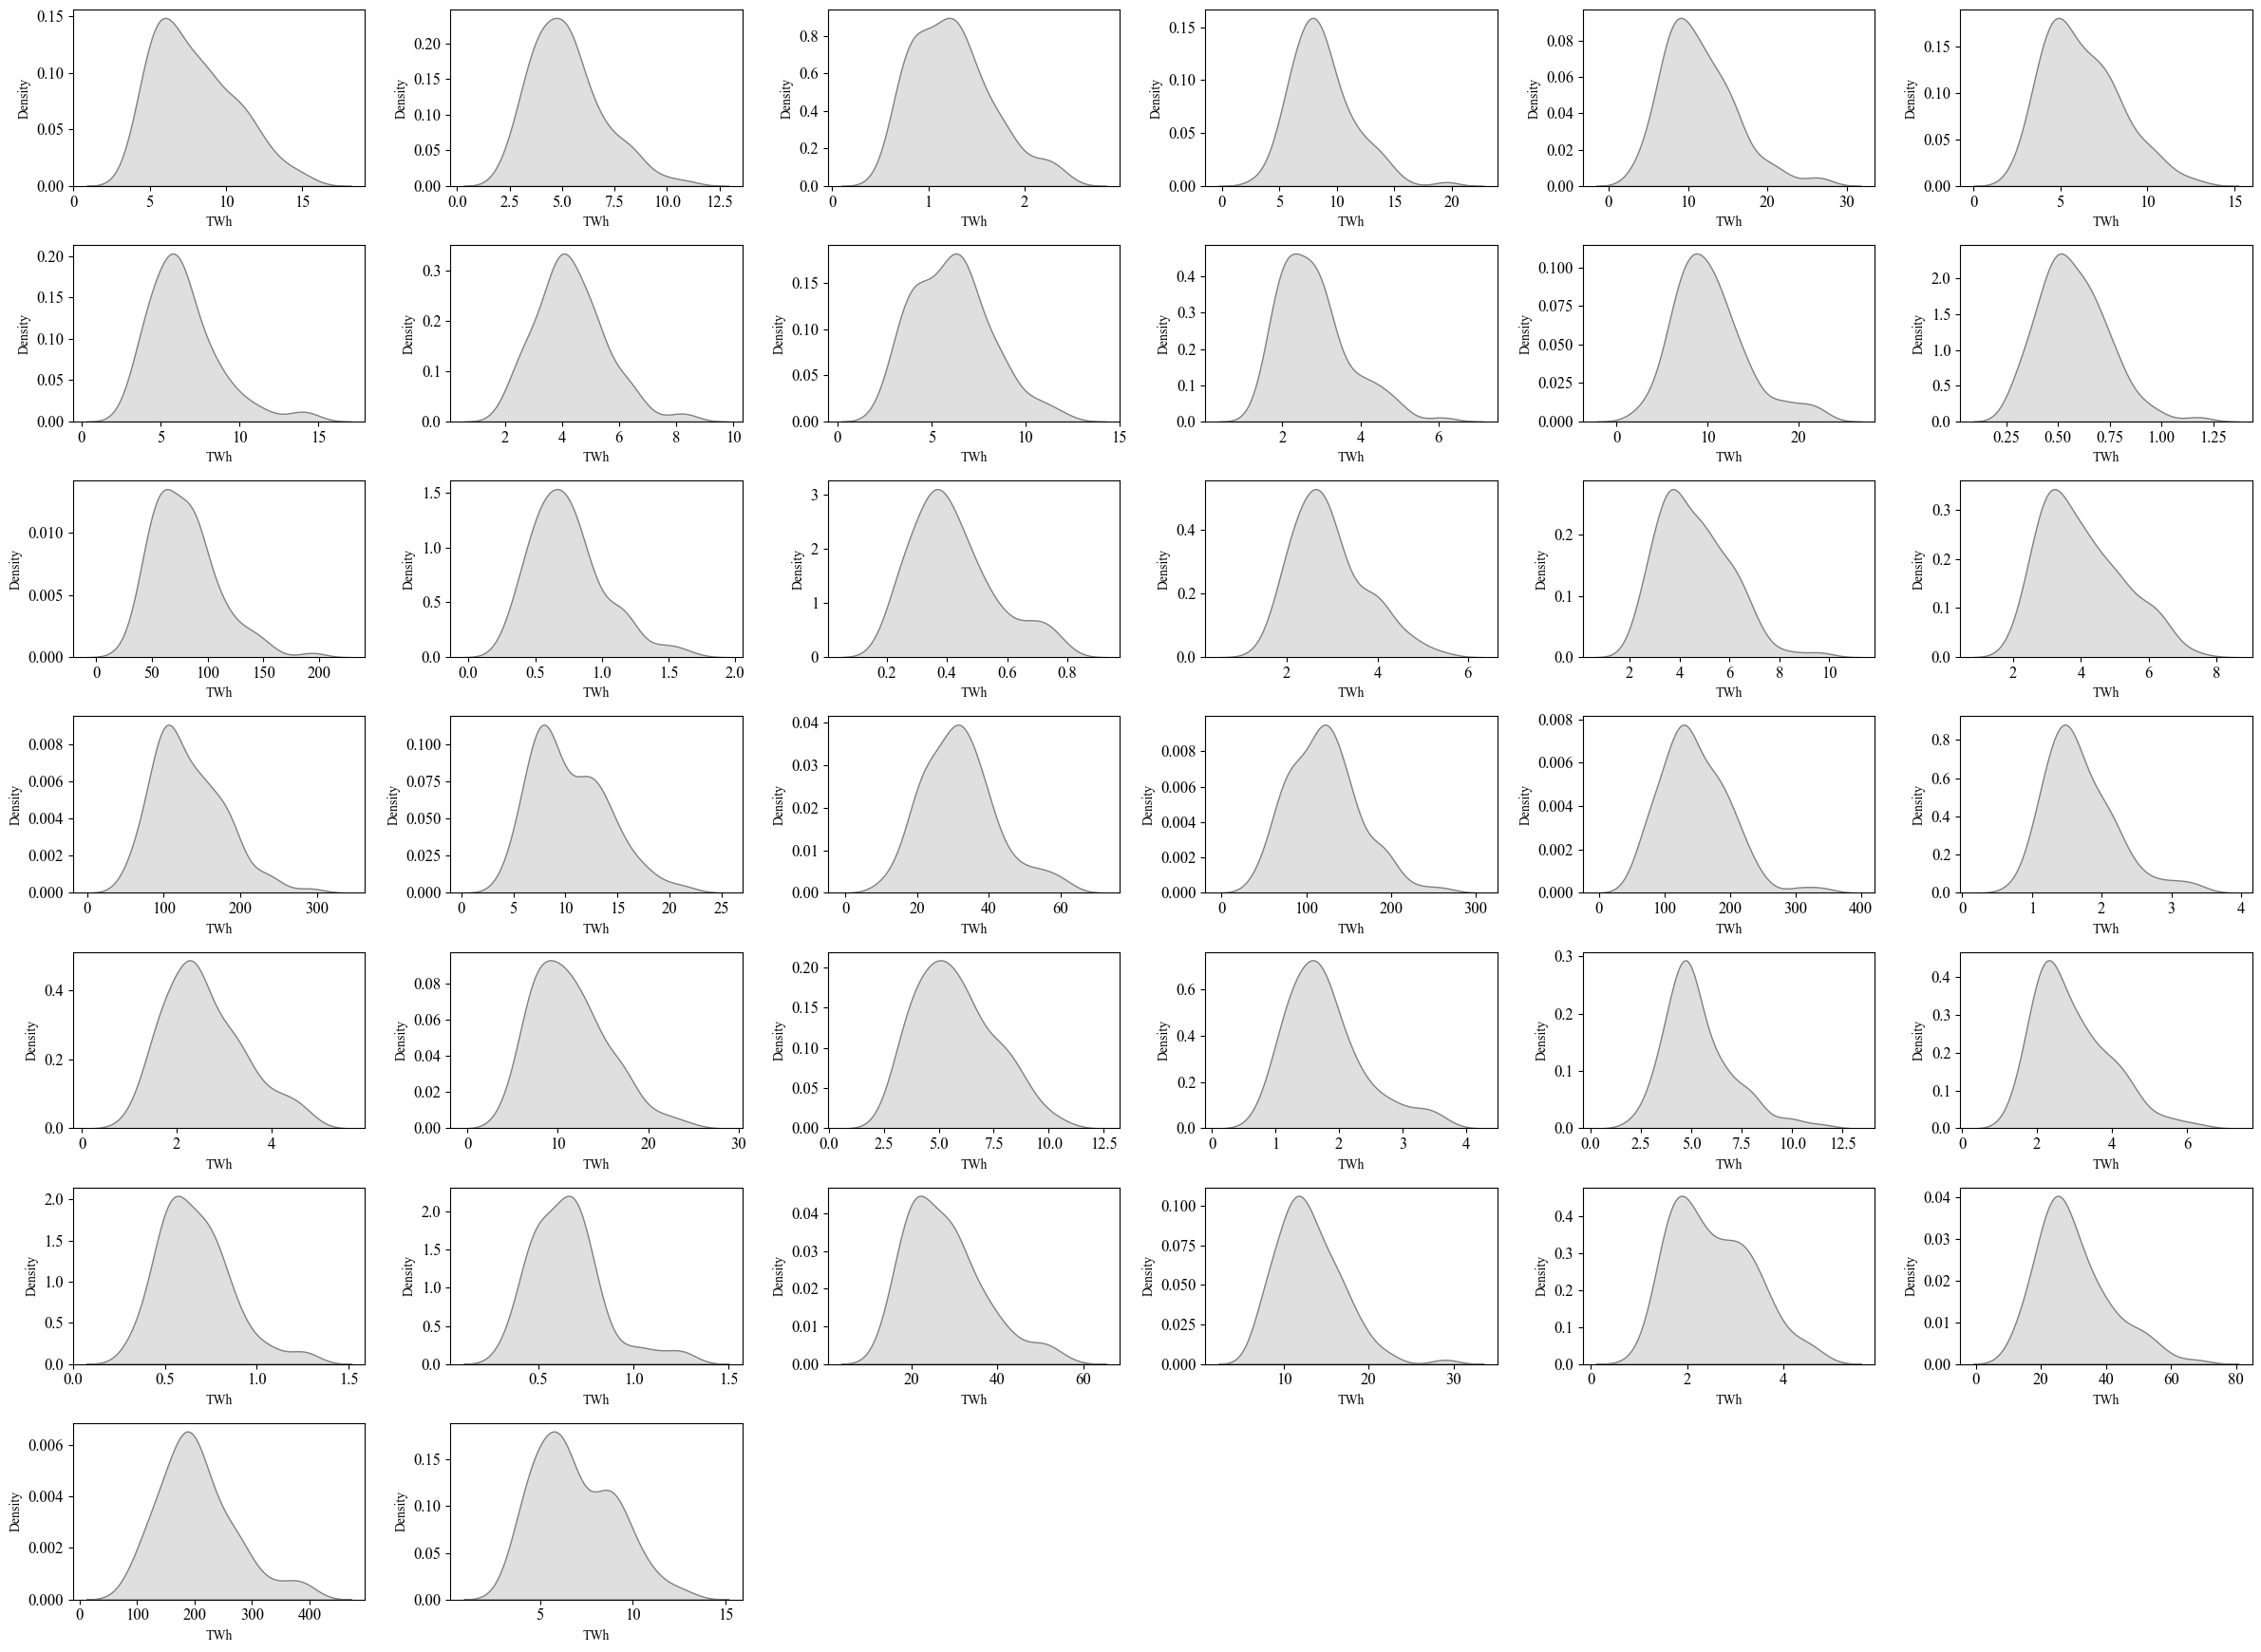

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'

# Prepare data
nuts_ids = sorted(mc_df['NUTS_ID'].unique())
n_cols = 6  # Number of columns
n_rows = int(np.ceil(len(nuts_ids) / n_cols))

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 2.5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create KDE plots for each NUTS_ID
for i, nuts_id in enumerate(nuts_ids):
    subset = mc_df[mc_df['NUTS_ID'] == nuts_id]  # Filter data for current NUTS_ID
    sns.kdeplot(data=subset, x='TWh', ax=axes[i], fill=True, color='grey')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    #axes[i].set_title(nuts_id)
    #axes[i].set_xlabel('TWh')
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

#fig.suptitle('KDEs of TWh by NUTS_ID', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

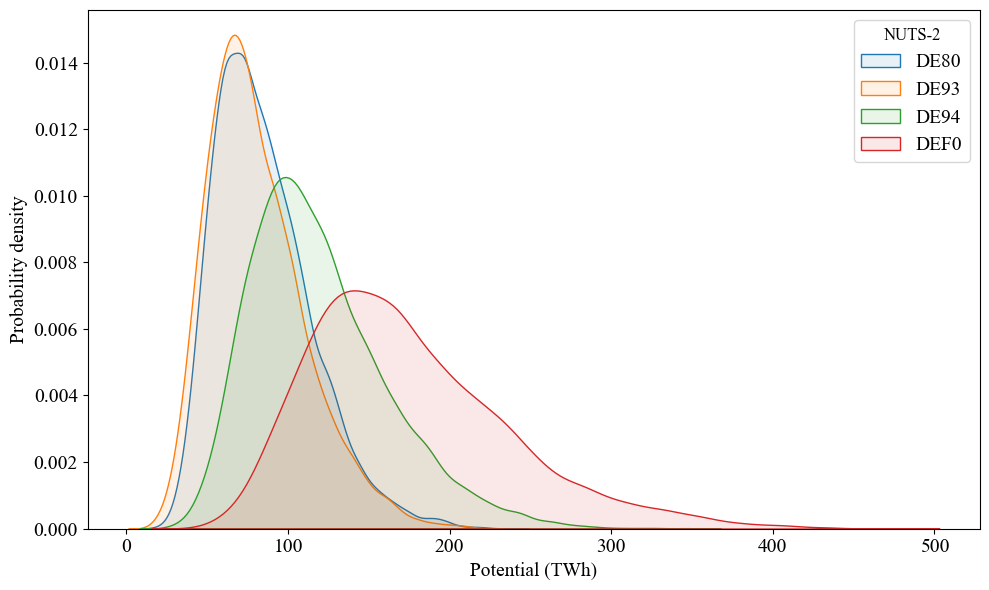

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for desired NUTS_IDs
subset = mc_df[mc_df['NUTS_ID'].str.contains('DE94|DE93|DEF0|DE80', na=False)]

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each NUTS_ID separately and collect line handles
nuts_ids = subset['NUTS_ID'].unique()
handles = []
labels = []

for nuts in nuts_ids:
    data = subset[subset['NUTS_ID'] == nuts]
    line = sns.kdeplot(
        data=data,
        x='TWh',
        ax=ax,
        label=nuts,  # This will attach the label directly
        linewidth=1,
        fill=True,
        alpha=0.1
    )
    # handles and labels are automatically added via `label=nuts`

# Show legend
ax.legend(title='NUTS-2', loc='upper right', fontsize=14, title_fontsize=12)

# Plot labels
#ax.set_title("KDE Plot by NUTS_ID")
ax.set_xlabel("Potential (TWh)", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_ylabel("Probability density", fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()


C:\Users\mun93\AppData\Local\Temp\ipykernel_18812\4242284726.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='NUTS_ID', bbox_to_anchor=(1.05, 1), loc='upper left')


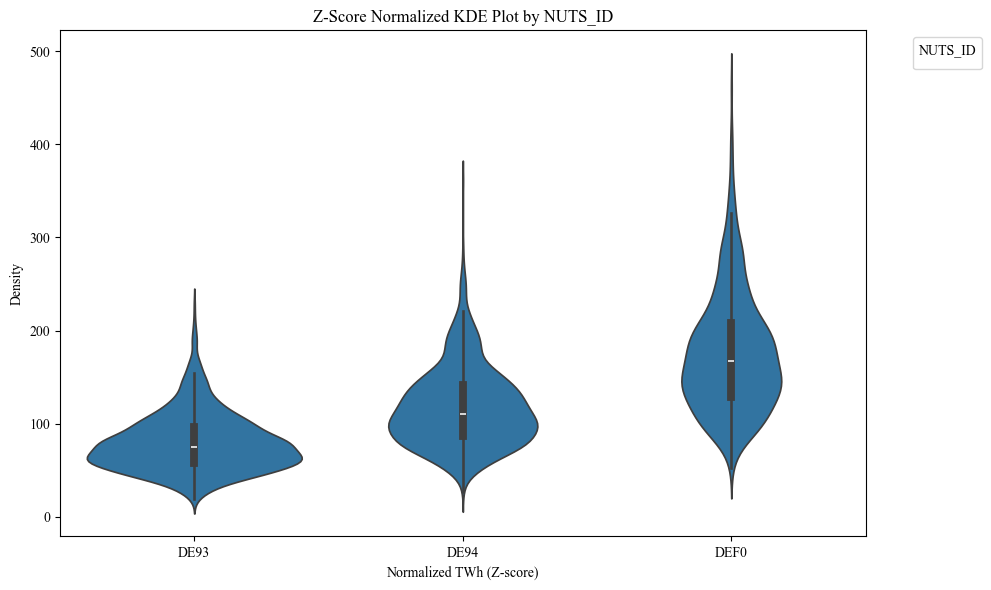

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Step 1: Apply Z-score normalization across all data (global)
mc_df['TWh_zscore'] = zscore(mc_df['TWh'])

# Optional: if you want to normalize **per group** (per NUTS_ID):
mc_df['TWh_zscore'] = mc_df.groupby('NUTS_ID')['TWh'].transform(zscore)

# Step 2: Plot the normalized KDEs
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#sns.kdeplot(data=mc_df, x='TWh_zscore', hue='NUTS_ID', linewidth=0.8)
sns.violinplot(data=mc_df[mc_df.NUTS_ID.str.contains('DE94|DE93|DEF0')], x='NUTS_ID', y='TWh')


# Step 3: Adjust plot
plt.legend(title='NUTS_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Normalized TWh (Z-score)")
plt.ylabel("Density")
plt.title("Z-Score Normalized KDE Plot by NUTS_ID")
plt.grid(False)
plt.tight_layout()
plt.show()


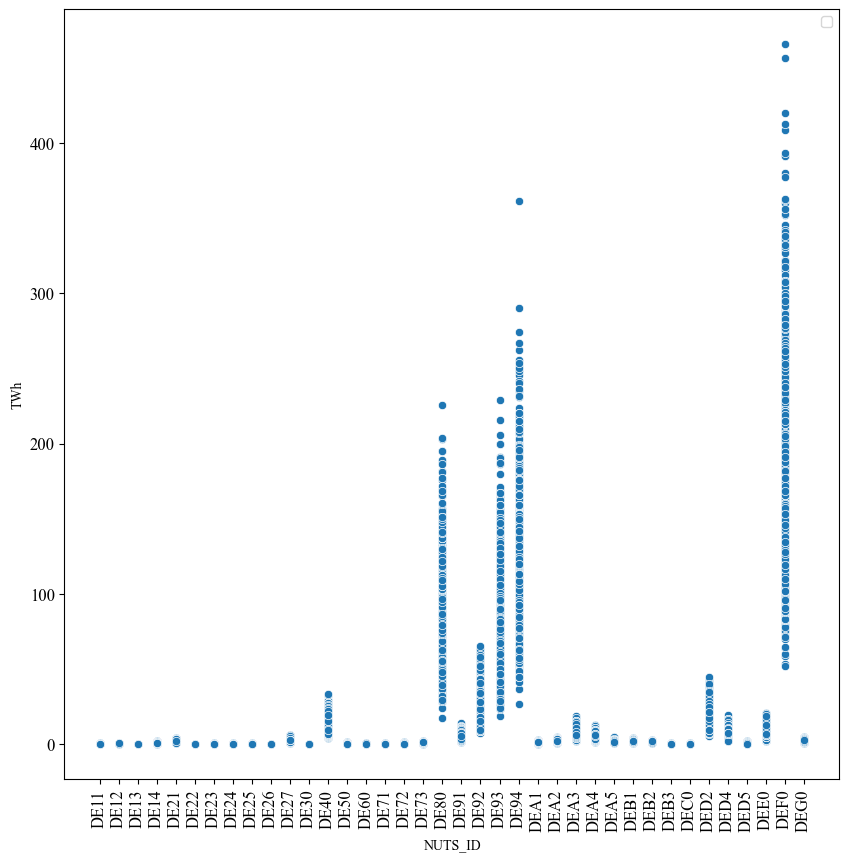

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data= mc_df, x='NUTS_ID', y= 'TWh', linewidth=0.5, )
plt.legend('')
plt.xlim()
plt.xticks(rotation=90, fontsize=12); 
plt.yticks( fontsize=12); 

In [71]:
mc_with_cf_df.head()

NUTS_ID  outer_sample  inner_sample        TWh  CF_percent  \
0    DE11             0             0  12.464260    0.209607   
1    DE11             0             1   6.840367    0.209607   
2    DE11             0             2   9.482469    0.209607   
3    DE11             0             3   8.553336    0.209607   
4    DE11             0             4   5.899041    0.209607   

   Installed_capcity_GW  
0              6.788245  
1              3.725379  
2              5.164312  
3              4.658291  
4              3.212717

## QMC H2

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, beta, triang, qmc, truncnorm
from tqdm import tqdm

# ----------------------
# PARAMETERS
# ----------------------
n_outer = 1000       # outer loop (perturbation samples)
n_inner = 1000      # inner samples per perturbation
seed = 42
np.random.seed(seed)

# ----------------------
# QMC Setup
# ----------------------
sobol_inner = qmc.Sobol(d=1, scramble=True, seed=seed)
qmc_uniforms = sobol_inner.random(n_inner).flatten()


rows = []

for _, row in hist_original_merged.iterrows():
    region = row['NUTS_ID']
    mean_pd = row['mean_power_density']
    shape = row['shape']  # gamma shape (k)
    scale = row['scale']  # gamma scale (θ)
    cv_pd = row['perturbation_factor_scalled']  # ~ std / mean
    valid_area = row['Valid_Area_km2']
    sigma = cv_pd

    for i in range(n_outer):
        epsilon = np.clip(np.random.normal(loc=1.0, scale=sigma), 0.3, 1.7)
        scale_perturbed = scale * epsilon

        # Draw parameter samples
        efficiency_samples = beta.rvs(a=8, b=8, loc=0.32, scale=0.10)
        availability_samples = beta.rvs(a=2, b=5, loc=0.88, scale=0.07)
        spacing_samples = triang.rvs(c=(7 - 5) / (10-5), loc=5, scale=5)
        #electrolyser_efficiency_samples = np.clip(np.random.normal(loc=0.70, scale=0.015), 0.65, 0.75)
        electrolyser_efficiency_samples = truncnorm.rvs((0.65 - 0.75) / 0.03, (0.85 - 0.75) / 0.03, loc=0.75, scale=0.03)

        # Generate inner QMC samples from Gamma distribution
        pd_samples = gamma.ppf(qmc_uniforms, a=shape, scale=scale_perturbed)
        pd_scaled = np.mean(pd_samples * (mean_pd / (shape * scale)))



        # Calculate potential and TWh
        potential = (
            pd_scaled *
            efficiency_samples *
            availability_samples *
            np.pi / (4 * spacing_samples**2)*
            electrolyser_efficiency_samples
        )

        h2_twh = potential * valid_area / 1e6 * 8760  # Convert to TWh/year
        h2_mt = potential * valid_area / 1e6 * 8760 / 39.39  # Convert to TWh/year

        rows.append(
            {
            'NUTS_ID': region,
            'outer_sample': i,
            'h2_TWh': h2_twh,
            'h2_Mt': h2_mt,
            'pd_scaled': pd_scaled,
            'efficiency': efficiency_samples,
            'electrolyser_efficiency': electrolyser_efficiency_samples,
            'availability': availability_samples,
            'spacing': spacing_samples,
            'scale_perturbed': scale_perturbed,
            'epsilon': epsilon
            } ) 
        
    
h2_mc_df = pd.DataFrame(rows)
# Combine results
#mc_df = pd.concat(rows, ignore_index=True)
h2_mc_df.head()


c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\scipy\stats\_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


NUTS_ID  outer_sample    h2_TWh     h2_Mt   pd_scaled  efficiency  \
0    DE11             0  0.017122  0.017122  197.119237    0.379405   
1    DE11             1  0.008150  0.008150  210.102236    0.360991   
2    DE11             2  0.011761  0.011761  161.623570    0.362003   
3    DE11             3  0.009351  0.009351  171.543701    0.367055   
4    DE11             4  0.005977  0.005977  189.845678    0.349211   

   electrolyser_efficiency  availability   spacing  scale_perturbed   epsilon  
0                 0.806208      0.899965  5.453701       258.110219  1.068003  
1                 0.717564      0.918520  7.587075       275.110308  1.138346  
2                 0.798915      0.903929  5.806546       211.631780  0.875686  
3                 0.762569      0.906337  6.608664       224.621315  0.929434  
4                 0.738995      0.916635  8.397210       248.586135  1.028595

## QMC H2 Vectorized approach

In [86]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, beta, triang, qmc, truncnorm
from tqdm import tqdm

n_outer = 10000
n_inner = 1000
seed = 42
np.random.seed(seed)

# QMC
sobol_inner = qmc.Sobol(d=1, scramble=True, seed=seed)
qmc_uniforms = sobol_inner.random(n_inner).flatten()

results = []

for _, row in tqdm(hist_original_merged.iterrows(), total=hist_original_merged.shape[0]):
    region = row['NUTS_ID']
    mean_pd = row['mean_power_density']
    shape = row['shape']
    scale = row['scale']
    cv_pd = row['perturbation_factor_scalled']
    valid_area = row['Valid_Area_km2']
    sigma = cv_pd

    # Vectorized perturbations
    epsilons = np.clip(np.random.normal(loc=1.0, scale=sigma, size=n_outer), 0.3, 1.7)
    scale_perturbed = scale * epsilons

    # Vectorized samples from distributions
    efficiency_samples = beta.rvs(a=8, b=8, loc=0.32, scale=0.10, size=n_outer)
    availability_samples = beta.rvs(a=2, b=5, loc=0.88, scale=0.07, size=n_outer)
    spacing_samples = triang.rvs(c=(7 - 5) / (10 - 5), loc=5, scale=5, size=n_outer)
    electrolyser_efficiency_samples = truncnorm.rvs(
        (0.65 - 0.75) / 0.03, (0.85 - 0.75) / 0.03, loc=0.75, scale=0.03, size=n_outer
    )

    # Generate mean-scaled PD from Gamma
    pd_samples = gamma.ppf(qmc_uniforms[None, :], a=shape, scale=scale_perturbed[:, None])
    pd_scaled = np.mean(pd_samples * (mean_pd / (shape * scale)), axis=1)

    # Calculate potential
    potential = (
        pd_scaled *
        efficiency_samples *
        availability_samples *
        (np.pi / (4 * spacing_samples**2)) *
        electrolyser_efficiency_samples
    )

    h2_twh = potential * valid_area / 1e6 * 8760
    h2_mt = h2_twh / 39.39

    df_region = pd.DataFrame({
        'NUTS_ID': region,
        'outer_sample': np.arange(n_outer),
        'h2_TWh': h2_twh,
        'h2_Mt': h2_mt,
        'pd_scaled': pd_scaled,
        'efficiency': efficiency_samples,
        'electrolyser_efficiency': electrolyser_efficiency_samples,
        'availability': availability_samples,
        'spacing': spacing_samples,
        'scale_perturbed': scale_perturbed,
        'epsilon': epsilons
    })

    results.append(df_region)

# Combine results
h2_mc_df = pd.concat(results, ignore_index=True)


c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\scipy\stats\_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
100%|██████████| 38/38 [1:17:14<00:00, 121.96s/it]


In [172]:
h2_mc_df.to_csv(r'C:\Users\mun93\OneDrive\PhD\Research Proposal\Project_2\h2_mc_df.csv', index=False)
h2_mc_df.head()

NUTS_ID  outer_sample    h2_TWh     h2_Mt   pd_scaled  efficiency  \
0    DE11             0  0.249963  0.006346  197.119237    0.366426   
1    DE11             1  0.415841  0.010557  181.074267    0.363450   
2    DE11             2  0.463013  0.011755  200.934138    0.385425   
3    DE11             3  0.504435  0.012806  223.052725    0.370575   
4    DE11             4  0.463814  0.011775  178.651291    0.376671   

   electrolyser_efficiency  availability   spacing  scale_perturbed   epsilon  
0                 0.721624      0.886140  8.264792       258.110219  1.068003  
1                 0.758681      0.903743  6.333513       237.100748  0.981071  
2                 0.782902      0.900656  6.602959       263.105494  1.088673  
3                 0.751890      0.885658  6.351188       292.067829  1.208512  
4                 0.782462      0.888819  6.107395       233.928075  0.967943

<Axes: >

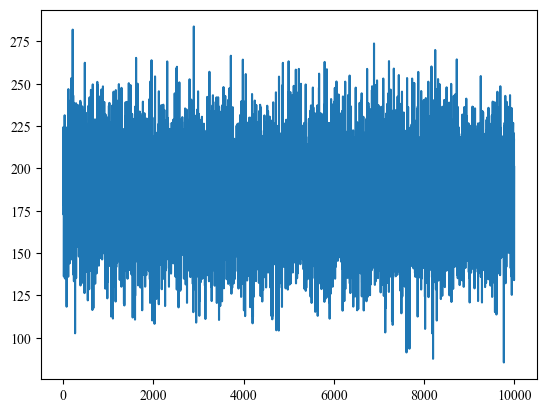

In [87]:
h2_mc_df[h2_mc_df.NUTS_ID == 'DE11'].pd_scaled.plot()

       outer_sample         h2_Mt
count   10000.00000  10000.000000
mean     4999.50000     10.938448
std      2886.89568      1.691443
min         0.00000      5.955577
25%      2499.75000      9.748647
50%      4999.50000     10.802756
75%      7499.25000     11.981430
max      9999.00000     19.359543


<Axes: xlabel='h2_Mt', ylabel='Density'>

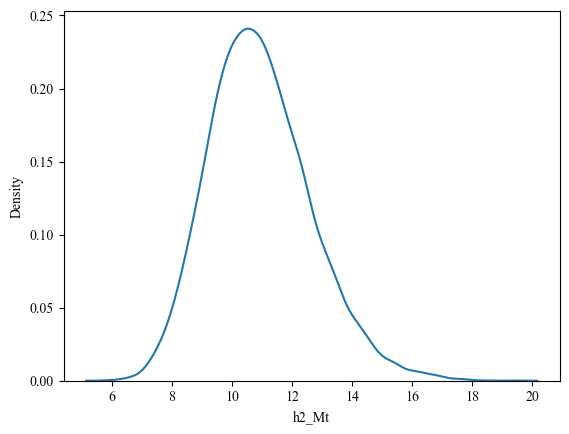

In [147]:
import seaborn as sns
#mc_df[mc_df.NUTS_ID=='DE11'].TWh.describe()
group_per_sdample = h2_mc_df.groupby(['outer_sample']).agg({'h2_Mt': 'sum'}).mul(1/39.39*39.39).reset_index()
print(group_per_sdample.describe())

sns.kdeplot(data = group_per_sdample, x='h2_Mt')

In [92]:
group_per_sdample.h2_Mt.describe()

count    10000.000000
mean        10.938448
std          1.691443
min          5.955577
25%          9.748647
50%         10.802756
75%         11.981430
max         19.359543
Name: h2_Mt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

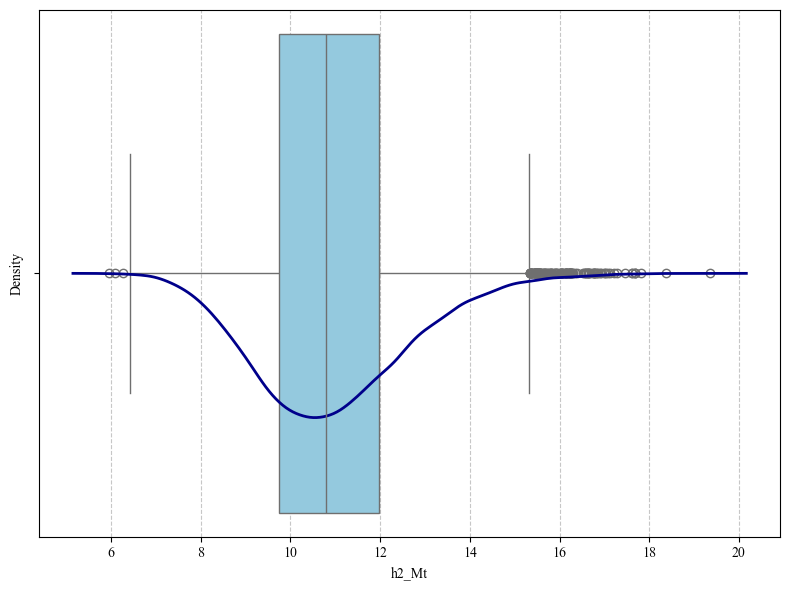

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=group_per_sdample, x='h2_Mt', color='skyblue')
sns.kdeplot(x='h2_Mt', data=group_per_sdample, color='darkblue', linewidth=2)

# Add labels and title
#plt.ylabel("Hydrogen Potential (Mt/year)")
#plt.title("Box Plot of Total Green Hydrogen Potential per Monte Carlo Sample")

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show


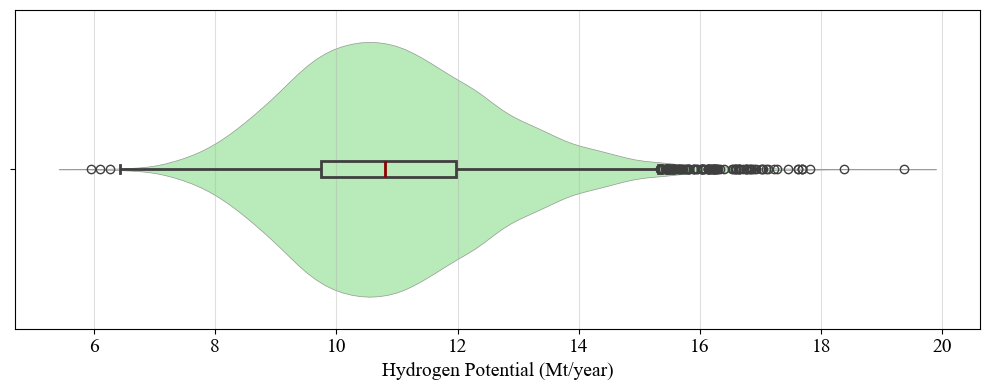

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'
#sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))

# Step 1: Violin plot without inner box
sns.violinplot(
    x='h2_Mt',
    data=group_per_sdample,
    inner=None,
    linewidth=0.5,   # Thin violin outline
    color='lightgreen',
    alpha=0.7,       # Semi-transparent fill
)

# Step 2: Overlay narrow boxplot with thick lines
sns.boxplot(
    x='h2_Mt',
    data=group_per_sdample,
    width=0.05,       # Very narrow box
    linewidth=2,      # Thick box outline
    showcaps=True,
    boxprops={'facecolor':'none'},  # Transparent box fill
    whiskerprops={'linewidth': 2},
    capprops={'linewidth': 2},
    medianprops={'linewidth': 2, 'color': 'darkred'}
)

# Title and label
#plt.title("Violin Plot with Highlighted Box – Green Hydrogen Potential", fontsize=14)
plt.xlabel("Hydrogen Potential (Mt/year)", fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis='x', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()






In [80]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Group by NUTS_ID
grouped = h2_mc_df.groupby('NUTS_ID')['h2_Mt']

# Create summary DataFrame
h2_summary_stats = grouped.agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    q25=lambda x: np.percentile(x, 25),
    median='median',
    q75=lambda x: np.percentile(x, 75),
    p10=lambda x: np.percentile(x, 10),
    p90=lambda x: np.percentile(x, 90),
    max='max'
)

# Coefficient of variation
h2_summary_stats['cv'] = h2_summary_stats['std'] / h2_summary_stats['mean']

# 95% confidence interval assuming normality
h2_summary_stats['ci_lower'] = h2_summary_stats['mean'] - 1.96 * (h2_summary_stats['std'] / np.sqrt(h2_summary_stats['count']))
h2_summary_stats['ci_upper'] = h2_summary_stats['mean'] + 1.96 * (h2_summary_stats['std'] / np.sqrt(h2_summary_stats['count']))

# Round for readability
h2_summary_stats = h2_summary_stats.round(3)

# Display
h2_summary_stats.sort_values(by='mean', ascending=False).reset_index(drop=False)

NUTS_ID  count   mean    std    min    q25  median    q75    p10    p90  \
0     DEF0   1000  3.291  1.133  0.905  2.446   3.146  3.938  1.977  4.860   
1     DE94   1000  2.302  0.801  0.520  1.716   2.216  2.759  1.392  3.278   
2     DE80   1000  1.621  0.589  0.429  1.189   1.524  1.956  0.956  2.429   
3     DE93   1000  1.537  0.603  0.303  1.105   1.449  1.836  0.871  2.342   
4     DE92   1000  0.507  0.192  0.134  0.372   0.481  0.605  0.293  0.757   
5     DED2   1000  0.330  0.120  0.098  0.242   0.313  0.394  0.191  0.495   
6     DE40   1000  0.252  0.087  0.059  0.187   0.241  0.298  0.154  0.369   
7     DEE0   1000  0.148  0.053  0.027  0.109   0.140  0.176  0.091  0.217   
8     DED4   1000  0.148  0.053  0.040  0.109   0.138  0.176  0.089  0.221   
9     DEA3   1000  0.147  0.050  0.049  0.110   0.139  0.174  0.089  0.217   
10    DE91   1000  0.103  0.038  0.021  0.076   0.095  0.122  0.061  0.156   
11    DEA4   1000  0.098  0.035  0.029  0.071   0.094  0.118  0.059  0.145   
12    DE27   1000  0.052  0.018  0.017  0.039   0.049  0.063  0.032  0.077   
13    DEG0   1000  0.044  0.013  0.020  0.034   0.042  0.051  0.028  0.062   
14    DEA2   1000  0.038  0.013  0.013  0.029   0.036  0.046  0.024  0.055   
15    DEA5   1000  0.036  0.012  0.014  0.027   0.034  0.043  0.022  0.053   
16    DEB1   1000  0.036  0.012  0.013  0.027   0.034  0.043  0.022  0.053   
17    DE21   1000  0.032  0.012  0.006  0.024   0.030  0.038  0.019  0.047   
18    DEB2   1000  0.025  0.008  0.010  0.019   0.023  0.029  0.016  0.035   
19    DEA1   1000  0.024  0.008  0.007  0.018   0.023  0.028  0.015  0.035   
20    DE73   1000  0.019  0.006  0.009  0.015   0.018  0.022  0.012  0.027   
21    DE14   1000  0.018  0.006  0.005  0.014   0.018  0.022  0.011  0.027   
22    DED5   1000  0.018  0.005  0.006  0.014   0.017  0.021  0.011  0.025   
23    DE72   1000  0.014  0.004  0.006  0.011   0.013  0.017  0.009  0.020   
24    DE50   1000  0.011  0.004  0.003  0.008   0.010  0.013  0.006  0.016   
25    DE11   1000  0.009  0.003  0.003  0.006   0.008  0.010  0.005  0.012   
26    DE24   1000  0.008  0.002  0.003  0.006   0.007  0.009  0.005  0.011   
27    DE12   1000  0.007  0.002  0.003  0.005   0.006  0.008  0.004  0.010   
28    DE25   1000  0.007  0.003  0.002  0.005   0.007  0.009  0.005  0.011   
29    DEC0   1000  0.006  0.002  0.003  0.004   0.005  0.007  0.004  0.008   
30    DE23   1000  0.006  0.002  0.003  0.005   0.006  0.008  0.004  0.009   
31    DE71   1000  0.006  0.002  0.003  0.005   0.006  0.007  0.004  0.009   
32    DEB3   1000  0.005  0.002  0.003  0.004   0.005  0.006  0.003  0.008   
33    DE60   1000  0.005  0.002  0.002  0.004   0.005  0.006  0.003  0.008   
34    DE30   1000  0.004  0.001  0.002  0.003   0.004  0.004  0.002  0.005   
35    DE22   1000  0.003  0.001  0.001  0.002   0.003  0.003  0.002  0.004   
36    DE26   1000  0.003  0.001  0.001  0.003   0.003  0.004  0.002  0.005   
37    DE13   1000  0.002  0.001  0.001  0.002   0.002  0.003  0.001  0.003   

      max     cv  ci_lower  ci_upper  
0   7.780  0.344     3.221     3.361  
1   5.772  0.348     2.253     2.352  
2   4.134  0.363     1.585     1.658  
3   4.814  0.392     1.499     1.574  
4   1.500  0.379     0.495     0.519  
5   0.824  0.364     0.323     0.337  
6   0.599  0.346     0.247     0.258  
7   0.367  0.359     0.144     0.151  
8   0.373  0.357     0.144     0.151  
9   0.323  0.342     0.143     0.150  
10  0.281  0.371     0.100     0.105  
11  0.279  0.358     0.096     0.100  
12  0.124  0.342     0.051     0.054  
13  0.100  0.307     0.043     0.044  
14  0.091  0.330     0.037     0.039  
15  0.084  0.328     0.035     0.037  
16  0.078  0.333     0.035     0.037  
17  0.091  0.371     0.031     0.033  
18  0.054  0.308     0.024     0.025  
19  0.058  0.340     0.023     0.024  
20  0.041  0.305     0.019     0.019  
21  0.045  0.344     0.018     0.019  
22  0.041  0.313     0.017     0.018  
23  0.030  0.303     0.0

In [85]:
print(h2_summary_stats.mean().mean())

77.1950809716599


## Sensi Analysis

In [35]:
from scipy.stats import spearmanr

# Example: calculate for one region
region_df = mc_df[mc_df['NUTS_ID'] == 'DE11']
twh = region_df['TWh'].values

# Correlate inputs with output
corrs = {
    'efficiency': spearmanr(efficiency_samples, twh).correlation,
    'availability': spearmanr(availability_samples, twh).correlation,
    #'rotor_diameter': spearmanr(rotor_diameter_samples, twh).correlation,
    'spacing': spearmanr(spacing_samples, twh).correlation,
    #'rotor_area': spearmanr(rotor_area_samples, twh).correlation,
    'power_density': spearmanr(mc_results['DE11'], twh).correlation
}
corrs


{'efficiency': np.float64(0.09551418123499802),
 'availability': np.float64(0.036326585227403174),
 'spacing': np.float64(-0.8915502150221664),
 'power_density': np.float64(0.40975120238754487)}

In [31]:
pip install SALib

   ---------------------------------------- 0.0/778.9 kB ? eta -:--:--
   --------------------------------------- 778.9/778.9 kB 16.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm

# --- CONFIGURE PROBLEM (names match SALib format) ---
problem = {
    'num_vars': 4,
    'names': ['efficiency', 'availability', 'spacing', 'power_density'],
    'bounds': [
        [0.32, 0.42],   # efficiency
        [0.88, 0.96],   # availability
        [5.0, 10.0],    # spacing
        [0.0, 1.5]      # Placeholder; we'll update per region
    ]
}

# --- FUNCTION: Evaluate Model ---
def twh_model(X, valid_area):
    eff = X[:, 0]
    avail = X[:, 1]
    spacing = X[:, 2]
    pd = X[:, 3]

    potential = pd * eff * avail * np.pi / (4 * spacing ** 2)
    twh = potential * valid_area / 1e6 * 8760
    return twh

# --- FUNCTION: Per-Region Sensitivity Analysis ---
def sobol_region(region, gwa, std, mean, valid_area, n_base_samples=1024):
    # Set power density bounds dynamically
    lower = gwa * (1 - 3 * std / mean)
    upper = gwa * (1 + 3 * std / mean)
    problem['bounds'][3] = [lower, upper]

    # Generate Saltelli samples
    param_values = saltelli.sample(problem, n_base_samples, calc_second_order=False)

    # Replace 4th column (PD) with normal samples
    pd_samples = np.random.normal(loc=gwa, scale=std * gwa / mean, size=param_values.shape[0])
    X = param_values.copy()
    X[:, 3] = pd_samples

    # Evaluate model
    Y = twh_model(X, valid_area)

    # Analyze
    indices = sobol.analyze(problem, Y, calc_second_order=False)
    return indices['S1'], indices['ST']

# --- LOOP: Apply to all regions ---
results = []

for _, row in tqdm(hist_gwa_df.iterrows(), total=len(hist_gwa_df), desc="Running Sobol"):
    region = row['NUTS_ID']
    gwa = row['mean_power_density']
    std = row['std']
    mean = row['mean']

    if pd.isna(gwa) or pd.isna(std) or pd.isna(mean):
        continue

    valid_area_row = area_df.loc[area_df['NUTS_ID'] == region, 'Valid_Area_km2']
    if valid_area_row.empty:
        continue
    valid_area = valid_area_row.values[0]

    s1, st = sobol_region(region, gwa, std, mean, valid_area)

    results.append({
        'NUTS_ID': region,
        'S1_efficiency': s1[0],
        'S1_availability': s1[1],
        'S1_spacing': s1[2],
        'S1_power_density': s1[3],
        'ST_efficiency': st[0],
        'ST_availability': st[1],
        'ST_spacing': st[2],
        'ST_power_density': st[3],
    })

# --- COLLECT RESULTS ---
sensitivity_df = pd.DataFrame(results)


Running Sobol:   0%|          | 0/38 [00:00<?, ?it/s]C:\Users\mun93\AppData\Local\Temp\ipykernel_36172\1813704482.py:38: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, n_base_samples, calc_second_order=False)
Running Sobol: 100%|██████████| 38/38 [00:03<00:00, 12.56it/s]


In [43]:
sensitivity_df

NUTS_ID  S1_efficiency  S1_availability  S1_spacing  S1_power_density  \
0     DE11       0.023218         0.006476    0.831147         -0.005141   
1     DE12       0.036675         0.015095    0.862046          0.018689   
2     DE13       0.017543         0.013351    0.820951          0.003651   
3     DE14       0.017008        -0.002095    0.873355         -0.003015   
4     DE21       0.043584         0.021405    0.844756         -0.000470   
5     DE22      -0.004682         0.005964    0.800271         -0.020509   
6     DE23       0.048222         0.023457    0.871877          0.013495   
7     DE24       0.020523         0.013506    0.867713          0.025617   
8     DE25       0.028447         0.011753    0.836869          0.009775   
9     DE26       0.020903         0.002562    0.833088         -0.000253   
10    DE27       0.013920        -0.004164    0.771372          0.015258   
11    DE30       0.015090         0.015753    0.879710         -0.004063   
12    DE40       0.037365         0.019893    0.861560          0.001630   
13    DE50       0.016189         0.012984    0.883769         -0.011449   
14    DE60       0.026794         0.026340    0.925619          0.003460   
15    DE71       0.021094         0.017197    0.854360         -0.000415   
16    DE72       0.044124         0.019470    0.851897         -0.001060   
17    DE73       0.016098         0.024822    0.848874          0.016348   
18    DE80       0.030896         0.005067    0.867551         -0.012735   
19    DE91       0.025195        -0.001397    0.865698         -0.006168   
20    DE92       0.039909        -0.002962    0.852406         -0.006320   
21    DE93       0.028319         0.006652    0.875230         -0.003338   
22    DE94       0.021228         0.002478    0.890678         -0.024340   
23    DEA1       0.021430         0.023853    0.887612          0.020257   
24    DEA2       0.003529         0.004980    0.858666         -0.005251   
25    DEA3       0.041632         0.008828    0.863685          0.003052   
26    DEA4       0.022810         0.014977    0.876410          0.002547   
27    DEA5       0.000191         0.005046    0.890756         -0.016734   
28    DEB1       0.032296         0.006046    0.872615         -0.013216   
29    DEB2      -0.008270        -0.001943    0.834636         -0.031196   
30    DEB3       0.037181         0.023143    0.807777          0.003625   
31    DEC0       0.021715        -0.002406    0.852280         -0.020551   
32    DED2       0.032717         0.020085    0.891457          0.009602   
33    DED4       0.010108        -0.006295    0.837612         -0.009460   
34    DED5       0.023223         0.017578    0.839657         -0.022178   
35    DEE0       0.028238         0.015861    0.866151         -0.011442   
36    DEF0       0.030754         0.006184    0.862045          0.009077   
37    DEG0       0.018225         0.004424    0.832563         -0.010581   

    ST_efficiency  ST_availability  ST_spacing  ST_power_density  
0        0.126741         0.123882    0.928407          0.118324  
1        0.150513         0.126148    0.959710          0.118846  
2        0.184836         0.157506    0.991435          0.157120  
3        0.173159         0.155618    0.977916          0.146676  
4        0.169244         0.163422    0.948871          0.134724  
5        0.149783         0.134249    0.885852          0.115725  
6        0.136552         0.134501    0.989179          0.105561  
7        0.113460         0.109844    0.940391          0.087179  
8        0.138391         0.109628    0.950315          0.107452  
9        0.133785         0.119784    0.968869          0.111028  
10       0.163088         0.150820    0.968114          0.131949  
11       0.108983         0.088060    0.962404          0.071973  
12       0.101108         0.092749    0.941765          0.079172  
13       0.111367         0.090328    0.985260          0.078602  
14       0.096094         0.07885

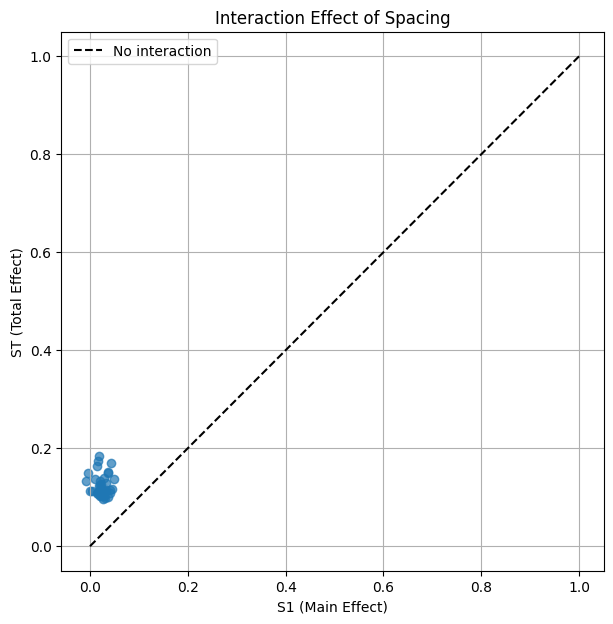

C:\Users\mun93\AppData\Local\Temp\ipykernel_36172\2866891688.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="S1_power_density", y="NUTS_ID", data=top_pd, palette="viridis")


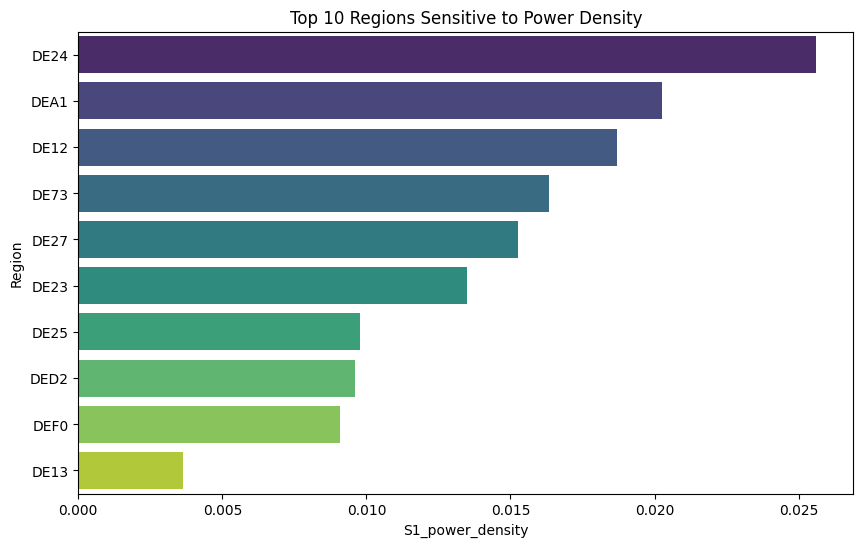

In [58]:
plt.figure(figsize=(7, 7))
plt.scatter(sensitivity_df['S1_efficiency'], sensitivity_df['ST_efficiency'], alpha=0.7)
plt.plot([0, 1], [0, 1], 'k--', label="No interaction")
plt.xlabel("S1 (Main Effect)")
plt.ylabel("ST (Total Effect)")
plt.title("Interaction Effect of Spacing")
plt.legend()

# plt.xlim(0.7, 1)
# plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

top_pd = sensitivity_df.sort_values(by="S1_power_density", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="S1_power_density", y="NUTS_ID", data=top_pd, palette="viridis")
plt.title("Top 10 Regions Sensitive to Power Density")

plt.ylabel("Region")
plt.show()



In [41]:
sobol_indices = sobol.analyze(problem, Y, calc_second_order=False)

# First-order effects
print("S1:", sobol_indices['S1'])

# Total effects (including interactions)
print("ST:", sobol_indices['ST'])


S1: [ 0.01465442  0.00982815  0.83312072 -0.01155479]
ST: [0.14454936 0.11205061 0.95844245 0.11314012]


c:\Users\mun93\anaconda3\envs\climate-env\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


## Sensi

In [377]:
!pip install SALib

  Using cached salib-1.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached multiprocess-0.70.18-py311-none-any.whl.metadata (7.5 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
Using cached salib-1.5.1-py3-none-any.whl (778 kB)
Using cached multiprocess-0.70.18-py311-none-any.whl (144 kB)
Using cached dill-0.4.0-py3-none-any.whl (119 kB)


C:\Users\mun93\AppData\Local\Temp\ipykernel_30260\3288792657.py:25: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N, calc_second_order=False)
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10000) is equal to `2^n`.
        
  warnings.warn(msg)
c:\Users\mun93\anaconda3\envs\conda_grib_env\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                               ST   ST_conf
WTG efficiency           0.032942  0.001282
Availability             0.002656  0.000091
Spacing                  0.776001  0.020882
Electrolyser_efficiency  0.032053  0.001098
Weather_variability      0.194623  0.006384
                               S1   S1_conf
WTG efficiency           0.026458  0.004992
Availability             0.002196  0.001530
Spacing                  0.740088  0.027104
Electrolyser_efficiency  0.026332  0.004645
Weather_variability      0.163971  0.012390


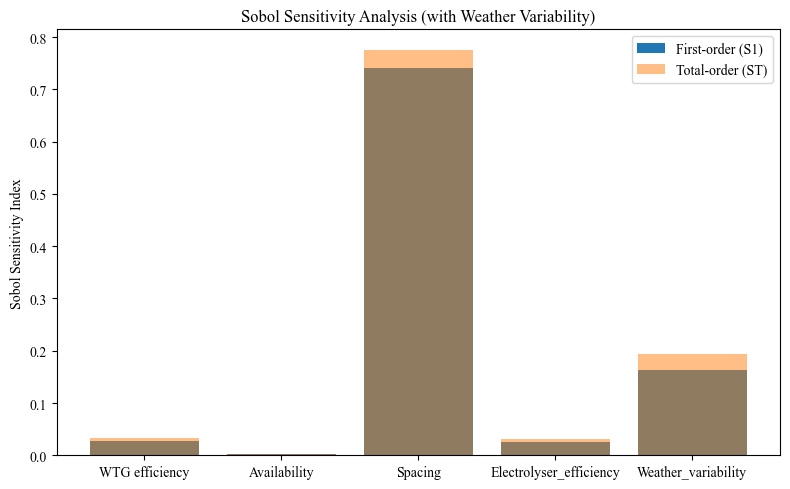

In [135]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Define the problem
# --------------------------
problem = {
    'num_vars': 5,
    'names': ['WTG efficiency', 'Availability', 'Spacing', 'Electrolyser_efficiency', 'Weather_variability'],
    'bounds': [
        [0.32, 0.42],     # WTG efficiency (beta approx.)
        [0.88, 0.95],     # availability (beta approx.)
        [5.0, 10.0],      # spacing (triangular: 5–10, mode=7)
        [0.65, 0.85],     # electrolyser efficiency (normal approx.)
        [0.7, 1.4]        # wind variability (weather factor ~ epsilon)
    ]
}

# --------------------------
# 2. Generate Saltelli samples
# --------------------------
N = 10000  # base sample size
param_values = saltelli.sample(problem, N, calc_second_order=False)

# --------------------------
# 3. Define the model
# --------------------------
# Replace with actual region-specific mean power density and area
mean_pd = 275  # Example: mean power density in W/m²
valid_area = 25402.83 # Example: valid area in km²

def h2_model(params):
    efficiency, availability, spacing, electrolyser_efficiency, wind_factor = params
    
    pd_scaled = mean_pd * wind_factor  # apply weather variability
    power_density = (
        pd_scaled * efficiency * availability * np.pi / (4 * spacing ** 2) * electrolyser_efficiency
    )
    h2_twh = power_density * valid_area / 1e6 * 8760 /39.39 # Convert to TWh/year
    return h2_twh

# --------------------------
# 4. Run the model
# --------------------------
Y = np.array([h2_model(x) for x in param_values])

# --------------------------
# 5. Perform Sobol sensitivity analysis
# --------------------------
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)

# --------------------------
# 6. Plot Sobol Indices
# --------------------------
s1 = Si['S1']
st = Si['ST']
labels = problem['names']

plt.figure(figsize=(8, 5))
plt.bar(labels, s1, label='First-order (S1)')
plt.bar(labels, st, alpha=0.5, label='Total-order (ST)')
plt.ylabel('Sobol Sensitivity Index')
plt.title('Sobol Sensitivity Analysis (with Weather Variability)')
plt.legend()
plt.tight_layout()
plt.show()



In [19]:
s1

array([0.02871593, 0.00265958, 0.75439213, 0.00773467, 0.16720943])

C:\Users\mun93\AppData\Local\Temp\ipykernel_30260\3780387253.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Parameter', x='H2_TWh', data=df_box, palette='Set2')


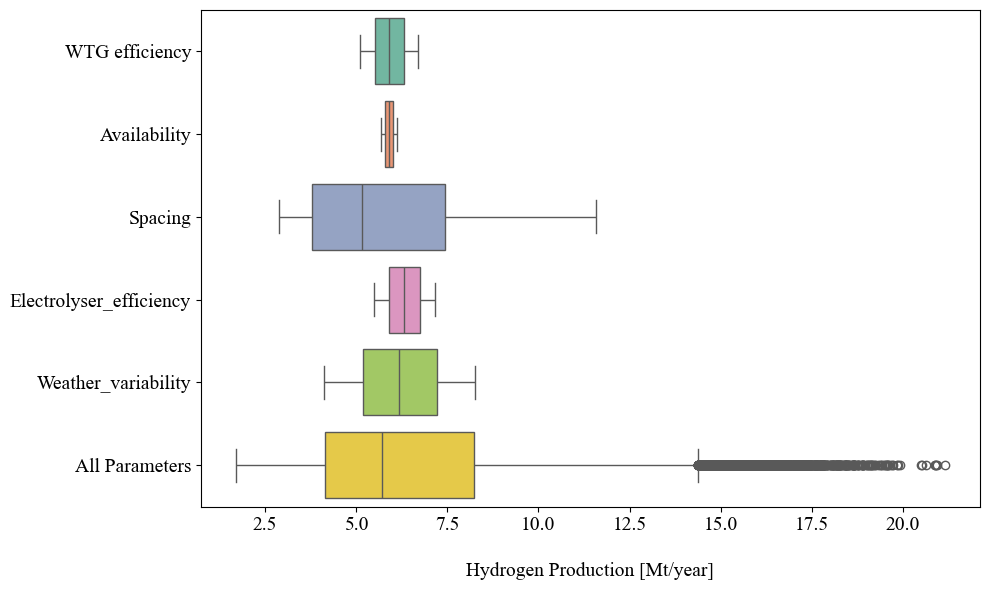

In [136]:
import seaborn as sns
import pandas as pd

plt.rcParams['font.family'] = 'Times New Roman'

# Number of samples per individual parameter variation
n_samples = 10000

# Base (fixed) values for all parameters
base_values = {
    'WTG efficiency': 0.37,
    'Availability': 0.915,
    'Spacing': 7.0,
    'Electrolyser_efficiency': 0.70,
    'Weather_variability': 1.0
}

# Function to generate a distribution for one parameter while fixing the others
def vary_one_param(param_name, bounds):
    low, high = bounds
    samples = np.random.uniform(low, high, n_samples)
    outputs = []

    for val in samples:
        params = [base_values[name] if name != param_name else val for name in problem['names']]
        output = h2_model(params)
        outputs.append(output)

    return outputs

# Collect data for boxplot
results = []
for i, name in enumerate(problem['names']):
    outputs = vary_one_param(name, problem['bounds'][i])
    for y in outputs:
        results.append({'Parameter': name, 'H2_TWh': y})

# Include total variation (all params varied together, i.e. Y from Saltelli)
for y_val in Y:
    results.append({'Parameter': 'All Parameters', 'H2_TWh': y_val})

# Convert to DataFrame
df_box = pd.DataFrame(results)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y='Parameter', x='H2_TWh', data=df_box, palette='Set2')
#plt.title('Effect of Individual Parameter Variation on H₂ Output (TWh)')
#plt.ylabel('Hydrogen Production [TWh/year]')
plt.xlabel('Hydrogen Production [Mt/year]', fontsize=14, labelpad=20)
plt.ylabel('')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.grid(False)
plt.show()


In [114]:

import pandas as pd
import numpy as np
from scipy.stats import norm

# Group by NUTS_ID
grouped = df_box.groupby('Parameter')['H2_TWh']

# Create summary DataFrame
summary_stats = grouped.agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    q25=lambda x: np.percentile(x, 25),
    median='median',
    q75=lambda x: np.percentile(x, 75),
    p10=lambda x: np.percentile(x, 10),
    p90=lambda x: np.percentile(x, 90),
    max='max'
)

# Coefficient of variation
summary_stats['cv'] = summary_stats['std'] / summary_stats['mean']

# 95% confidence interval assuming normality
summary_stats['ci_lower'] = summary_stats['mean'] - 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))
summary_stats['ci_upper'] = summary_stats['mean'] + 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))

# Round for readability
summary_stats = summary_stats.round(3)

# Display
summary_stats.sort_values(by='mean', ascending=False).reset_index(drop=False)


Parameter  count    mean    std    min     q25  median  \
0           All Parameters  70000  11.203  5.315  2.955   7.133   9.834   
1  Electrolyser_efficiency  10000  10.882  0.841  9.436  10.150  10.886   
2      Weather_variability  10000  10.660  2.024  7.113   8.943  10.624   
3             Availability  10000  10.162  0.224  9.773   9.970  10.161   
4           WTG efficiency  10000  10.162  0.792  8.788   9.478  10.171   
5                  Spacing  10000   9.958  4.055  4.979   6.531   8.856   

      q75    p10     p90     max     cv  ci_lower  ci_upper  
0  14.183  5.605  18.937  36.389  0.474    11.164    11.243  
1  11.606  9.721  12.056  12.338  0.077    10.866    10.899  
2  12.357  7.863  13.505  14.225  0.190    10.621    10.700  
3  10.358  9.851  10.469  10.550  0.022    10.157    10.166  
4  10.847  9.060  11.254  11.534  0.078    10.147    10.178  
5  12.749  5.520  16.443  19.910  0.407     9.879    10.038

In [159]:
print(h2_mc_df[h2_mc_df['NUTS_ID'] == 'DE94'].scale_perturbed.describe())

count    10000.000000
mean       353.961557
std         73.796599
min        106.185372
25%        304.141391
50%        354.299189
75%        404.481399
max        601.717106
Name: scale_perturbed, dtype: float64


## scenario aggregation

In [160]:
main_qmc_h2_results = h2_mc_df[h2_mc_df['NUTS_ID'] == 'DE94'].groupby('outer_sample').agg({
    'h2_TWh': 'sum',  # total output
    'h2_Mt': 'sum',
    'efficiency': 'mean',
    'electrolyser_efficiency': 'mean',
    'availability': 'mean',
    'spacing': 'mean',
    'scale_perturbed': 'mean',  # mean weather
    'epsilon': 'mean'
    
}).reset_index()
def assign_scenario(row):
    if (
        row['efficiency'] > 0.37 and 
        row['availability'] > 0.90 and 
        row['spacing'] < 6 and 
        row['electrolyser_efficiency'] > 0.76 and 
        row['scale_perturbed'] > 360
    ):
        return 'Advanced Tech + Good Weather'

    elif (
        row['efficiency'] > 0.38 and
        row['availability'] > 0.90 and  
        row['spacing'] > 8 and
        row['electrolyser_efficiency'] > 0.76 and  
        row['scale_perturbed'] < 320
    ):
        return 'Advanced Tech + Land Constrained + Bad Weather'

    elif (
        row['availability'] < 0.89 and 
        row['scale_perturbed'] < 265
    ):
        return 'Poor Weather + Maintenance Losses'

    elif (
        row['efficiency'] < 0.36 and 
        row['electrolyser_efficiency'] < 0.70 and 
        row['scale_perturbed'] < 304
    ):
        return 'Inefficient Tech + Poor Weather'

    else:
        return 'Mixed Conditions'
    
main_qmc_h2_results['scenario'] = main_qmc_h2_results.apply(assign_scenario, axis=1)
main_qmc_h2_results


outer_sample      h2_TWh     h2_Mt  efficiency  electrolyser_efficiency  \
0                0   86.349260  2.192162    0.379289                 0.740974   
1                1   82.708769  2.099740    0.372890                 0.749898   
2                2  100.600362  2.553957    0.365290                 0.740237   
3                3   53.097331  1.347990    0.370114                 0.740444   
4                4  113.147388  2.872490    0.361674                 0.741437   
...            ...         ...       ...         ...                      ...   
9995          9995   76.967629  1.953989    0.390784                 0.708337   
9996          9996  158.235609  4.017152    0.379531                 0.760949   
9997          9997  123.388569  3.132485    0.379445                 0.723182   
9998          9998  141.334225  3.588074    0.381603                 0.760731   
9999          9999   61.617610  1.564296    0.370151                 0.731269   

      availability   spacing  scale_perturbed   epsilon          scenario  
0         0.904156  7.585537       380.036437  1.073697  Mixed Conditions  
1         0.888179  8.588558       477.441035  1.348889  Mixed Conditions  
2         0.902545  6.427794       331.022408  0.935220  Mixed Conditions  
3         0.904772  8.807064       322.833728  0.912085  Mixed Conditions  
4         0.902256  7.368600       493.519489  1.394315  Mixed Conditions  
...            ...       ...              ...       ...               ...  
9995      0.892632  7.773729       365.871432  1.033678  Mixed Conditions  
9996      0.905348  5.318954       332.774430  0.940170  Mixed Conditions  
9997      0.906059  5.571114       299.376245  0.845812  Mixed Conditions  
9998      0.885987  6.192765       409.597855  1.157215  Mixed Conditions  
9999      0.886409  7.497350       280.570115  0.792680  Mixed Conditions  

[10000 rows x 10 columns]

In [161]:
main_qmc_h2_results.scenario.unique()

array(['Mixed Conditions', 'Poor Weather + Maintenance Losses',
       'Inefficient Tech + Poor Weather', 'Advanced Tech + Good Weather',
       'Advanced Tech + Land Constrained + Bad Weather'], dtype=object)

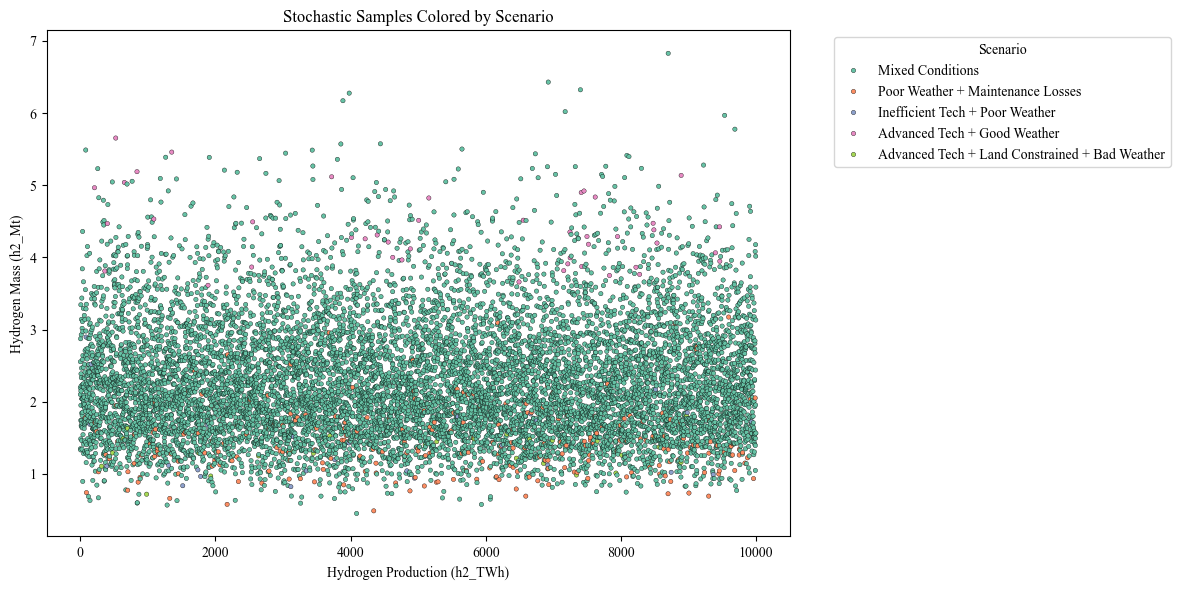

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=main_qmc_h2_results,
    x='outer_sample', 
    y='h2_Mt', 
    hue='scenario',
    palette='Set2',
    s=10,
    edgecolor='black'
)
plt.xlabel("Hydrogen Production (h2_TWh)")
plt.ylabel("Hydrogen Mass (h2_Mt)")
plt.title("Stochastic Samples Colored by Scenario")
plt.legend(title="Scenario", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





C:\Users\mun93\AppData\Local\Temp\ipykernel_30260\2322744625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = main_qmc_h2_results.pivot_table(values='h2_Mt',


Text(0.5, 1.0, 'H₂ Output by Efficiency and Availability')

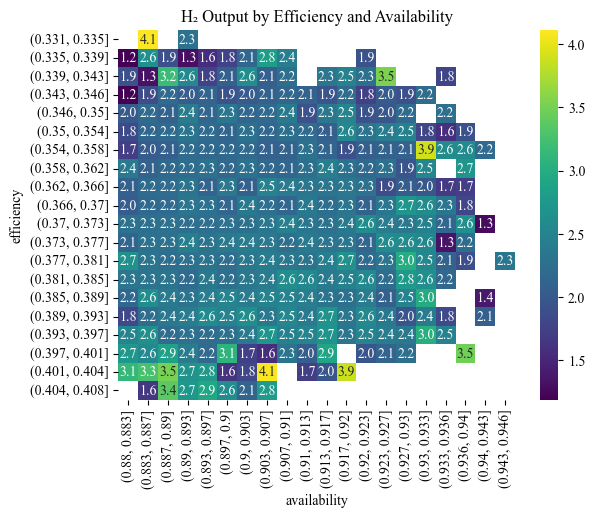

In [170]:
pivot = main_qmc_h2_results.pivot_table(values='h2_Mt', 
                       index=pd.cut(main_qmc_h2_results['efficiency'], 20), 
                       columns=pd.cut(main_qmc_h2_results['availability'], 20), 
                       aggfunc='mean')

sns.heatmap(pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title("H₂ Output by Efficiency and Availability")

